In [1]:
!pip install PyPDF2
from PyPDF2 import PdfFileReader
!pip install textract
import textract
import os
import string
import re

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('treebank')
nltk.download('words')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import ne_chunk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd

%matplotlib notebook
%matplotlib inline
from matplotlib import *
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
!pip install Basemap
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm

!pip install spacy
!pip install spacy_dbpedia_spotlight
!python -m spacy download en_core_web_lg
import spacy_dbpedia_spotlight
import spacy

!pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.display import SVG, display

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

!pip install pycountry_convert
!pip install pycountry
import pycountry_convert as pc

!pip install collections
import collections
from collections import Counter, OrderedDict
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import operator
from scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix
import random

lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english') + ['http', 'www', 'org', 'com', 'per', 'cent', 'percent', 'gpif', 'sri', 'japan', 'morocco', 'france', 'safi', 'nas']
nltk_corpus = set(nltk.corpus.words.words())
nlp = spacy.load('en_core_web_lg')
nlp.add_pipe('dbpedia_spotlight')

Processing /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7/PyPDF2-1.26.0-cp37-none-any.whl
     |████████████████████████████████| 5.6MB 7.1MB/s 
     |████████████████████████████████| 8.9MB 37.1MB/s 
     |████████████████████████████████| 32.8MB 90kB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 112kB 51.4MB/s 
     |████████████████████████████████| 102kB 9.8MB/s 
     |████████████████████████████████| 112kB 52.8MB/s 
     |████████████████████████████████| 1.9MB 30.2MB/s 
     |████████████████████████████████| 153kB 44.2MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 112kB 45.7MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.18-cp37-none-any.whl size=275504 sha256=3a289289c6f753f909596654c19ae8dfcb4eb2a9f0ee536217e9a78e079d4e22
  Stored in directory: /root/.cache/pip/wheels/1f/1f/2c/29acca422b420a0b5210bd2cd7e9669804520d602d246

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
ERROR: Could not find a version that satisfies the requirement Basemap (from versions: none)
ERROR: No matching distribution found for Basemap
     - 148.9MB 1.3MB/s
     |████████████████████████████████| 6.6MB 5.0MB/s 
     |████████████████████████████████| 225kB 38.6MB/s 
  Created wheel for basemap: filename=basem

     |████████████████████████████████| 12.8MB 208kB/s 
     |████████████████████████████████| 9.1MB 23.9MB/s 
     |████████████████████████████████| 624kB 38.6MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 460kB 34.3MB/s 
     |████████████████████████████████| 122kB 53.1MB/s 
  Created wheel for spacy-dbpedia-spotlight: filename=spacy_dbpedia_spotlight-0.2.1-cp37-none-any.whl size=9419 sha256=f12643b140ab980d80a341dfb93c6a11a1430a9d883b2c3a3c524327a36f0a36
  Stored in directory: /root/.cache/pip/wheels/1c/d9/fd/e7528b3581bc3efa9bef584903df4172a98782eee4981c5430
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107107 sha256=756e5297ae183767fc37c5385b9cd52129a28290bc5ad88227887495b5fd4a93
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built spacy-dbpedia-spotlight smart-open
  Found existing installation: catalogue 1.0.0
    Uni

In [2]:
def read_pdf(all_files):

    documents = []

    for file_name in all_files:

        name = 'drive/MyDrive/UNDP/' + file_name

        document = textract.process(name, method='pdfminer')

        document = str(document).strip().replace('\n', ' ')
        document = str(document).strip().replace('\t', ' ')
        document = str(document).strip().replace('\r', ' ')
        document = re.sub('\[.*?\]', '', document)
        document = re.sub('https?://\S+|www\.\S+', '', document)
        document = re.sub('<.*?>+', '', document)
        document = re.sub('\n', '', document)
        document = re.sub('\w*\d\w*', '', document)
        document = document.lower()
        document = re.sub('[^A-Za-z0-9.!?,]+', ' ', document)
        document = document.encode('utf8')
        document = document.decode('utf8')

        document = document.replace(u'\xa0', ' ')
        document = re.sub(' +', ' ', document)

        file_name = file_name.replace('.pdf', '')

        out_name = 'drive/MyDrive/undp_reports/' + file_name + '.txt'

        with open(out_name, 'w') as writefile:
            writefile.write(document)

        documents.append(document)

    return documents

In [3]:
def get_numerical_information(all_files, doc_tokens):
    len_page = []
    len_words = []
    
    for file_name in all_files:
      name = 'drive/MyDrive/UNDP/' + file_name
      pdf = PdfFileReader(open(name,'rb'))
      len_page.append(pdf.getNumPages())
    
    for tokens in doc_tokens:
      len_words.append(len(tokens))

    return len_page, len_words


In [4]:
def parse_title(all_files):

    country = []
    year = []
    file_format = []

    double_names = ['Lanka', 'Kingdom', 'States', 'Zealand']

    for file_name in all_files:

        file_name = file_name.replace(".", " ")

        parsed_name = file_name.split()

        if parsed_name[1] in double_names:
            country.append(parsed_name[0] + " " + parsed_name[1])
            year.append(parsed_name[2])
        else:
            country.append(parsed_name[0])
            year.append(parsed_name[1])

    file_format = ['pdf'] * len(all_files)


    return country, year, file_format

In [5]:
def clear_data(all_files):

    documents = []

    nltk_corpus = set(nltk.corpus.words.words())
    nltk_corpus.add('Coronavirus')
    nltk_corpus.add('coronavirus')
    nltk_corpus.add('corona virus')

    for text in all_files:

        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = ''.join(filter(lambda x: not x.isdigit(), text))
        text_tokens = tokenizer.tokenize(text)

        tokens_without_sw = [w for w in text_tokens if not w in stop_words]

        lemmatized_tokens = []
        for token in tokens_without_sw:
            lemmatized_tokens.append(lemmatizer.lemmatize(token))

        lang_filter = " ".join(w for w in lemmatized_tokens if w in nltk_corpus or not w.isalpha())

        new_text = ""
        for w in lang_filter.split():
            if len(w) > 2:
                new_text = new_text + " " + w

        tokens = new_text.split()

        documents.append(tokens)

    return documents

In [6]:
def get_sentences(content):

    sentences = []

    y = 0

    for text in content:

        sent_text = nltk.sent_tokenize(text)

        sentences.append(sent_text)

        file_name = all_files[y].replace('.pdf', '')

        out_name = 'drive/MyDrive/undp_sentences/' + file_name + '.txt'

        with open(out_name, 'w') as f:
          for item in sentences:
            f.write("%s\n" % item)
        
        y += 1


    return sentences

In [7]:
def plot_taxonomy(cons_file_name, chunks, n):  
    f1 = []
    f2 = []
    f3 = []
    f4 = []
    f5 = []

    for country_info in country_dict:
          f1.append(country_info.get(chunks[n][0]))
          f2.append(country_info.get(chunks[n][1]))
          f3.append(country_info.get(chunks[n][2]))
          f4.append(country_info.get(chunks[n][3]))
          f5.append(country_info.get(chunks[n][4]))


    df = pd.DataFrame({'Countries': cons_file_name, 'freq1': f1, 'freq2': f2, 'freq3': f3, 'freq4': f4, 'freq5': f5})
    df['freq1'] = df['freq1'].fillna(0)
    df['freq2'] = df['freq2'].fillna(0)
    df['freq3'] = df['freq3'].fillna(0)
    df['freq4'] = df['freq4'].fillna(0)
    df['freq5'] = df['freq5'].fillna(0)

    ax = df.plot.bar(x='Countries', y=list(df.columns[1:6]), figsize=(30, 10))
    print(chunks[n])
    ax.legend(labels= chunks[n])
    plt.show()

In [8]:
def entities_by_continents(df_documents, continent_names):
    
    entities_by_continent = []
    
    ind = 0

    for continent in continent_names:
      temp = df_documents.loc[df_documents['Continent'] == continent]

      entities_by_continent.append([])

      for lst in temp['Entities']:
        entities_by_continent[ind].extend(lst)
      
      ind += 1
    
    return entities_by_continent


In [9]:
def plot_taxonomy_by_continent(entities_by_continent, chunk_num, continents, freq_list):
    continent_names = list(continents.values())

    a_shuffled = shuffle(np.array(freq_list))

    chunk_size = int(len(freq_list) / 20)

    entity_75 = np.array_split(a_shuffled, chunk_size)

    chunks = []
    ind = 0
    for i in range(chunk_size):
        chunks.append(entity_75[i].tolist())
  
    continent_chunk_information = []
    c = 0
    for lst in entities_by_continent:
        continent_chunk_information.append([])
        for chunk in chunks[chunk_num]:
          continent_chunk_information[c].append(lst.count(chunk))
        c += 1

    df = pd.DataFrame(continent_chunk_information)
    df['Continent'] = continent_names

    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]

    df.columns = ['Continent'] + chunks[0]

    ax = df.plot.bar(x='Continent', y=list(df.columns[1:30]), figsize=(35, 10))
    print(chunks[chunk_num])
    ax.legend(labels= chunks[chunk_num], bbox_to_anchor=(1.05, 1))
    plt.show()

In [10]:
def country_word_freq(df_documents, countries, entity):
    
    entity_freq = []

    for country in countries:
      temp = df_documents.loc[df_documents['Country'] == country]

      all_ent = []
      for lst in temp['Entities']:
        all_ent.append(lst)
      
      all_ent = sum(all_ent, [])

      entity_freq.append(all_ent.count(entity))
    
    return entity_freq

In [11]:
def create_map(per_country_counts, title, resolution='c'):

    fig, ax = plt.subplots(figsize=(30,20))
    plt.title(title)

    m = Basemap(resolution=resolution, # c, l, i, h, f or None
                projection='cyl',
                lat_0=0, lon_0=0,
                llcrnrlon=-170, llcrnrlat=-60, urcrnrlon=190, urcrnrlat=84)

    m.drawmapboundary(fill_color='#aaccec')
    m.fillcontinents(color='#f2f2f2',lake_color='#aaccec')
    m.drawcoastlines()
    m.readshapefile("ne_110m_admin_0_countries", "countries")
    shapename_regex = re.compile(r'(?<=^)[\w \.\']+')

    df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.countries],
        'Country': [shapename_regex.search(area['NAME'])[0] for area in m.countries_info]
    })

    df_poly = df_poly.merge(per_country_counts, on='Country', how='left', validate="many_to_one")

    cmap = plt.get_cmap('YlOrRd')   
    pc = PatchCollection(df_poly.shapes, zorder=2)
    norm = Normalize()
 
    pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
    ax.add_collection(pc)

    mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    mapper.set_array(df_poly['count'])

    plt.colorbar(mapper, shrink=0.5)

In [12]:
all_files = os.listdir("./drive/MyDrive/UNDP")

print("Total number of reports available: %s" % len(all_files))

Total number of reports available: 35


 **1. Get text of reports**

In [13]:
document_texts = read_pdf(all_files)

country, year, file_format = parse_title(all_files)

df_documents = pd.DataFrame(
    {'Country': country,
     'Year': year,
     'File Format': file_format,
     'Content': document_texts
    })

display(df_documents)

Country  ...                                            Content
0        Australia  ...  b australian sustainable finance roadmap na pl...
1            China  ...  b investor nduties and esg nintegration in nch...
2            Italy  ...  b f i n a n c i n g t h e f u t u r e nreport ...
3        Indonesia  ...  b roadmap keuangan berkelanjutan ndi indonesia...
4           France  ...  b n n n n n n n n n n n n n n n n n n n n n n ...
5            Kenya  ...  b aligning kenya financial system nwith inclus...
6            India  ...  b delivering a sustainable nfinancial system i...
7           Brazil  ...  b fiduciary duty nin the n n n nbrazil nroadma...
8          Germany  ...  b fiduciary duty nin the n n n ngermany nroadm...
9          Ireland  ...  b fiduciary duty nin the n n n nireland nroadm...
10         Georgia  ...  b n n n nroadmap for n nsustainable finance in...
11       Argentina  ...  b c apitalizing sus tainable finance nin argen...
12        Malaysia  ...  b t r n n t r n nphoto t r t r t r t r n n t r...
13          Canada  ...  b fiduciary duty nin the n n n ncanada nroadma...
14        Colombia  ...  b june n naligning colombia nfinancial system ...
15      Luxembourg  ...  b october n nluxembourg sustainable finance ro...
16       Indonesia  ...  b t r n n t r n n t r n n t r n n t r n n t r ...
17           Japan  ...  b fiduciary duty nin the n n n njapan nroadmap...
18      Bangladesh  ...  b bangladesh bank n ndesigning a sustainable n...
19          France  ...  b france financial n eco system n nnovember n ...
20     Switzerland  ...  b proposals for a roadmap ntowards a sustainab...
21     New Zealand  ...  b n nm nu nr no nf ne nc nn na nn ni nf ne nl ...
22         Morocco  ...  b roadmap for aligning the moroccan financial ...
23       Sri Lanka  ...  b roadmap t r t r t r t r t r t r t r n n n nr...
24          Norway  ...  b roadmap for green ncompetitiveness in nthe f...
25         Nigeria  ...  b nigerian nsustainable nfinance roadmap n nde...
26  United Kingdom  ...  b the united kingdom nglobal hub, local dynami...
27          Mexico  ...  b environmental ndata dialogues in me xico n n...
28     Netherlands  ...  b n na roadmap for a sustainable dutch financi...
29  United Kingdom  ...  b fiduciary duty nin the n n n nuk roadmap n n...
30        Mongolia  ...  b national sustainable finance nroadmap of mon...
31     Switzerland  ...  b design of a nsustainable financial system n ...
32   United States  ...  b fiduciary duty nin the n n n nus roadmap n n...
33        Malaysia  ...  b roadmap book cover new op.pdf am n nopen siz...
34          France  ...  b fiduciary duty nin the n n n nfrance nroadma...

[35 rows x 4 columns]

**1.1 Distribution of reports by country**

In [14]:
df_countries = df_documents.groupby(['Country']).size().reset_index(name='Number of Reports')
df_countries = df_countries.sort_values(by=['Number of Reports'], ascending=False)
df_countries = df_countries.reset_index(drop=True)
display(df_countries)

Country  Number of Reports
0           France                  3
1   United Kingdom                  2
2      Switzerland                  2
3        Indonesia                  2
4         Malaysia                  2
5        Argentina                  1
6       Luxembourg                  1
7        Sri Lanka                  1
8           Norway                  1
9          Nigeria                  1
10     New Zealand                  1
11     Netherlands                  1
12         Morocco                  1
13        Mongolia                  1
14          Mexico                  1
15           Japan                  1
16           Kenya                  1
17       Australia                  1
18           Italy                  1
19         Ireland                  1
20           India                  1
21         Germany                  1
22         Georgia                  1
23        Colombia                  1
24           China                  1
25          Canada                  1
26          Brazil                  1
27      Bangladesh                  1
28   United States                  1

**1.2 Distribution of reports by year**

In [15]:
df_years = df_documents.groupby(['Year']).size().reset_index(name='Number of Reports')
df_years = df_years.sort_values(by=['Number of Reports'], ascending=False)
df_years = df_years.reset_index(drop=True)
display(df_years)

Year  Number of Reports
0  2018                 11
1  2016                  9
2  2015                  5
3  2017                  4
4  2019                  3
5  2020                  2
6  2014                  1

**1.3 Countries with report**

To color the countries with Basemap, download shapefiles ne_110m_admin_0_countries.* from [here](https://github.com/nvkelso/natural-earth-vector/tree/master/110m_cultural)

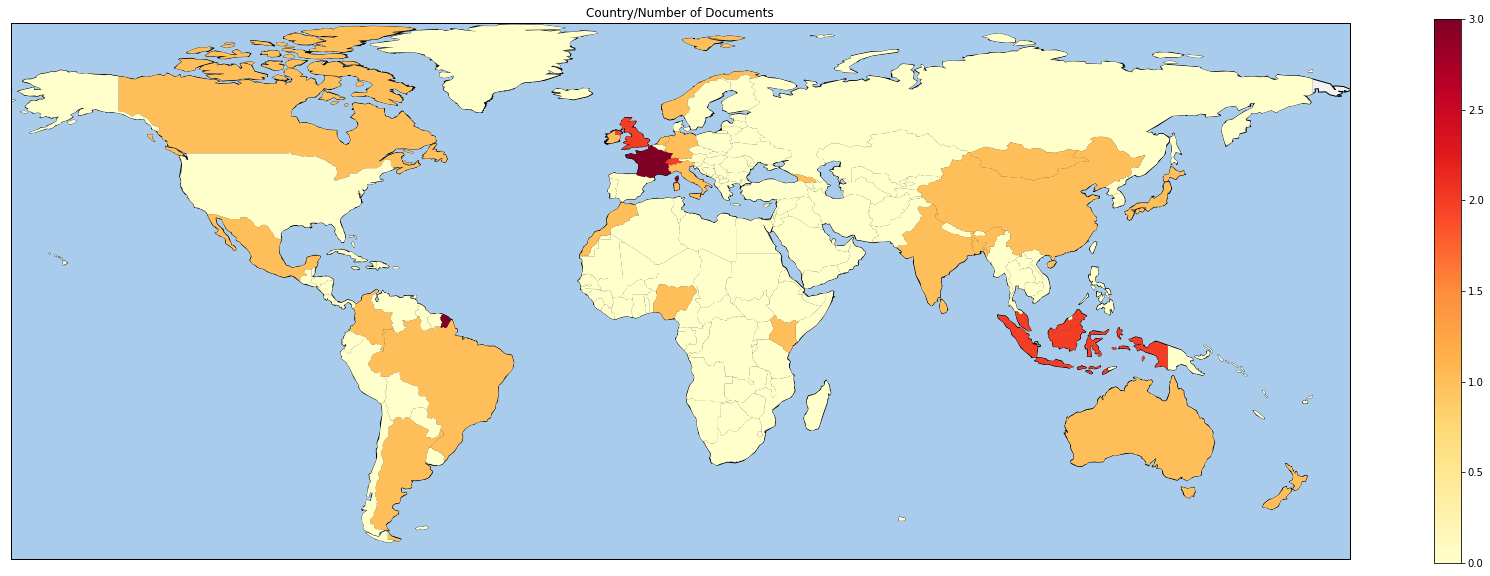

In [16]:
df_countries.columns = ['Country', 'count']
create_map(df_countries, "Country/Number of Documents")

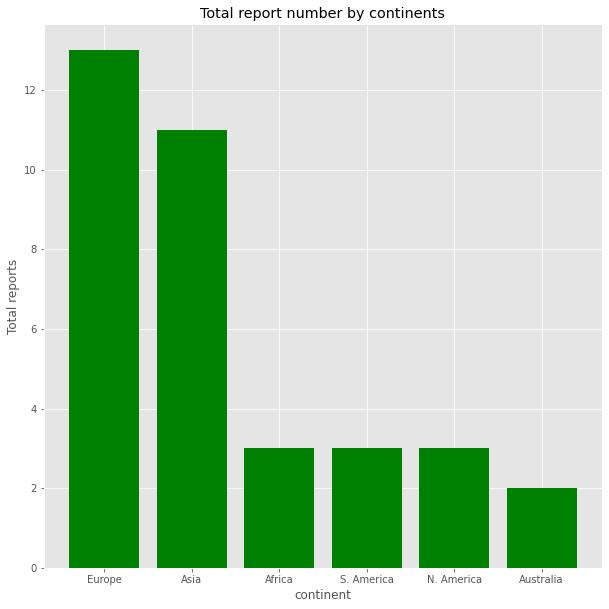

In [17]:
continents = {
    'NA': 'N. America',
    'SA': 'S. America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}

continent_name = []

for country in df_documents['Country']:
    cont = continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
    continent_name.append(cont)

df_documents['Continent'] = continent_name

counter = collections.Counter(continent_name)

counter = OrderedDict(counter.most_common())

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

x = counter.keys()
continent = counter.values()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, continent, color='green')
plt.xlabel("continent")
plt.ylabel("Total reports")
plt.title("Total report number by continents")

plt.xticks(x_pos, x)

plt.show()

In [18]:
display(df_documents)

Country  ...   Continent
0        Australia  ...   Australia
1            China  ...        Asia
2            Italy  ...      Europe
3        Indonesia  ...        Asia
4           France  ...      Europe
5            Kenya  ...      Africa
6            India  ...        Asia
7           Brazil  ...  S. America
8          Germany  ...      Europe
9          Ireland  ...      Europe
10         Georgia  ...        Asia
11       Argentina  ...  S. America
12        Malaysia  ...        Asia
13          Canada  ...  N. America
14        Colombia  ...  S. America
15      Luxembourg  ...      Europe
16       Indonesia  ...        Asia
17           Japan  ...        Asia
18      Bangladesh  ...        Asia
19          France  ...      Europe
20     Switzerland  ...      Europe
21     New Zealand  ...   Australia
22         Morocco  ...      Africa
23       Sri Lanka  ...        Asia
24          Norway  ...      Europe
25         Nigeria  ...      Africa
26  United Kingdom  ...      Europe
27          Mexico  ...  N. America
28     Netherlands  ...      Europe
29  United Kingdom  ...      Europe
30        Mongolia  ...        Asia
31     Switzerland  ...      Europe
32   United States  ...  N. America
33        Malaysia  ...        Asia
34          France  ...      Europe

[35 rows x 5 columns]

In [19]:
documents = clear_data(document_texts)

print("Preprocessing the data")

Preprocessing the data


In [20]:
page_len, text_len = get_numerical_information(all_files, documents)

**1.4 Report lengths by page**

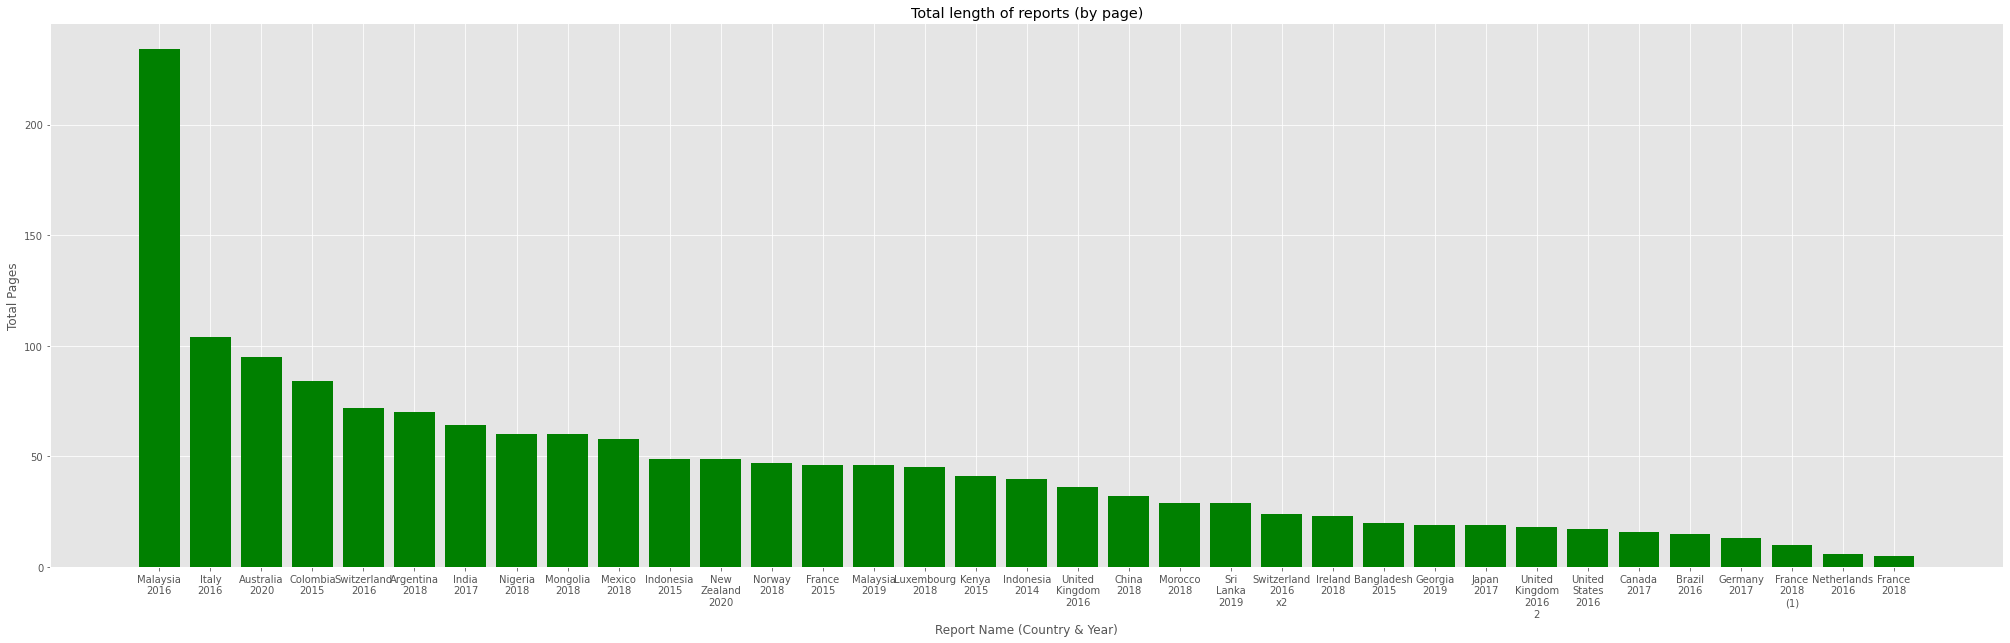

In [21]:
file_name = []
for i in all_files:
  st = i.replace(".pdf", "")
  file_name.append(st.replace(" ", "\n"))

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(35, 10)

file_page_dict = dict(zip(file_name, page_len))
file_page_dict = sorted(file_page_dict.items(), key=operator.itemgetter(1), reverse=True)

file_page_dict = dict((x, y) for x, y in file_page_dict)



x = file_page_dict.keys()
energy = file_page_dict.values()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Report Name (Country & Year)")
plt.ylabel("Total Pages")
plt.title("Total length of reports (by page)")

plt.xticks(x_pos, x)

plt.show()


**1.5 Total count of words in reports after cleaning**

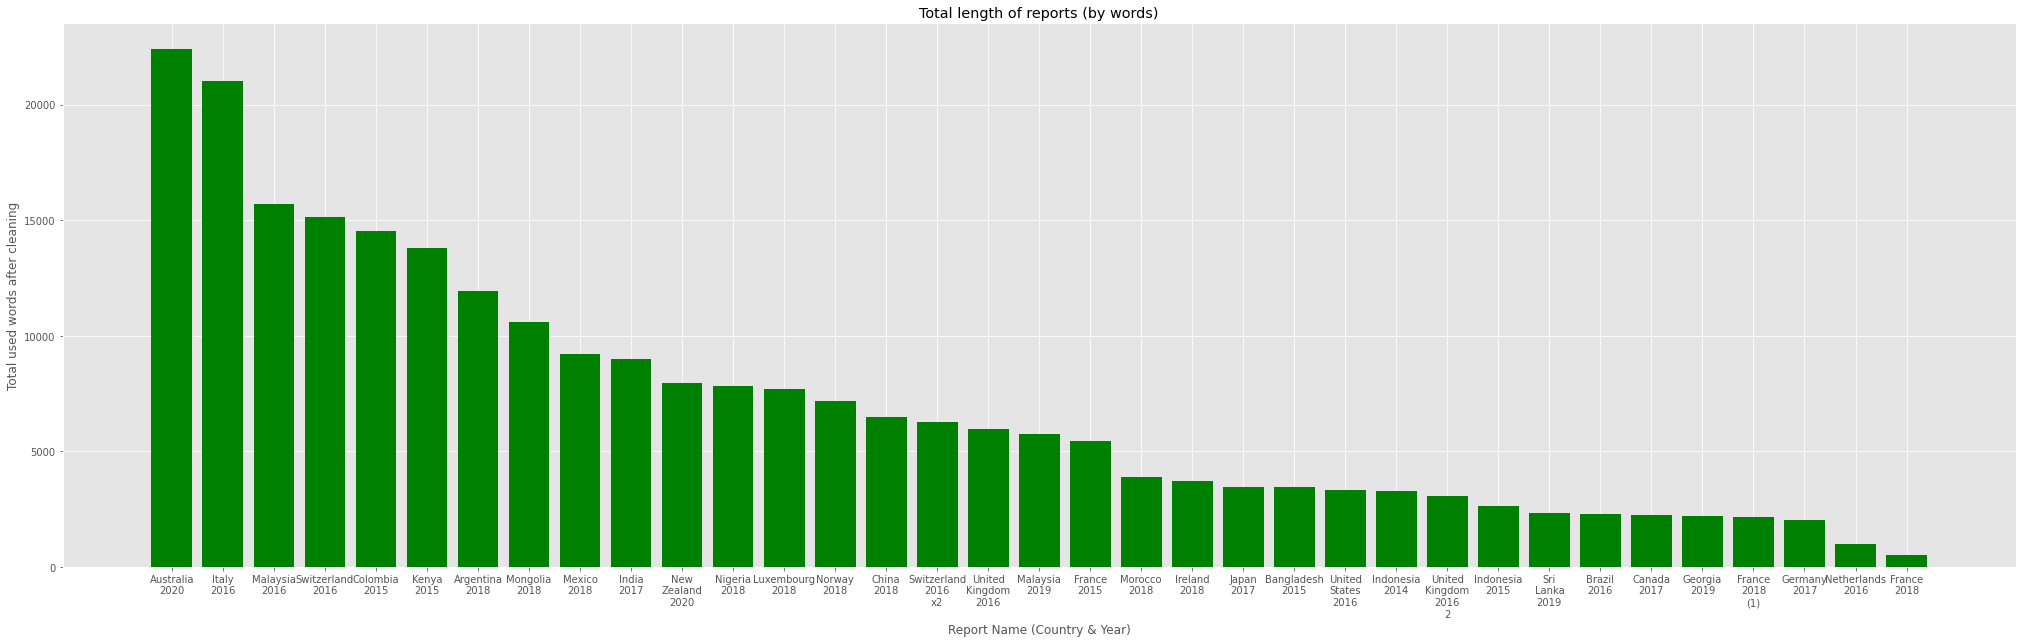

In [22]:
cons_file_name = []
for i in all_files:
  st = i.replace(".pdf", "")
  cons_file_name.append(st.replace(" ", "\n"))

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(35, 10)

file_page_dict = dict(zip(file_name, text_len))
file_page_dict = sorted(file_page_dict.items(), key=operator.itemgetter(1), reverse=True)

file_page_dict = dict((x, y) for x, y in file_page_dict)



x = file_page_dict.keys()
energy = file_page_dict.values()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Report Name (Country & Year)")
plt.ylabel("Total used words after cleaning")
plt.title("Total length of reports (by words)")

plt.xticks(x_pos, x)

plt.show()


In [23]:
cleared_docs_str = []

for doc in documents:
  cleared_docs_str.append(' '.join([str(elem) for elem in doc]))

print(len(cleared_docs_str))

35


In [24]:
print("Compute tf-idf of each document")

tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3),
                     min_df = 0.1, stop_words = 'english', sublinear_tf=True)

tfidf_matrix =  tf.fit_transform(cleared_docs_str)

feature_names = tf.get_feature_names()

tfidf_each_doc = []

for doc in range(len(cleared_docs_str)):
    print("Processing on ", doc + 1, " out of ", len(all_files))
    tfidf_each_doc.append([])

    feature_index = tfidf_matrix[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])

    
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        tfidf_each_doc[doc].append(w)  


Compute tf-idf of each document
Processing on  1  out of  35
Processing on  2  out of  35
Processing on  3  out of  35
Processing on  4  out of  35
Processing on  5  out of  35
Processing on  6  out of  35
Processing on  7  out of  35
Processing on  8  out of  35
Processing on  9  out of  35
Processing on  10  out of  35
Processing on  11  out of  35
Processing on  12  out of  35
Processing on  13  out of  35
Processing on  14  out of  35
Processing on  15  out of  35
Processing on  16  out of  35
Processing on  17  out of  35
Processing on  18  out of  35
Processing on  19  out of  35
Processing on  20  out of  35
Processing on  21  out of  35
Processing on  22  out of  35
Processing on  23  out of  35
Processing on  24  out of  35
Processing on  25  out of  35
Processing on  26  out of  35
Processing on  27  out of  35
Processing on  28  out of  35
Processing on  29  out of  35
Processing on  30  out of  35
Processing on  31  out of  35
Processing on  32  out of  35
Processing on  33

**2. Find entities in reports**

Average calculation time per report is 2 minutes 30 seconds

In [25]:
# dbpedia_outputs = []
# num_doc = 0
# for tfidf_in_doc in tfidf_each_doc:
#     dbpedia_outputs.append([])
#     print("Doc number is: ", num_doc)
#     y = 0
#     for term in tfidf_in_doc:

#       doc = nlp(term)
#       print(y)
#       y += 1

#       for i in range(len(doc.ents)):
#           dbpedia = doc.ents[i]._.dbpedia_raw_result

          

          

#           if dbpedia is not None:
#               a = str(dbpedia.get('@URI'))
#               a = a.replace('/', ' ')
#               q, w, e, r = a.split()
#               r = r.replace('_', ' ')

              

#               dbpedia_outputs[num_doc].append(r)
#               print(r)
              
    
#     print("NEXT DOC***********************************************************")

#     report_name = all_files[num_doc].replace('.pdf', '')

#     output_file = '/content/drive/MyDrive/undp_dbpedia/' + report_name + '.txt'

#     with open(output_file, 'w') as f:
#           for item in dbpedia_outputs[num_doc]:
#             f.write("%s\n" % item)


#     num_doc += 1
          

Reading from file. This section will be removed.

In [26]:
dbpedia_outputs = []
ind = 0

for f_name in all_files:
    
    # dbpedia_outputs.append([])
    f_name = "./drive/MyDrive/undp_dbpedia/" + all_files[ind].replace('.pdf', '') + ".txt"
    with open(f_name) as f:
        lines = [line.rstrip() for line in f]
        dbpedia_outputs.append(lines)

        ind += 1

print(dbpedia_outputs)


[['Renewable energy', 'Global warming', 'Global warming', 'Global warming', 'United Nations', 'Global warming', 'Global warming', 'Global warming', 'Industry', 'Sustainable development', 'United Nations', 'United Nations', 'Management', 'United Nations', 'Sustainable development', 'Climate bond', 'Systemic risk', 'Financial institution', 'Financial institution', 'Risk management', 'Capital market', 'Private equity', 'Venture capital', 'Climate bond', 'Climate bond', 'Climate bond', 'Financial institution', 'Global warming', 'Global warming', 'Carbon', 'Financial institution', 'Financial institution', 'Financial institution', 'Financial institution', 'Valuation (finance)', 'Global warming', 'Global warming', 'Risk management', 'Global warming', 'Global warming', 'Global warming', 'Management', 'Global warming', 'Global warming', 'Sustainable development', 'Institutional investor', 'Financial institution', 'Sustainable development', 'Sustainable development', 'Risk management', 'Financia

**3. Wordcloud of occured entities in all files**

385


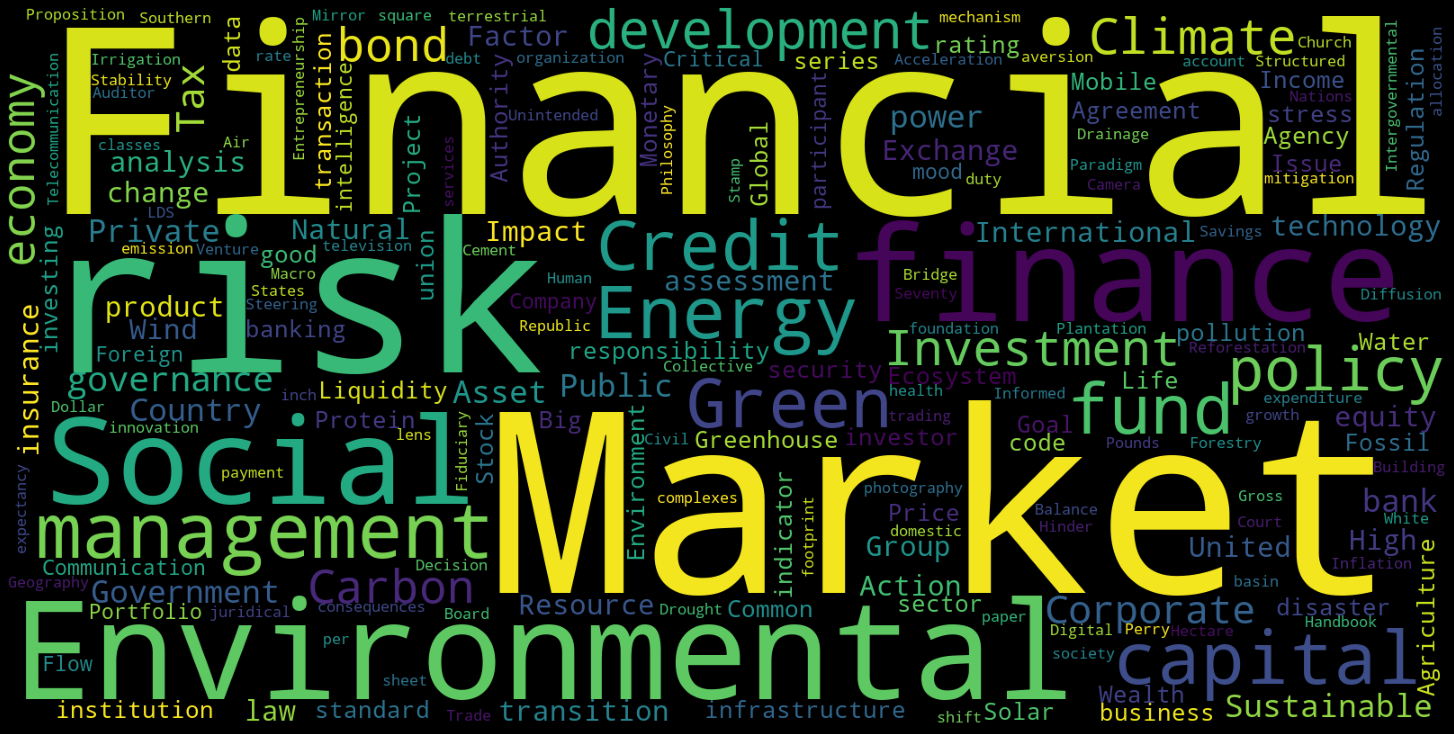

In [27]:
results_union = set().union(*dbpedia_outputs)

print(len(results_union))

wordcloud = WordCloud(width=1600, height=800).generate((" ").join(results_union))
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [28]:
import collections, itertools
import operator

freq = collections.defaultdict(int)  # 0 by default
for x in itertools.chain.from_iterable(dbpedia_outputs):
    freq[x] += 1

frequency_entities = dict(freq)

frequency_entities = sorted(frequency_entities.items(), key=operator.itemgetter(1), reverse=True)

frequency_entities = dict((x, y) for x, y in frequency_entities)


**3.1 Most frequent entities**

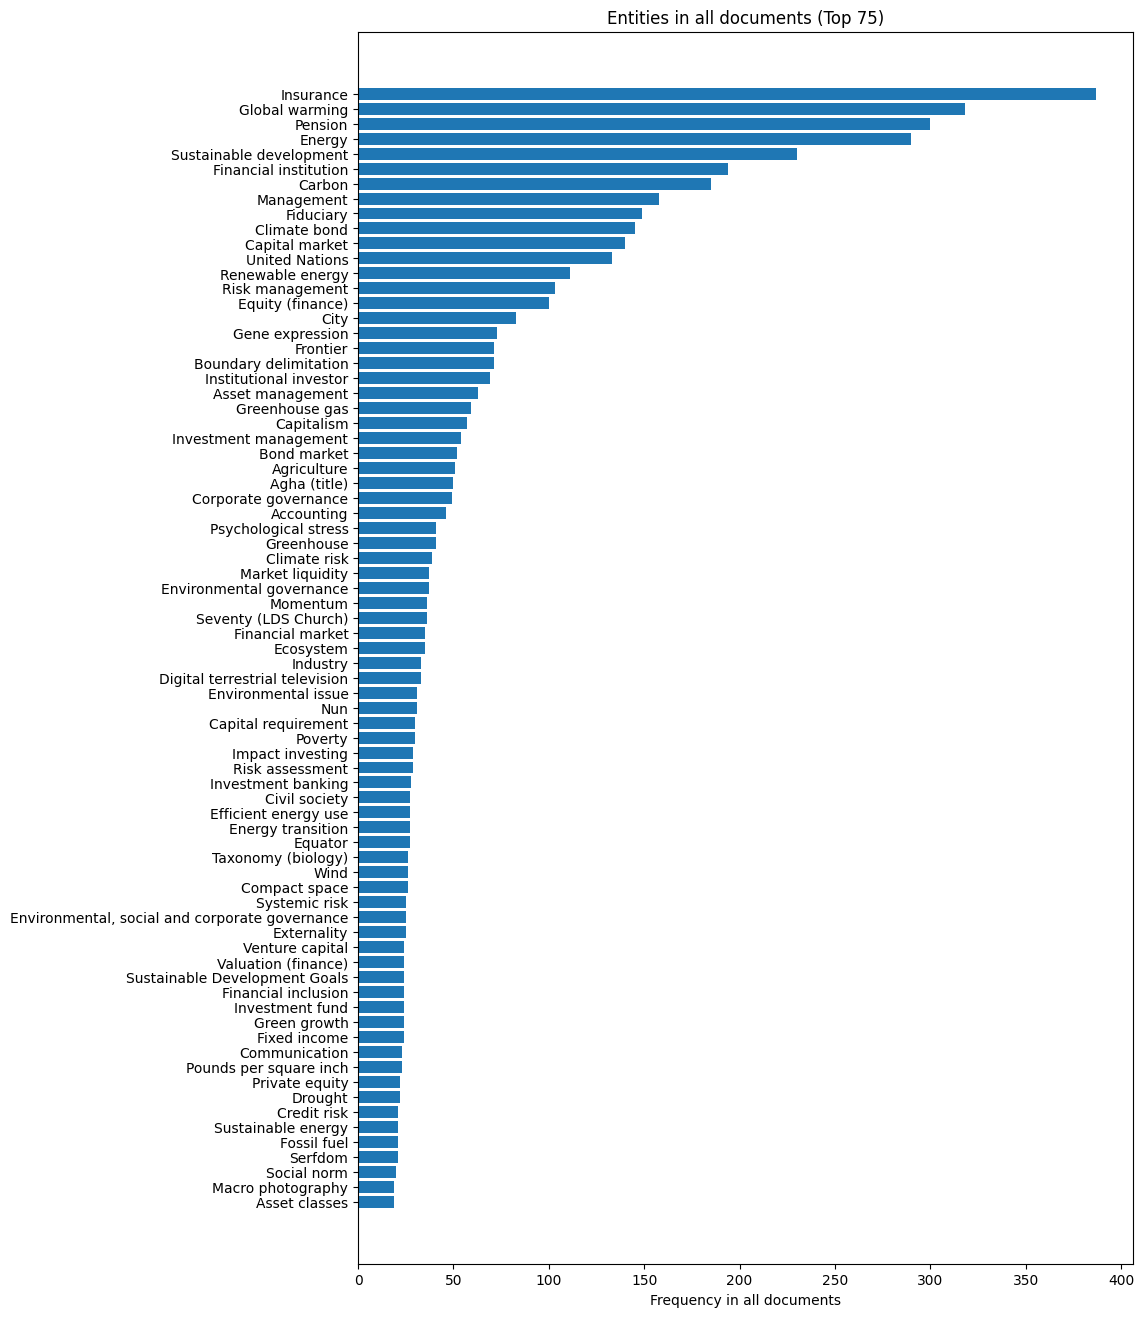

In [29]:
from itertools import islice

frequency_entities_75 = list(islice(frequency_entities.items(), 75))

frequency_entities_75 = dict(frequency_entities_75)

plt.rcdefaults()

fig, ax = plt.subplots()
fig.set_size_inches(10, 16)
entity = tuple(frequency_entities_75)

frequency = np.array(list(frequency_entities_75.values()))

y_pos = np.arange(len(entity))

ax.barh(entity, frequency, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(entity)
ax.invert_yaxis()  
ax.set_xlabel('Frequency in all documents')
ax.set_title('Entities in all documents (Top 75)')

plt.show()

In [30]:
df_documents['Entities'] = dbpedia_outputs

display(df_documents[['Country', 'Year', 'Entities']])

Country  Year                                           Entities
0        Australia  2020  [Renewable energy, Global warming, Global warm...
1            China  2018  [Frontier, Boundary delimitation, Frontier, Bo...
2            Italy  2016  [Management, Global warming, Insurance, United...
3        Indonesia  2014  [International Finance Corporation, Social ris...
4           France  2018  [Asset management, Risk management, Asset mana...
5            Kenya  2015  [Climate change adaptation, Carbon, Systemic r...
6            India  2017  [Sustainable development, Climate bond, Global...
7           Brazil  2016  [Capitalism, Capitalism, Capitalism, Managemen...
8          Germany  2017  [Company Business, Insurance, Pounds per squar...
9          Ireland  2018  [Asset management, Investment management, Pens...
10         Georgia  2019  [Capital market, Financial sector development,...
11       Argentina  2018  [Financial institution, Sustainable developmen...
12        Malaysia  2016  [Equity (finance), Credit risk, Fiduciary, Jun...
13          Canada  2017  [Corporate governance, Pension, Fiduciary, Pro...
14        Colombia  2015  [Financial institution, Sustainable developmen...
15      Luxembourg  2018  [Balance sheet, Market liquidity, Dollar, Diff...
16       Indonesia  2015  [Pension, Pension, Equity (finance), Climate b...
17           Japan  2017  [Market research, Corporate governance, Pensio...
18      Bangladesh  2015  [Fin, Balance sheet, Sustainable development, ...
19          France  2015  [Serfdom, Fin, Financial institution, Sustaina...
20     Switzerland  2016  [Global warming, Serfdom, Fin, Market liquidit...
21     New Zealand  2020  [Global warming, Management, Insurance, Digita...
22         Morocco  2018  [Dollar, Sustainable development, Junior, Seni...
23       Sri Lanka  2019  [Financial market, Acronym, Junior, Senior & B...
24          Norway  2018  [Climate bond, Global warming, Pension, Pensio...
25         Nigeria  2018  [Bond market, Global warming, Pension, Pension...
26  United Kingdom  2016  [Bond market, Financial market, Global warming...
27          Mexico  2018  [Bond market, Financial institution, Financial...
28     Netherlands  2016  [Fin, Diffusion, ING Group, Green Climate Fund...
29  United Kingdom  2016  [United Nations, Management, Market research, ...
30        Mongolia  2018  [United Nations, Bond market, Climate bond, Pe...
31     Switzerland  2016  [United Nations, Climate bond, Financial marke...
32   United States  2016  [United Nations, Proxy voting, Fiduciary, Perf...
33        Malaysia  2019  [Climate bond, Financial market, Management, T...
34          France  2018  [Proxy voting, Fiduciary, Energy transition, S...

In [31]:
report_years = df_documents['Year'].to_list()

report_years = sorted(list(set(report_years)))

year_based_entity = []

for year in report_years:
    temp = df_documents.loc[df_documents['Year'] == year]
    year_entities = temp['Entities'].to_list()
    year_based_entity.append(sum(year_entities, []))

most_frequent_entity = []
frequency_of_entity = []
ind = 0
for entity in year_based_entity:
    most_frequent_entity.append([])
    frequency_of_entity.append([])
    for word, word_count in Counter(entity).most_common(5):
        most_frequent_entity[ind].append(word)
        frequency_of_entity[ind].append(word_count)

    ind += 1

all_years_entity = sum(most_frequent_entity, [])

all_years_entity = list(set(all_years_entity))

# print(len(all_years_entity))

sumup = []
for word in all_years_entity:
    sum_freq = 0
    ind = 0
    for entities in most_frequent_entity:    
        for w in entities:
            ind2 = 0
            if w == word:
              sum_freq += frequency_of_entity[ind][ind2]
            ind2 += 1
        ind += 1
    sumup.append(sum_freq)

# print(sumup)
    

    

**3.2 Top 5 entities by year**

In [32]:
df = pd.DataFrame({'Year': report_years, 'Top 5 entities': most_frequent_entity})

display(df)

Year                                     Top 5 entities
0  2014  [Energy, Capital market, Financial institution...
1  2015  [Insurance, Energy, Carbon, Sustainable develo...
2  2016  [Pension, Insurance, Global warming, Energy, F...
3  2017  [Pension, Fiduciary, Energy, Insurance, Sustai...
4  2018  [Insurance, Global warming, Energy, Pension, S...
5  2019  [Global warming, Financial institution, Climat...
6  2020  [Global warming, Insurance, Financial institut...

**3.3 Entities of each report (at least 2 times occured entities)**

In [33]:
for x in range(len(dbpedia_outputs)):

    print(cons_file_name[x], "contains: ")

    c = Counter(dbpedia_outputs[x])
    frequency_entities = dict(OrderedDict(c.most_common()))

    names = frequency_entities.keys()
    frequencies = frequency_entities.values()

    df = pd.DataFrame({'Entity': names, 'Frequency': frequencies})

    display(df[df['Frequency'] > 2])


Australia
2020 contains: 


Entity  Frequency
0                   Global warming         28
1                        Insurance         24
2            Financial institution         21
3                           Energy         15
4          Sustainable development          9
5                  Risk management          9
6                           Carbon          8
7                       Management          7
8                     Climate bond          7
9                   United Nations          6
10                  Capital market          5
11                         Pension          5
12                        Industry          4
13          Institutional investor          4
14                    Climate risk          4
15                Equity (finance)          4
16            Psychological stress          4
17                Renewable energy          3
18  Intergovernmental organization          3
19                Impact investing          3
20                      Accounting          3
21                     Agriculture          3
22                             Nun          3
23             Capital requirement          3
24              Taxonomy (biology)          3

China
2018 contains: 


Entity  Frequency
0                    Pension         23
1                     Energy         14
2                  Fiduciary         13
3                 Management          9
4                  Insurance          9
5                       City          7
6                   Frontier          6
7      Boundary delimitation          6
8            Gene expression          6
9           Equity (finance)          6
10            Capital market          5
11    Institutional investor          5
12          Asset management          4
13            Global warming          4
14                    Carbon          4
15   Sustainable development          4
16                       Nun          4
17      Seventy (LDS Church)          3
18            United Nations          3
19  Environmental governance          3
20         Energy transition          3
21            Greenhouse gas          3
22           Risk management          3
23        Investment banking          3
24                Accounting          3

Italy
2016 contains: 


Entity  Frequency
0                 Insurance         36
1                    Energy         35
2            Global warming         27
3   Sustainable development         25
4     Financial institution         14
5                   Pension         13
6          Renewable energy         12
7              Climate bond         12
8                    Carbon         12
9                Management         11
10           United Nations          7
11   Institutional investor          7
12                     City          7
13          Risk management          6
14           Capital market          6
15    Boundary delimitation          6
16                 Frontier          6
17          Gene expression          6
18             Agha (title)          5
19           Greenhouse gas          4
20        Energy transition          4
21              Bond market          4
22       Low-carbon economy          4
23               Greenhouse          4
24         Asset management          4
25                 Momentum          4
26         Equity (finance)          4
27     Psychological stress          4
28                Fiduciary          4
29     Efficient energy use          3
30     Corporate governance          3
31            Civil society          3
32     Seventy (LDS Church)          3
33                     Wind          3
34              Agriculture          3

Indonesia
2014 contains: 


Entity  Frequency
0                    Energy         10
1            Capital market          5
2     Financial institution          5
3   Sustainable development          4
4            Global warming          4
5                 Insurance          4
6                    Carbon          4
7            Greenhouse gas          3
8                Greenhouse          3
9          Renewable energy          3
10             Climate bond          3
11              Agriculture          3

France
2018
(1) contains: 


Entity  Frequency
0                Carbon          7
1        Global warming          5
2                Energy          5
3      Asset management          3
4       Risk management          3
5  Psychological stress          3

Kenya
2015 contains: 


Entity  Frequency
0                 Insurance         28
1                    Energy         22
2                   Pension         18
3                    Carbon          9
4            Global warming          9
5            Capital market          9
6          Renewable energy          8
7          Equity (finance)          8
8   Sustainable development          7
9                Management          6
10           United Nations          6
11              Agriculture          6
12                 Frontier          6
13    Boundary delimitation          6
14                     City          6
15          Gene expression          6
16             Climate bond          5
17         Asset management          5
18          Venture capital          4
19    Financial institution          4
20     Corporate governance          3
21      Capital requirement          3
22                  Poverty          3
23   Institutional investor          3
24                     Wind          3
25     Seventy (LDS Church)          3

India
2017 contains: 


Entity  Frequency
0                    Energy         25
1            Global warming         16
2   Sustainable development         15
3          Renewable energy         13
4                 Insurance         10
5              Climate bond          9
6            Capital market          9
7            United Nations          7
8          Equity (finance)          6
9     Boundary delimitation          6
10                 Frontier          6
11                     City          6
12          Gene expression          6
13          Risk management          5
14              Agriculture          5
15                  Pension          5
16    Financial institution          4
17          Venture capital          3
18      Capital requirement          3
19              Bond market          3
20               Management          3
21     Seventy (LDS Church)          3
22       Investment banking          3

Brazil
2016 contains: 


Entity  Frequency
0                        Pension         17
1                      Fiduciary         15
2                     Capitalism         10
3                     Management          6
4                 Capital market          6
5                      Insurance          5
6          Investment management          4
7          Financial institution          4
8            Valuation (finance)          4
9       Environmental governance          4
10  Peter Knight (folk musician)          3
11                Global warming          3
12          Corporate governance          3
13                United Nations          3
14                        Carbon          3

Germany
2017 contains: 


Entity  Frequency
0                  Pension         14
1                Fiduciary         12
2                Insurance         10
3  Sustainable development          4
4   Pounds per square inch          3
5         Equity (finance)          3
6   Institutional investor          3

Ireland
2018 contains: 


Entity  Frequency
0                   Pension         20
1                 Fiduciary         14
2                 Insurance          8
3                Management          6
4          Asset management          5
5     Investment management          5
6                    Carbon          4
7     Financial institution          3
8            United Nations          3
9  Environmental governance          3

Georgia
2019 contains: 


Entity  Frequency
0     Financial institution         10
1   Sustainable development          9
2            Global warming          8
3                    Carbon          7
4            Capital market          5
5           Risk management          5
6              Climate bond          4
7                 Insurance          4
8      Corporate governance          3
9            Greenhouse gas          3
10              Bond market          3
11                 Momentum          3
12               Accounting          3
13                      Nun          3
14       Taxonomy (biology)          3

Argentina
2018 contains: 


Entity  Frequency
0                        Insurance         35
1                   Global warming         23
2          Sustainable development         17
3            Financial institution         13
4                           Energy         13
5                   Capital market         12
6                          Pension         11
7                 Renewable energy         10
8                     Climate bond          8
9                   United Nations          8
10                      Management          8
11                 Risk management          7
12  Digital terrestrial television          6
13                    Agha (title)          6
14           Boundary delimitation          6
15                        Frontier          6
16                            City          6
17                 Gene expression          6
18                          Carbon          6
19                Equity (finance)          5
20          Pounds per square inch          4
21                        Industry          4
22                         Drought          3
23                       Ecosystem          3
24                         Poverty          3
25                Asset management          3
26                        Momentum          3
27                     Agriculture          3
28               Energy transition          3
29          Institutional investor          3
30            Corporate governance          3
31                  Greenhouse gas          3
32                      Greenhouse          3
33            Seventy (LDS Church)          3

Malaysia
2016 contains: 


Entity  Frequency
0                    Energy         10
1          Renewable energy          5
2          Equity (finance)          4
3   Sustainable development          4
4     Financial institution          4
5                 Ecosystem          3
6           Risk management          3
7            Greenhouse gas          3
8      Efficient energy use          3
9              Climate bond          3
10         Impact investing          3
11           Global warming          3

Canada
2017 contains: 


Entity  Frequency
0                        Pension         19
1                      Fiduciary         14
2                     Capitalism         10
3          Investment management          6
4                 Capital market          5
5                         Carbon          5
6                     Management          4
7       Environmental governance          4
8          Financial institution          3
9   Peter Knight (folk musician)          3
10                Global warming          3
11                United Nations          3
12           Valuation (finance)          3

Colombia
2015 contains: 


Entity  Frequency
0                 Insurance         17
1                    Energy         16
2   Sustainable development         15
3                    Carbon         15
4            Global warming         14
5                   Pension         14
6     Financial institution          9
7            United Nations          9
8                Management          8
9          Equity (finance)          8
10         Renewable energy          8
11     Corporate governance          6
12    Boundary delimitation          6
13                 Frontier          6
14                     City          6
15          Gene expression          6
16          Venture capital          4
17           Greenhouse gas          4
18          Risk management          4
19   Institutional investor          4
20                Ecosystem          3
21                Fiduciary          3
22             Fixed income          3
23                  Drought          3
24   Pounds per square inch          3
25             Climate bond          3
26     Efficient energy use          3
27     Seventy (LDS Church)          3

Luxembourg
2018 contains: 


Entity  Frequency
0                 Insurance         20
1   Sustainable development         12
2                    Carbon         10
3            Global warming          7
4                   Pension          6
5                Management          6
6          Equity (finance)          4
7          Market liquidity          3
8                 Ecosystem          3
9          Asset management          3
10   Pounds per square inch          3
11                Fiduciary          3
12                   Energy          3
13    Financial institution          3
14             Climate bond          3
15           Greenhouse gas          3
16               Greenhouse          3
17           Capital market          3
18           United Nations          3
19   Institutional investor          3
20                      Nun          3
21          Risk management          3

Indonesia
2015 contains: 


Entity  Frequency
0                Insurance          9
1                  Pension          5
2           Global warming          5
3         Renewable energy          5
4                   Energy          5
5  Sustainable development          5
6             Climate bond          3
7              Agriculture          3
8              Bond market          3
9          Risk management          3

Japan
2017 contains: 


Entity  Frequency
0                        Pension         19
1                      Fiduciary         13
2                     Capitalism         10
3                     Management          7
4          Investment management          5
5           Corporate governance          4
6            Valuation (finance)          4
7       Environmental governance          4
8                      Insurance          4
9               Equity (finance)          3
10         Financial institution          3
11  Peter Knight (folk musician)          3
12                United Nations          3
13                    Accounting          3

Bangladesh
2015 contains: 


Entity  Frequency
0                 Insurance         13
1                    Energy         13
2   Sustainable development         10
3              Agha (title)          6
4     Boundary delimitation          6
5                  Frontier          6
6                      City          6
7           Gene expression          6
8          Equity (finance)          5
9          Renewable energy          5
10           United Nations          5
11                   Carbon          5
12          Risk management          4
13           Capital market          3
14                  Pension          3
15    Financial institution          3
16              Bond market          3
17             Climate bond          3
18     Seventy (LDS Church)          3

France
2015 contains: 


Entity  Frequency
0                    Carbon         11
1                Management         10
2                    Energy         10
3            Global warming          9
4     Financial institution          8
5                 Insurance          7
6              Agha (title)          6
7              Climate bond          6
8     Boundary delimitation          6
9                  Frontier          6
10                     City          6
11          Gene expression          6
12  Sustainable development          5
13   Institutional investor          5
14           United Nations          5
15          Risk management          4
16        Energy transition          4
17     Seventy (LDS Church)          3
18                Fiduciary          3
19     Psychological stress          3

Switzerland
2016 contains: 


Entity  Frequency
0                   Pension         17
1                 Insurance         17
2            Global warming         16
3                    Energy         10
4                Management          9
5            Capital market          7
6    Institutional investor          7
7              Climate bond          7
8                    Carbon          6
9           Risk management          6
10  Sustainable development          5
11           Greenhouse gas          5
12         Equity (finance)          4
13               Greenhouse          4
14       Low-carbon economy          4
15         Market liquidity          3
16         Asset management          3
17    Investment management          3
18       Investment banking          3
19    Financial institution          3
20         Impact investing          3
21               Accounting          3

New
Zealand
2020 contains: 


Entity  Frequency
0        Global warming          6
1                Carbon          6
2             Insurance          5
3      Equity (finance)          5
4            Management          4
5   Capital requirement          4
6  Psychological stress          4
7        United Nations          3

Morocco
2018 contains: 


Entity  Frequency
0   Sustainable development         19
1            Global warming         14
2                    Energy          7
3                 Insurance          7
4                    Carbon          6
5            United Nations          5
6              Climate bond          4
7            Capital market          4
8                  Industry          4
9     Financial institution          3
10           Greenhouse gas          3
11         Asset management          3

Sri
Lanka
2019 contains: 


Entity  Frequency
0                        Insurance         13
1            Financial institution          9
2                   Global warming          8
3                   Capital market          4
4           Pounds per square inch          4
5                     Climate bond          4
6                  Risk management          4
7              Financial inclusion          3
8                              Nun          3
9   Intergovernmental organization          3
10              Taxonomy (biology)          3

Norway
2018 contains: 


Entity  Frequency
0                 Insurance         18
1                   Pension         15
2            Global warming         11
3                    Energy         11
4                Management          9
5                    Carbon          8
6              Climate bond          7
7     Financial institution          6
8          Asset management          4
9   Sustainable development          4
10           Greenhouse gas          4
11         Renewable energy          4
12               Greenhouse          3
13        Energy transition          3
14                Fiduciary          3
15             Climate risk          3

Nigeria
2018 contains: 


Entity  Frequency
0                           Energy         15
1                   Global warming         14
2                        Insurance         12
3          Sustainable development          9
4                   Capital market          7
5                   United Nations          7
6                          Pension          6
7   Digital terrestrial television          6
8                     Agha (title)          6
9                           Carbon          6
10                        Frontier          6
11           Boundary delimitation          6
12                 Gene expression          6
13                            City          5
14                    Climate bond          5
15                     Bond market          4
16                     Agriculture          4
17                Equity (finance)          4
18                Renewable energy          3
19                            Wind          3
20           Investment management          3
21                      Management          3
22                        Momentum          3
23            Seventy (LDS Church)          3
24  Intergovernmental organization          3

United
Kingdom
2016 contains: 


Entity  Frequency
0            Global warming         17
1                 Insurance         16
2                   Pension          9
3                    Carbon          9
4                    Energy          8
5              Climate bond          7
6              Agha (title)          6
7   Sustainable development          6
8                Management          6
9            Capital market          6
10    Boundary delimitation          6
11                 Frontier          6
12                     City          6
13          Gene expression          6
14    Financial institution          5
15         Renewable energy          5
16         Equity (finance)          5
17           United Nations          5
18                Fiduciary          4
19       Low-carbon economy          4
20              Bond market          3
21         Asset management          3
22     Corporate governance          3
23     Seventy (LDS Church)          3
24           Greenhouse gas          3

Mexico
2018 contains: 


Entity  Frequency
0            Financial institution         16
1                   Global warming         16
2                        Insurance         14
3                  Risk management          8
4                       Management          7
5                           Carbon          7
6                             City          7
7                     Agha (title)          6
8            Boundary delimitation          6
9                         Frontier          6
10                 Gene expression          6
11  Digital terrestrial television          5
12         Sustainable development          5
13                  United Nations          5
14                  Capital market          4
15                    Climate bond          4
16                     Bond market          3
17            Seventy (LDS Church)          3
18                        Momentum          3
19  Intergovernmental organization          3
20                      Accounting          3

Netherlands
2016 contains: 


Entity  Frequency
0             Pension          6
1           Insurance          5
2  Low-carbon economy          4
3              Energy          4

United
Kingdom
2016
2 contains: 


Entity  Frequency
0                      Fiduciary         16
1                        Pension         14
2                     Capitalism         10
3                     Management          8
4                 United Nations          5
5          Investment management          5
6                 Capital market          4
7       Environmental governance          4
8                 Global warming          4
9          Performance indicator          3
10         Financial institution          3
11           Valuation (finance)          3
12  Peter Knight (folk musician)          3
13                    Accounting          3

Mongolia
2018 contains: 


Entity  Frequency
0                           Energy         24
1                        Insurance         18
2                 Renewable energy         14
3            Financial institution         13
4                     Climate bond         12
5          Sustainable development         12
6                           Carbon         10
7                  Risk management          7
8                             City          7
9                   United Nations          6
10                  Global warming          6
11                    Agha (title)          6
12                  Capital market          6
13                 Gene expression          6
14                     Bond market          5
15                         Pension          5
16  Digital terrestrial television          5
17                     Agriculture          5
18           Boundary delimitation          5
19                Market liquidity          3
20                        Momentum          3
21                   Civil society          3
22          Institutional investor          3
23                            Wind          3
24                        Frontier          3
25            Seventy (LDS Church)          3
26              Investment banking          3
27                    Climate risk          3

Switzerland
2016
x2 contains: 


Entity  Frequency
0                   Pension         15
1                 Insurance         10
2            Global warming         10
3     Financial institution          9
4              Climate bond          5
5          Asset management          4
6                Management          4
7   Sustainable development          4
8                    Carbon          4
9            United Nations          3
10         Market liquidity          3
11               Accounting          3

United
States
2016 contains: 


Entity  Frequency
0                      Fiduciary         14
1                        Pension         12
2                     Capitalism         10
3                     Management          7
4                 United Nations          5
5                 Global warming          5
6          Investment management          4
7            Valuation (finance)          4
8                 Capital market          4
9       Environmental governance          4
10         Financial institution          3
11  Peter Knight (folk musician)          3

Malaysia
2019 contains: 


Entity  Frequency
0              Climate bond         14
1            Global warming         14
2            Capital market         10
3   Sustainable development          8
4            United Nations          6
5                Management          4
6      Corporate governance          4
7          Renewable energy          3
8               Bond market          3
9                    Carbon          3
10    Financial institution          3
11               Accounting          3
12                 Industry          3
13                Insurance          3

France
2018 contains: 


Entity  Frequency
0          Fiduciary          5
1     Global warming          5
2           Industry          4
3  Energy transition          3

In [34]:
entity_75 = list(frequency_entities_75.keys())
freq_75 = list(frequency_entities_75.values())


import random 

from sklearn.utils import shuffle

a_shuffled, b_shuffled = shuffle(np.array(entity_75), np.array(freq_75))

chunk_size = int(len(entity_75) / 5)

entity_75 = np.array_split(a_shuffled, chunk_size)
freq_75 = np.array_split(b_shuffled, chunk_size)

chunks = []
ind = 0
for i in range(chunk_size):
    chunks.append(entity_75[i].tolist())

# print(chunks)



In [35]:
country_dict = []

for x in range(len(dbpedia_outputs)):
  
    c = Counter(dbpedia_outputs[x])
    frequency_entities = dict(OrderedDict(c.most_common()))

    names = frequency_entities.keys()
    frequencies = frequency_entities.values()

    df = pd.DataFrame({'Entity': names, 'Frequency': frequencies})
    
    df_dict = df.set_index('Entity')['Frequency'].to_dict()


    country_dict.append(df_dict)

**3.4 Randomly created taxonomy (5 entities)**

In [36]:
df_taxonomy = pd.DataFrame(chunks)

display(df_taxonomy)

0  ...                               4
0           Financial institution  ...                  Greenhouse gas
1                            Wind  ...                            City
2             Valuation (finance)  ...                     Fossil fuel
3          Institutional investor  ...                          Carbon
4                   Asset classes  ...               Macro photography
5   Sustainable Development Goals  ...            Seventy (LDS Church)
6                         Poverty  ...             Environmental issue
7                   Compact space  ...  Digital terrestrial television
8            Corporate governance  ...                         Serfdom
9             Capital requirement  ...                 Risk management
10         Pounds per square inch  ...                  United Nations
11               Financial market  ...                Market liquidity
12             Sustainable energy  ...                       Fiduciary
13                Venture capital  ...        Environmental governance
14                    Bond market  ...                 Investment fund

[15 rows x 5 columns]

**3.5 Number of frequencies of taxonomy members in reports**

['Financial institution', 'Systemic risk', 'Fixed income', 'Insurance', 'Greenhouse gas']
['Financial institution', 'Systemic risk', 'Fixed income', 'Insurance', 'Greenhouse gas']


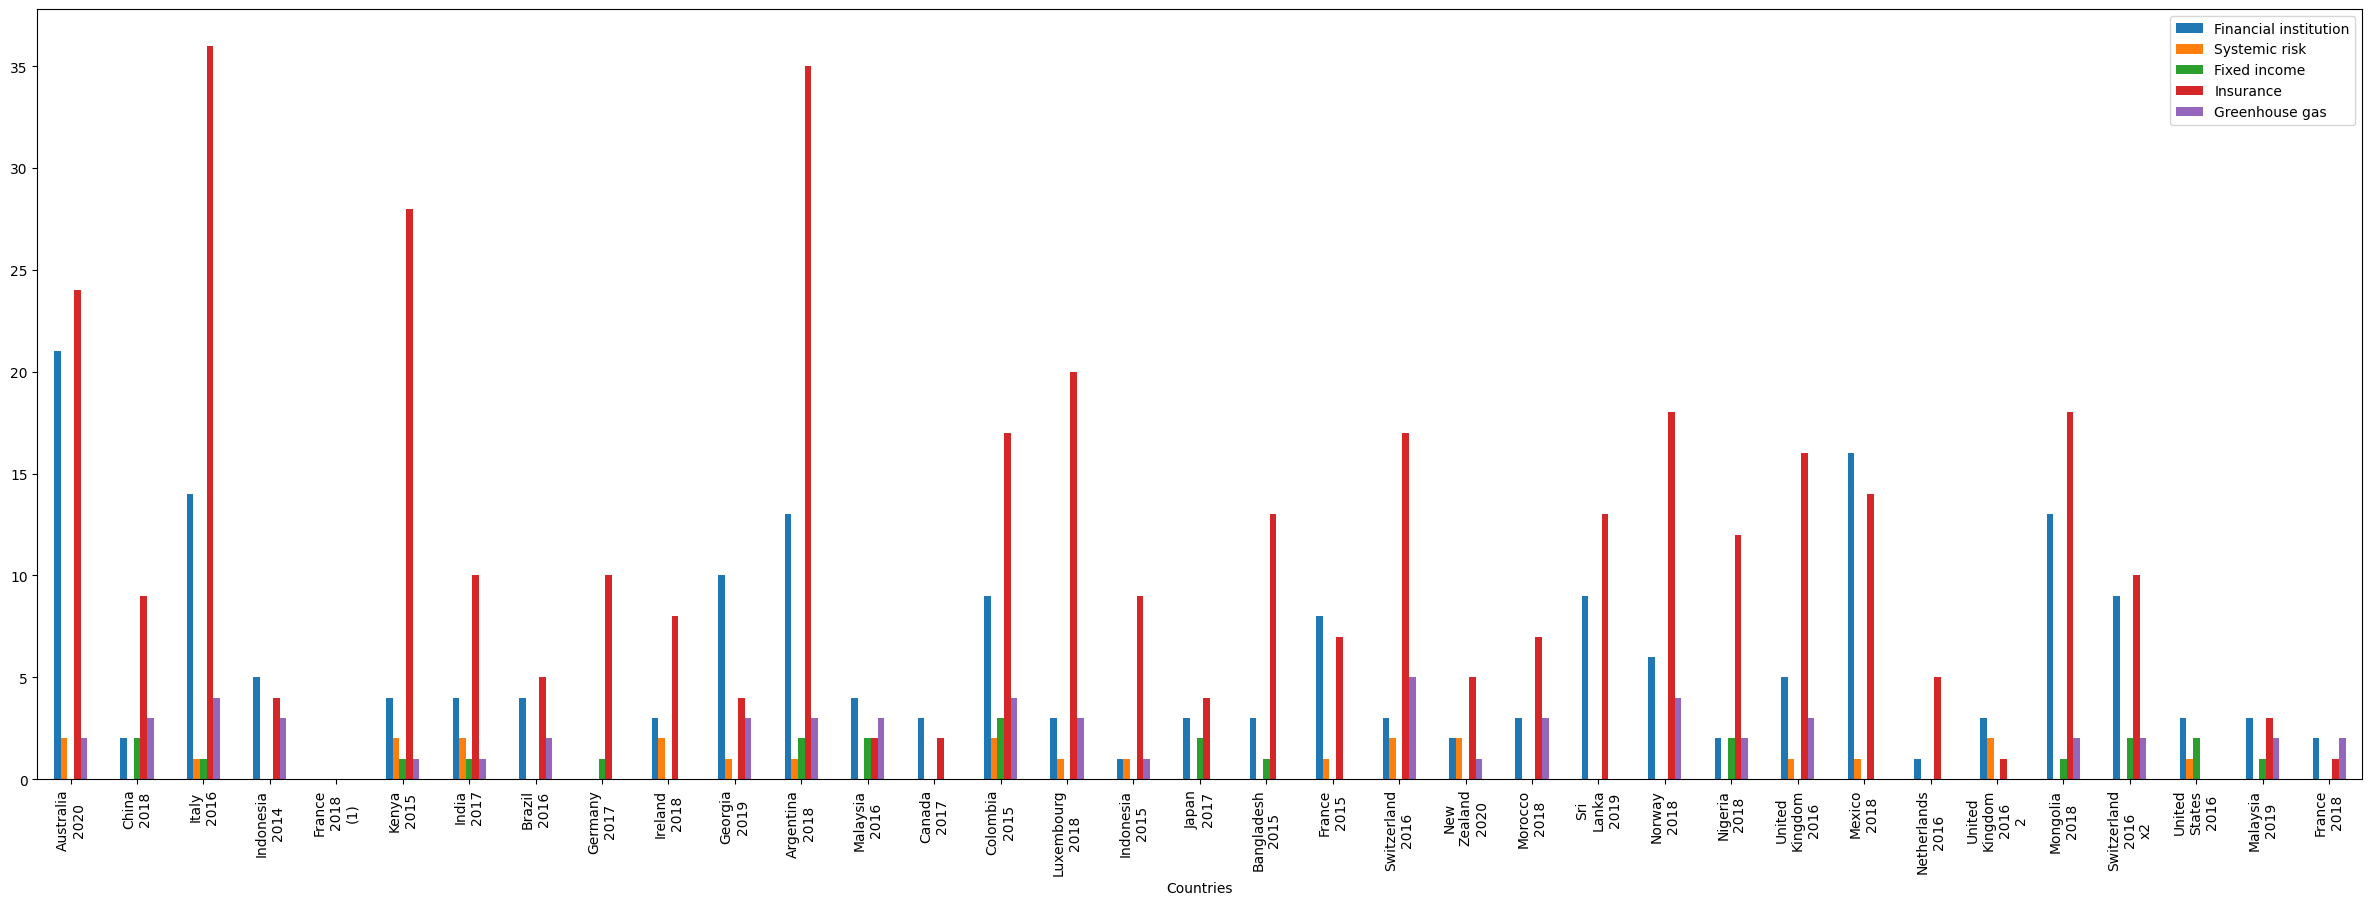

In [37]:
print(chunks[0])
plot_taxonomy(cons_file_name, chunks, 0)

['Wind', 'Drought', 'Capitalism', 'Psychological stress', 'City']


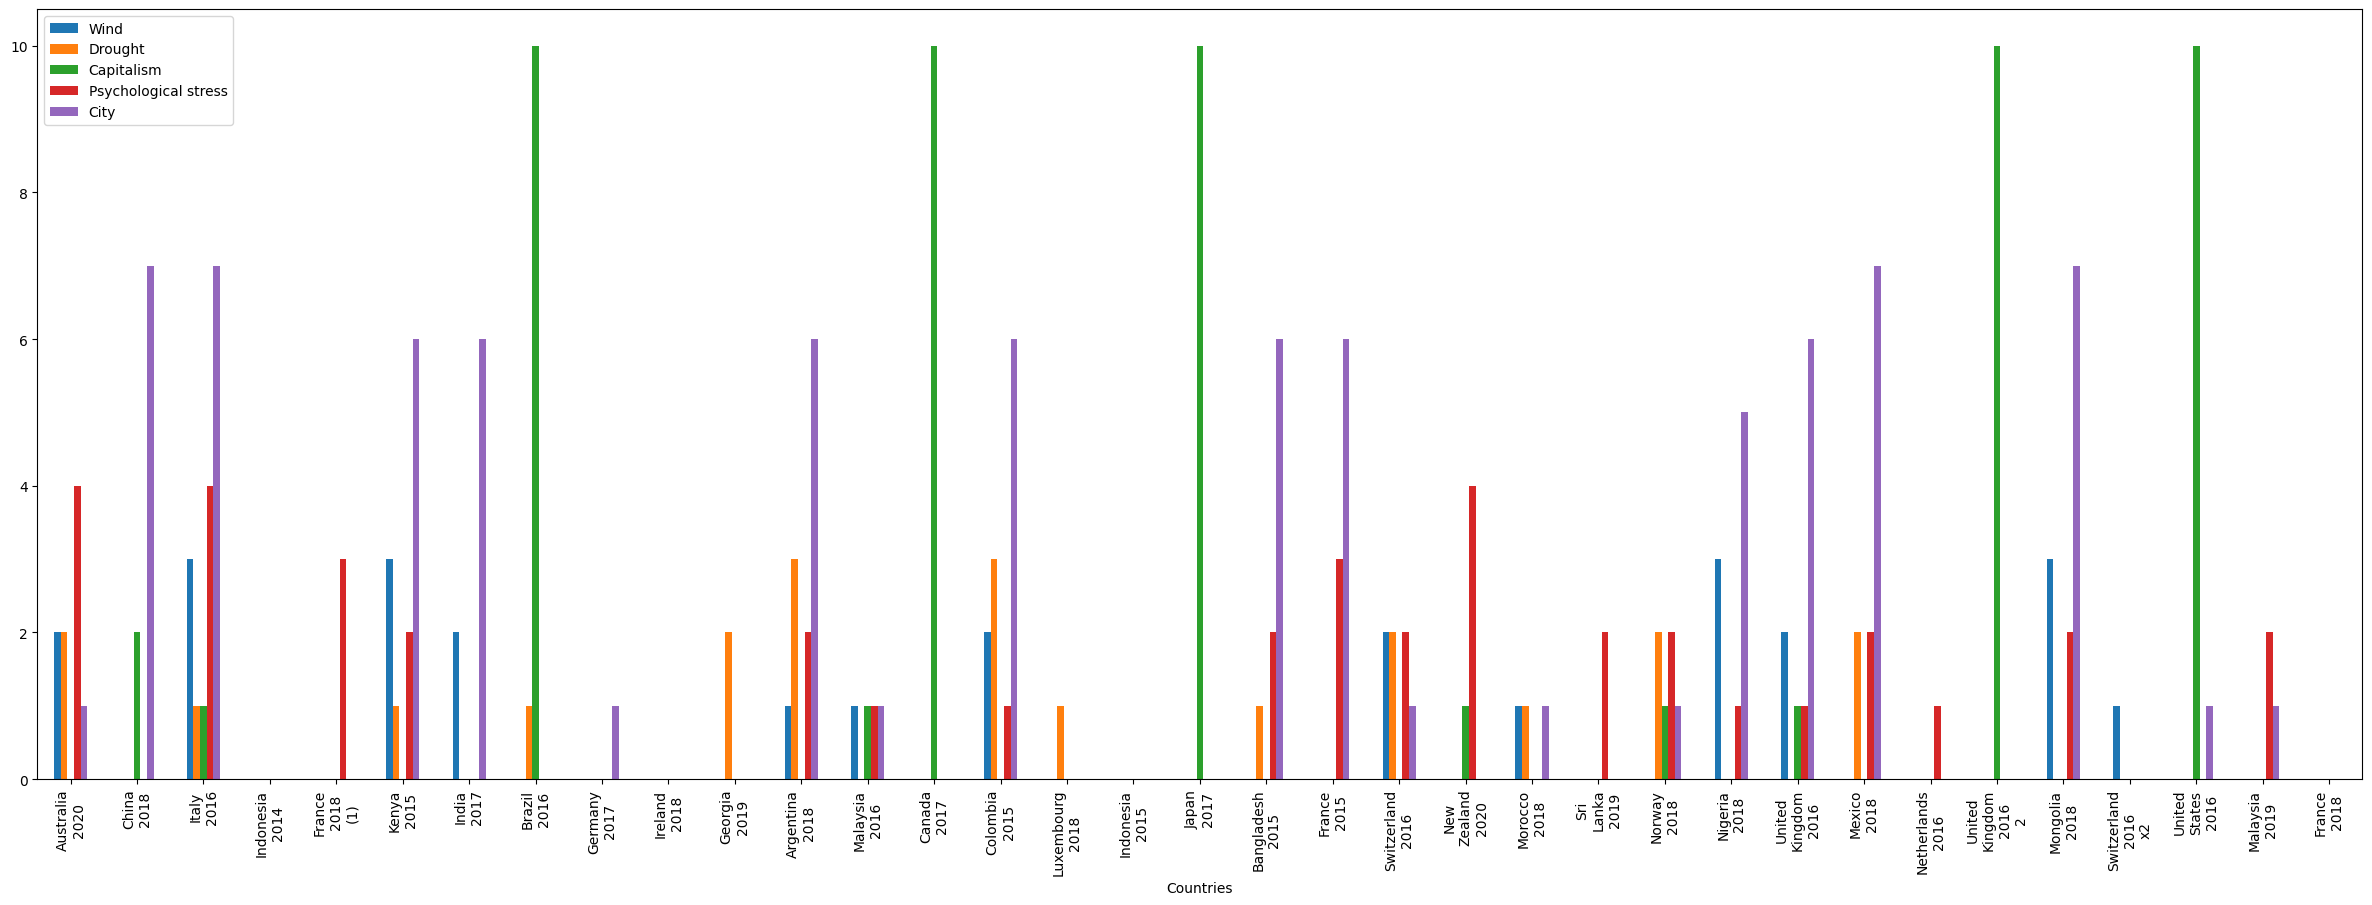

In [38]:
plot_taxonomy(cons_file_name, chunks, 1)

['Valuation (finance)', 'Equity (finance)', 'Green growth', 'Industry', 'Fossil fuel']


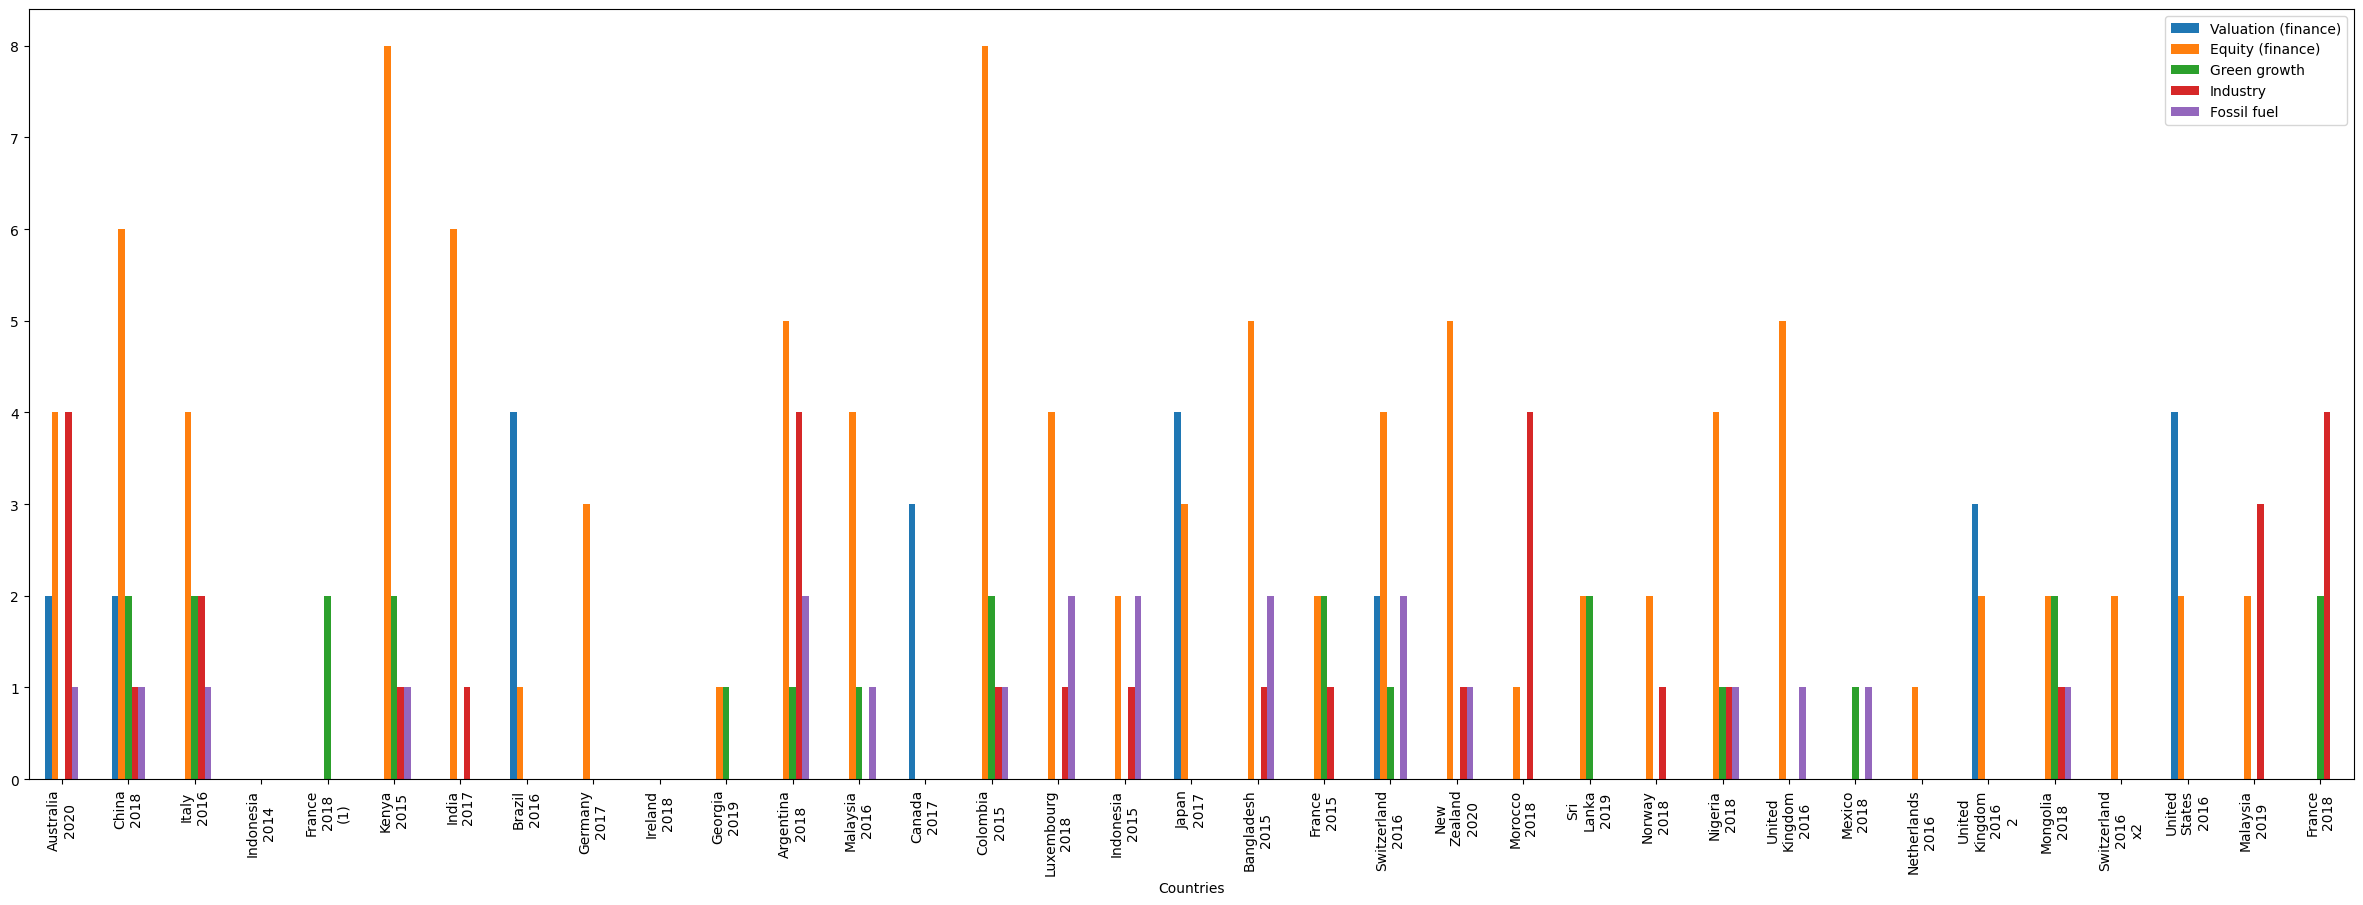

In [39]:
plot_taxonomy(cons_file_name, chunks, 2)

['Institutional investor', 'Climate bond', 'Credit risk', 'Boundary delimitation', 'Carbon']


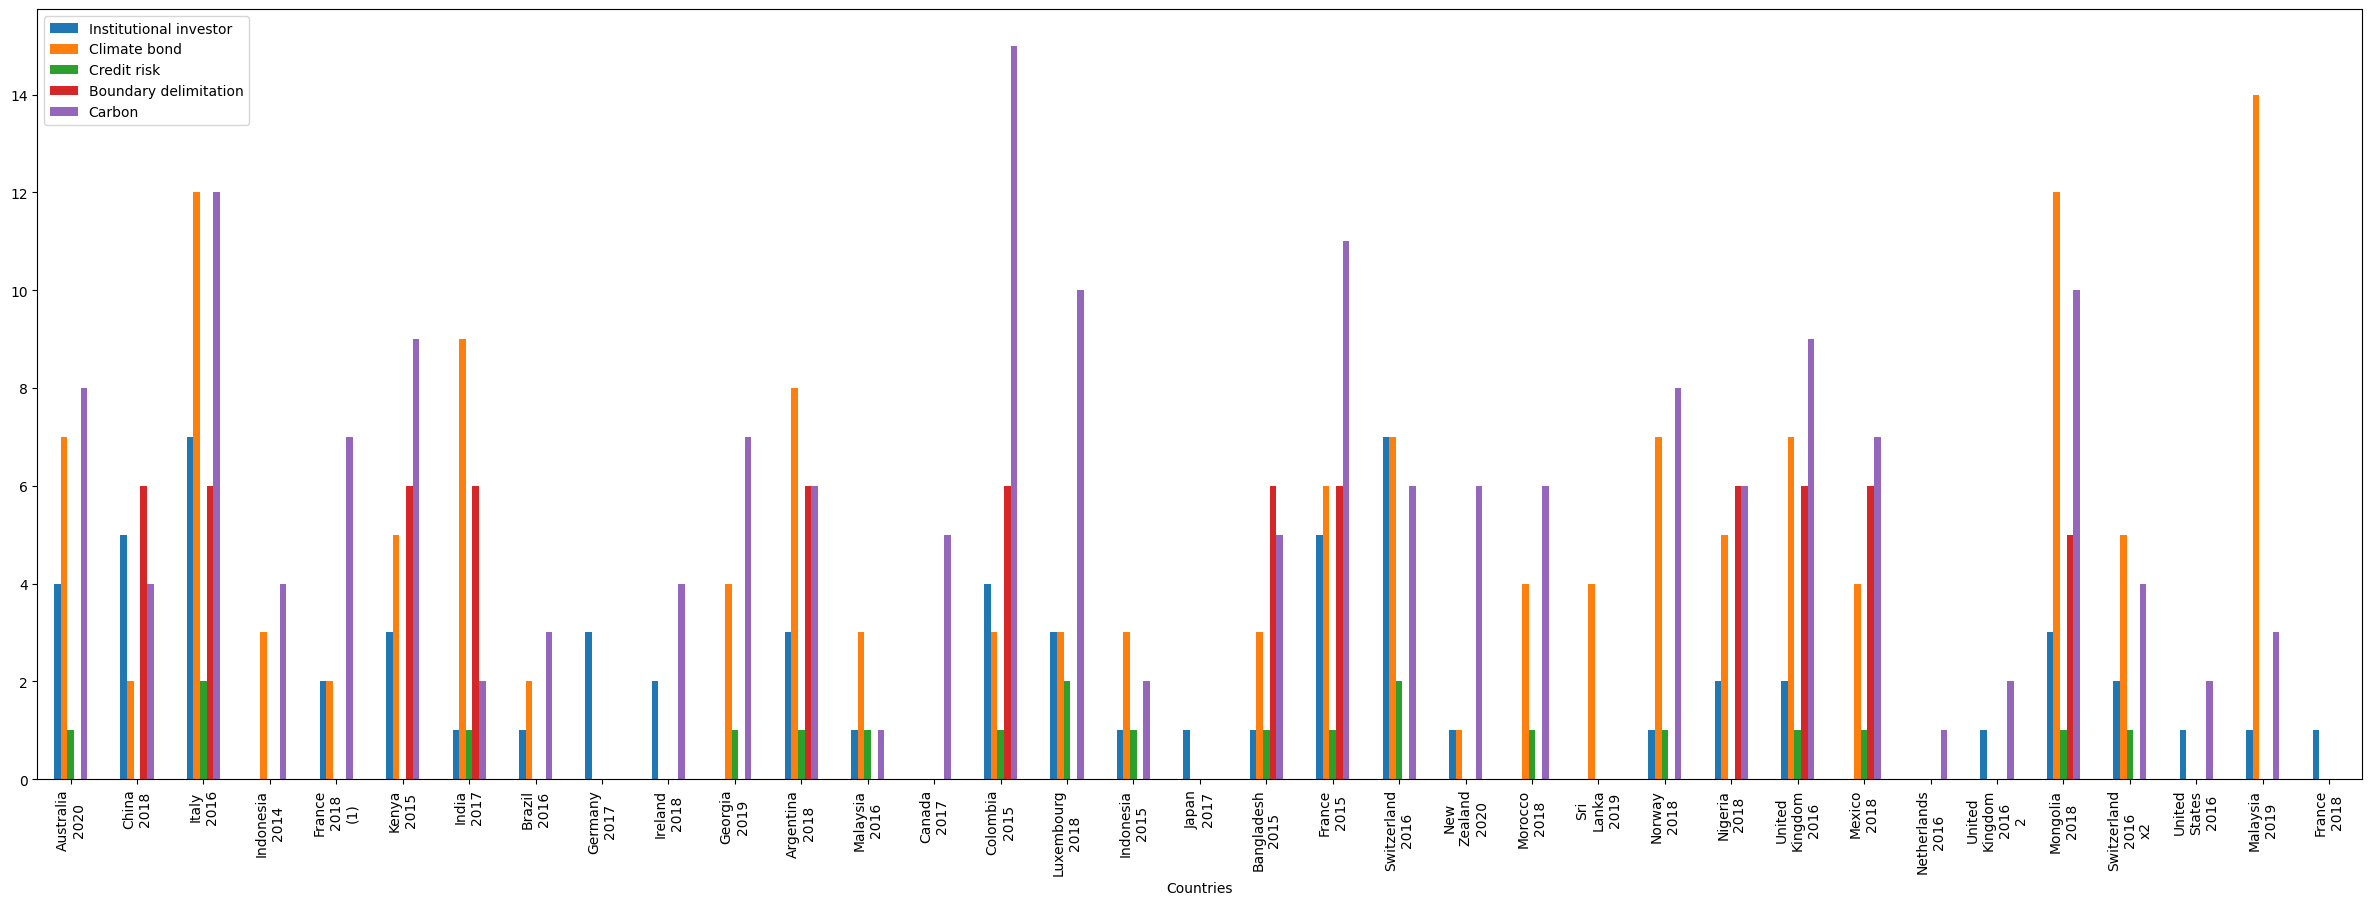

In [40]:
plot_taxonomy(cons_file_name, chunks, 3)

['Asset classes', 'Sustainable development', 'Renewable energy', 'Agriculture', 'Macro photography']


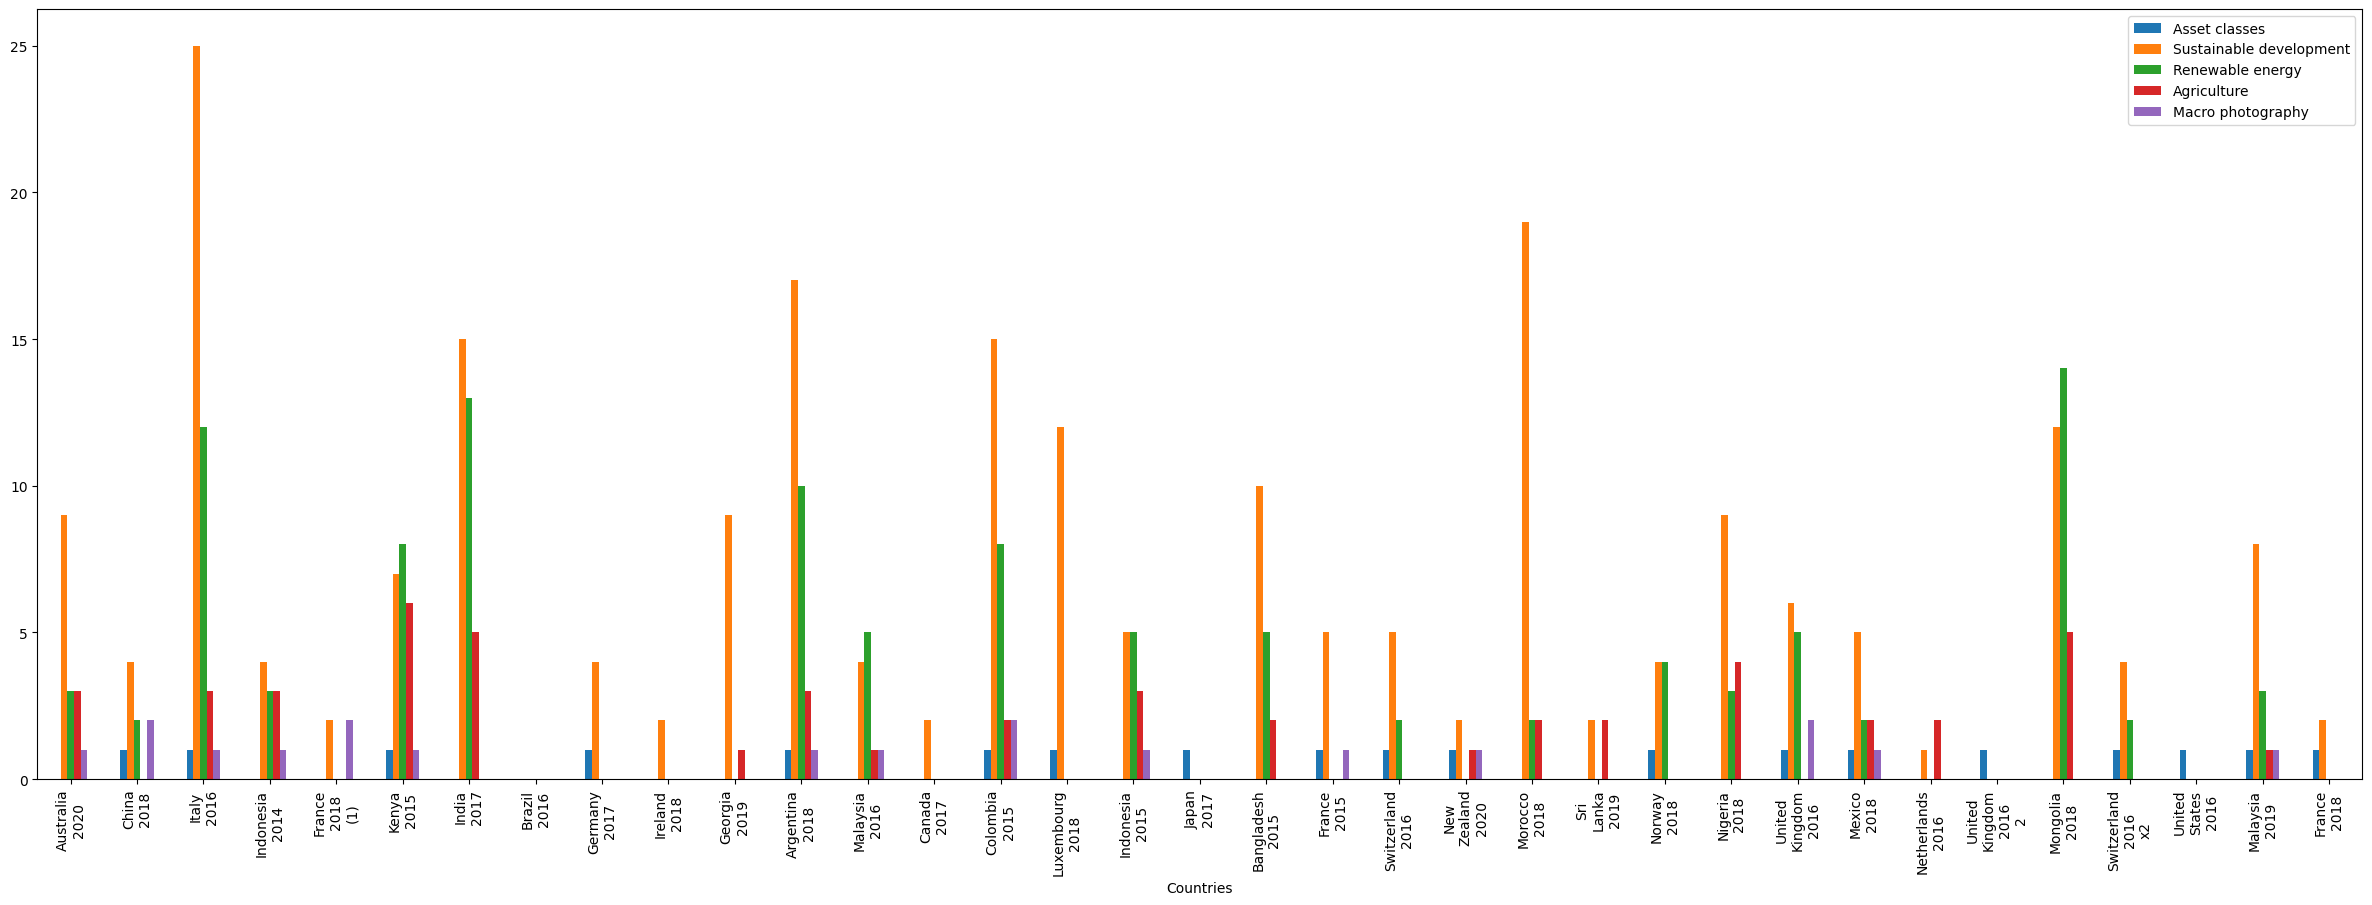

In [41]:
plot_taxonomy(cons_file_name, chunks, 4)

['Sustainable Development Goals', 'Capital market', 'Investment management', 'Gene expression', 'Seventy (LDS Church)']


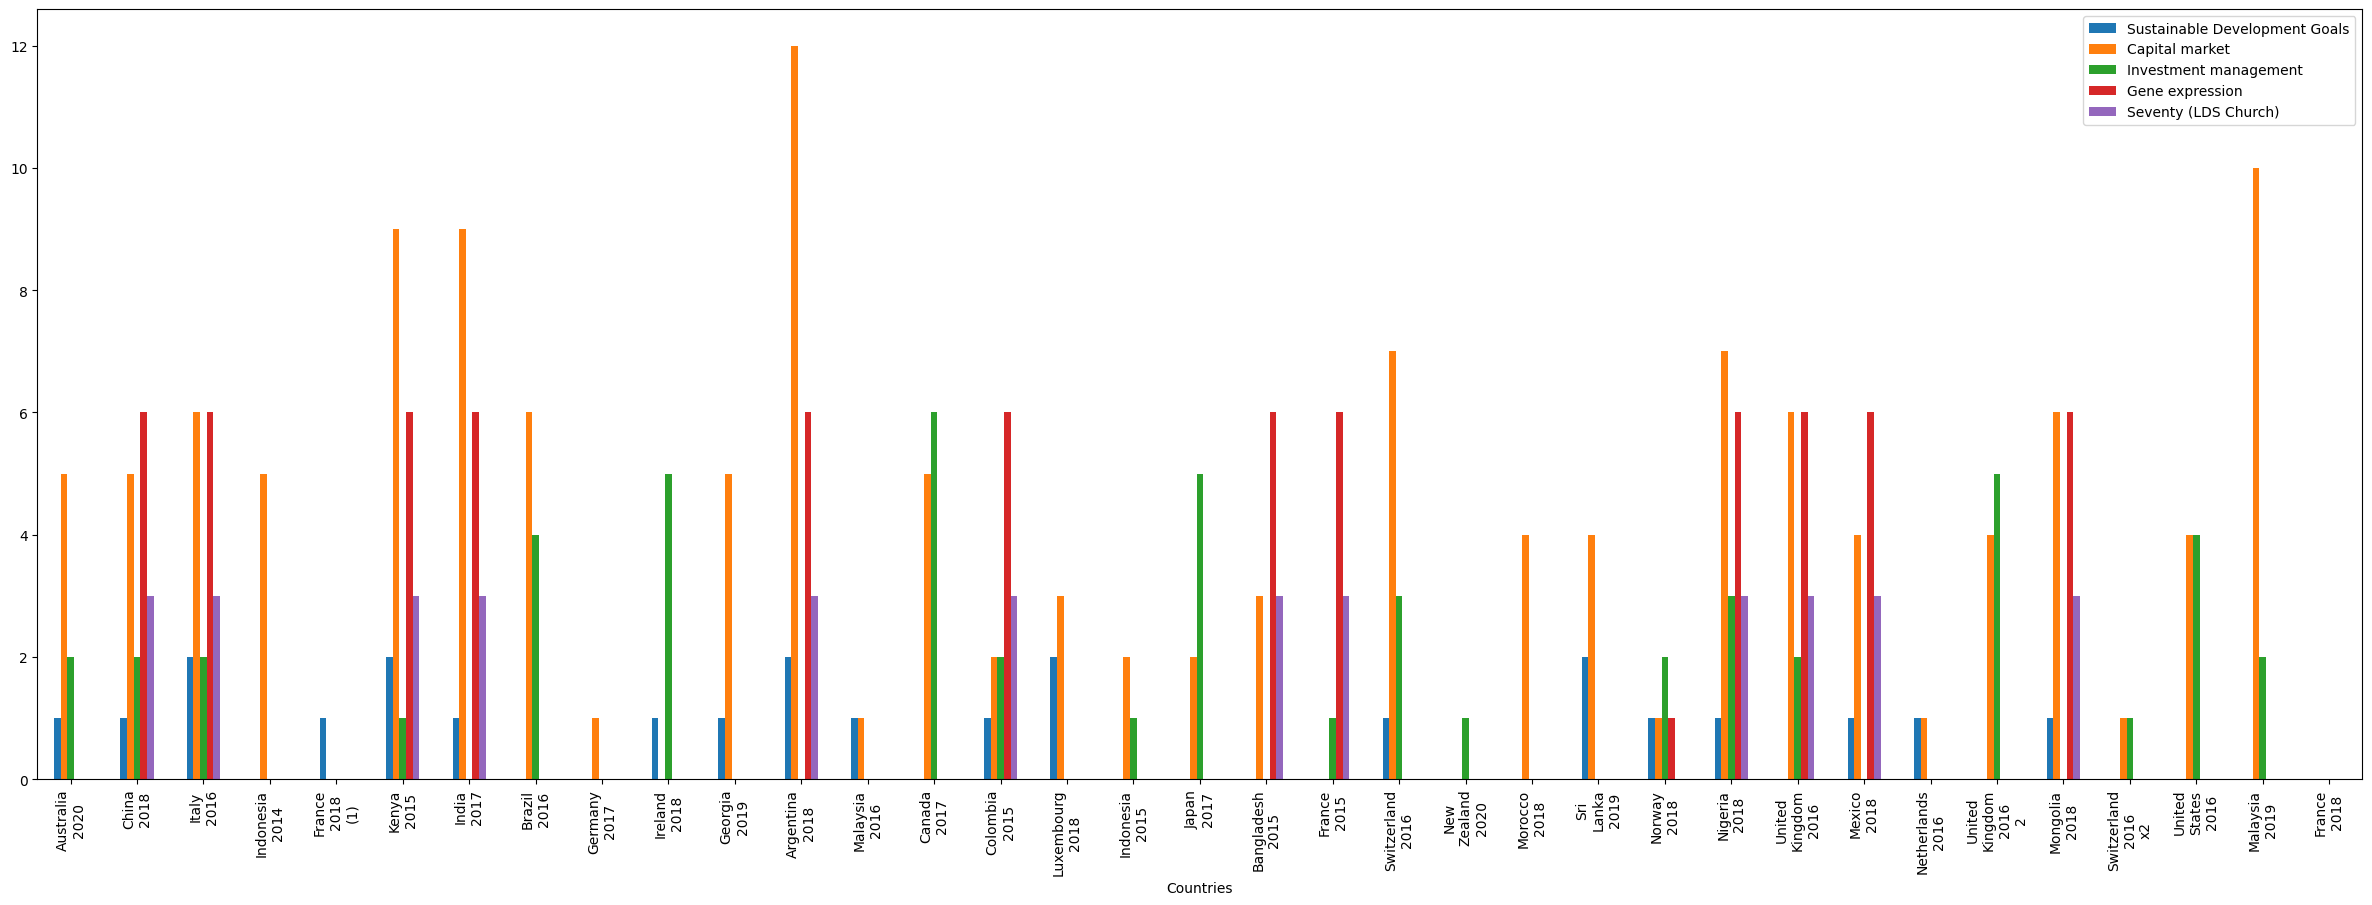

In [42]:
plot_taxonomy(cons_file_name, chunks, 5)

['Poverty', 'Ecosystem', 'Financial inclusion', 'Communication', 'Environmental issue']


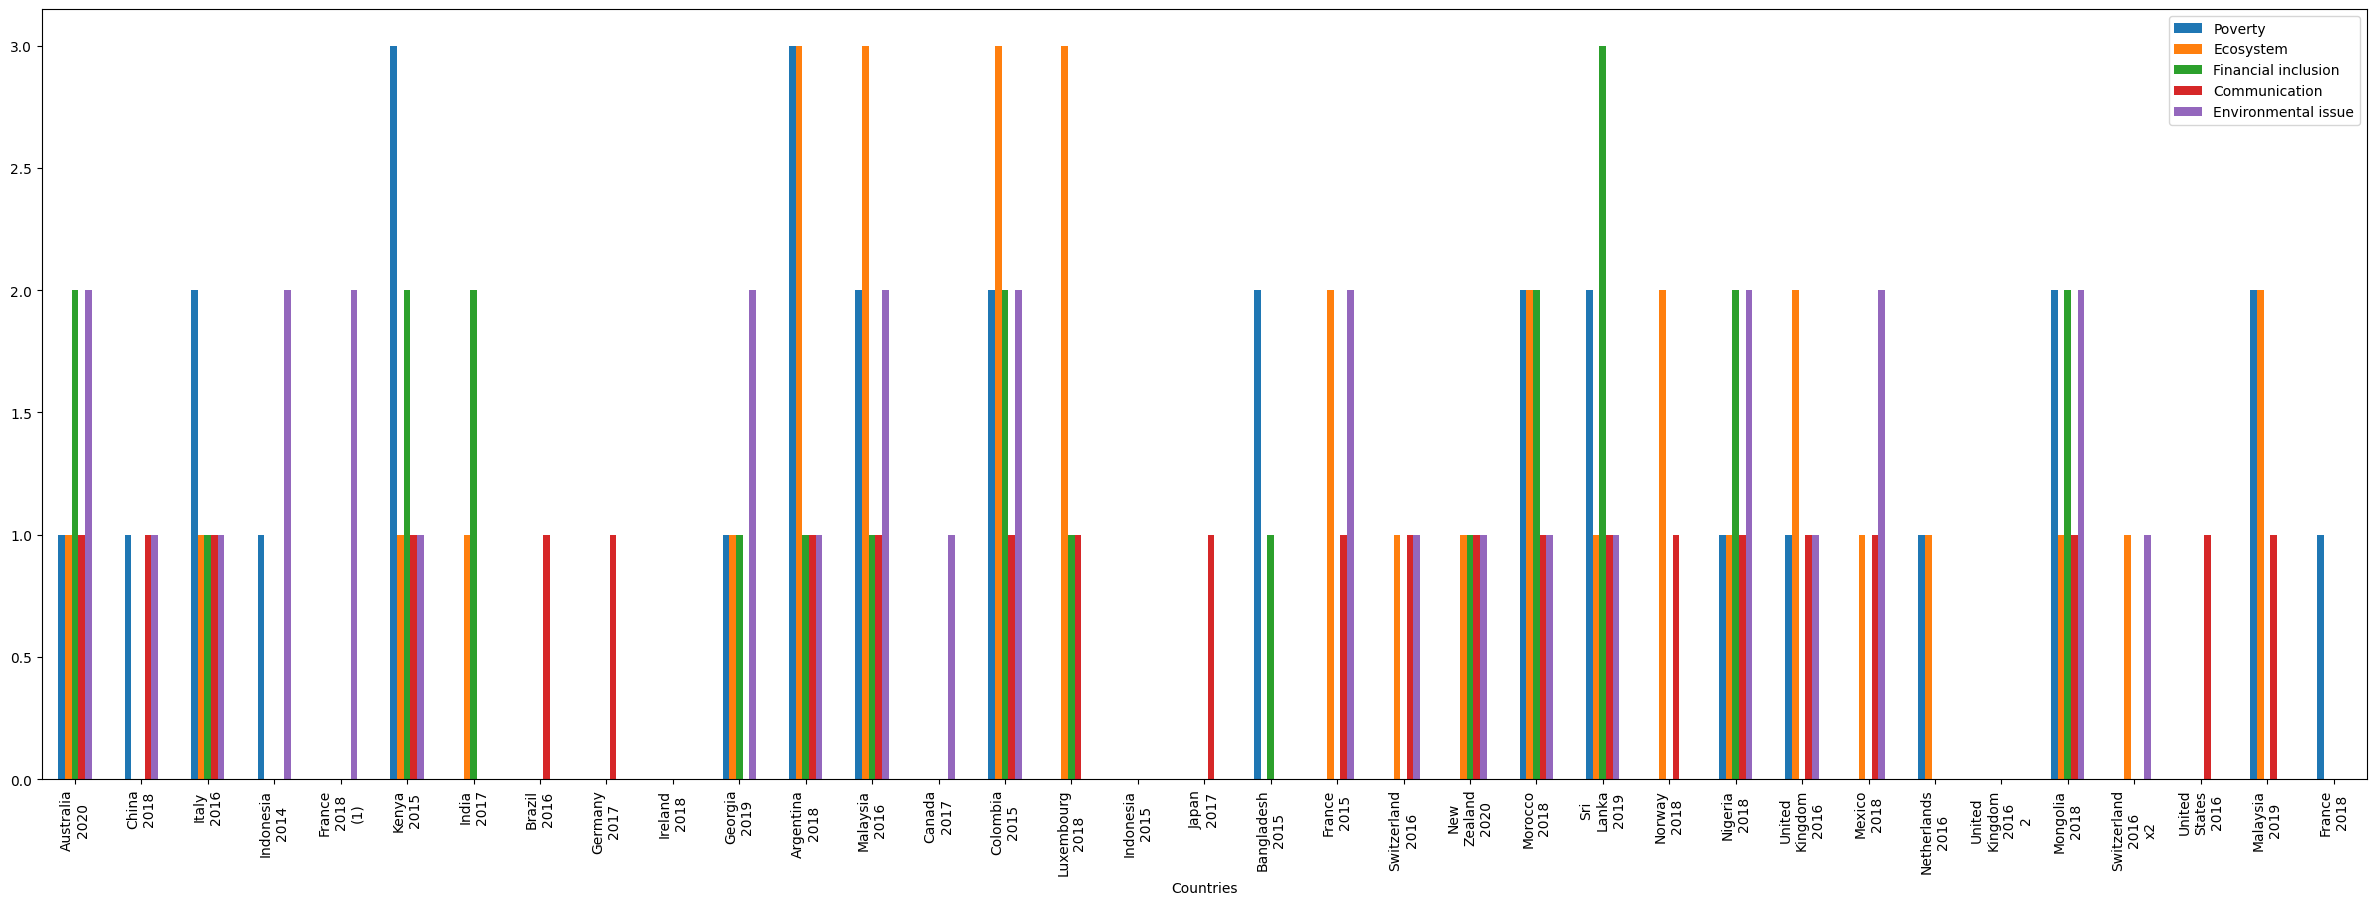

In [43]:
plot_taxonomy(cons_file_name, chunks, 6)

['Compact space', 'Energy', 'Environmental, social and corporate governance', 'Risk assessment', 'Digital terrestrial television']


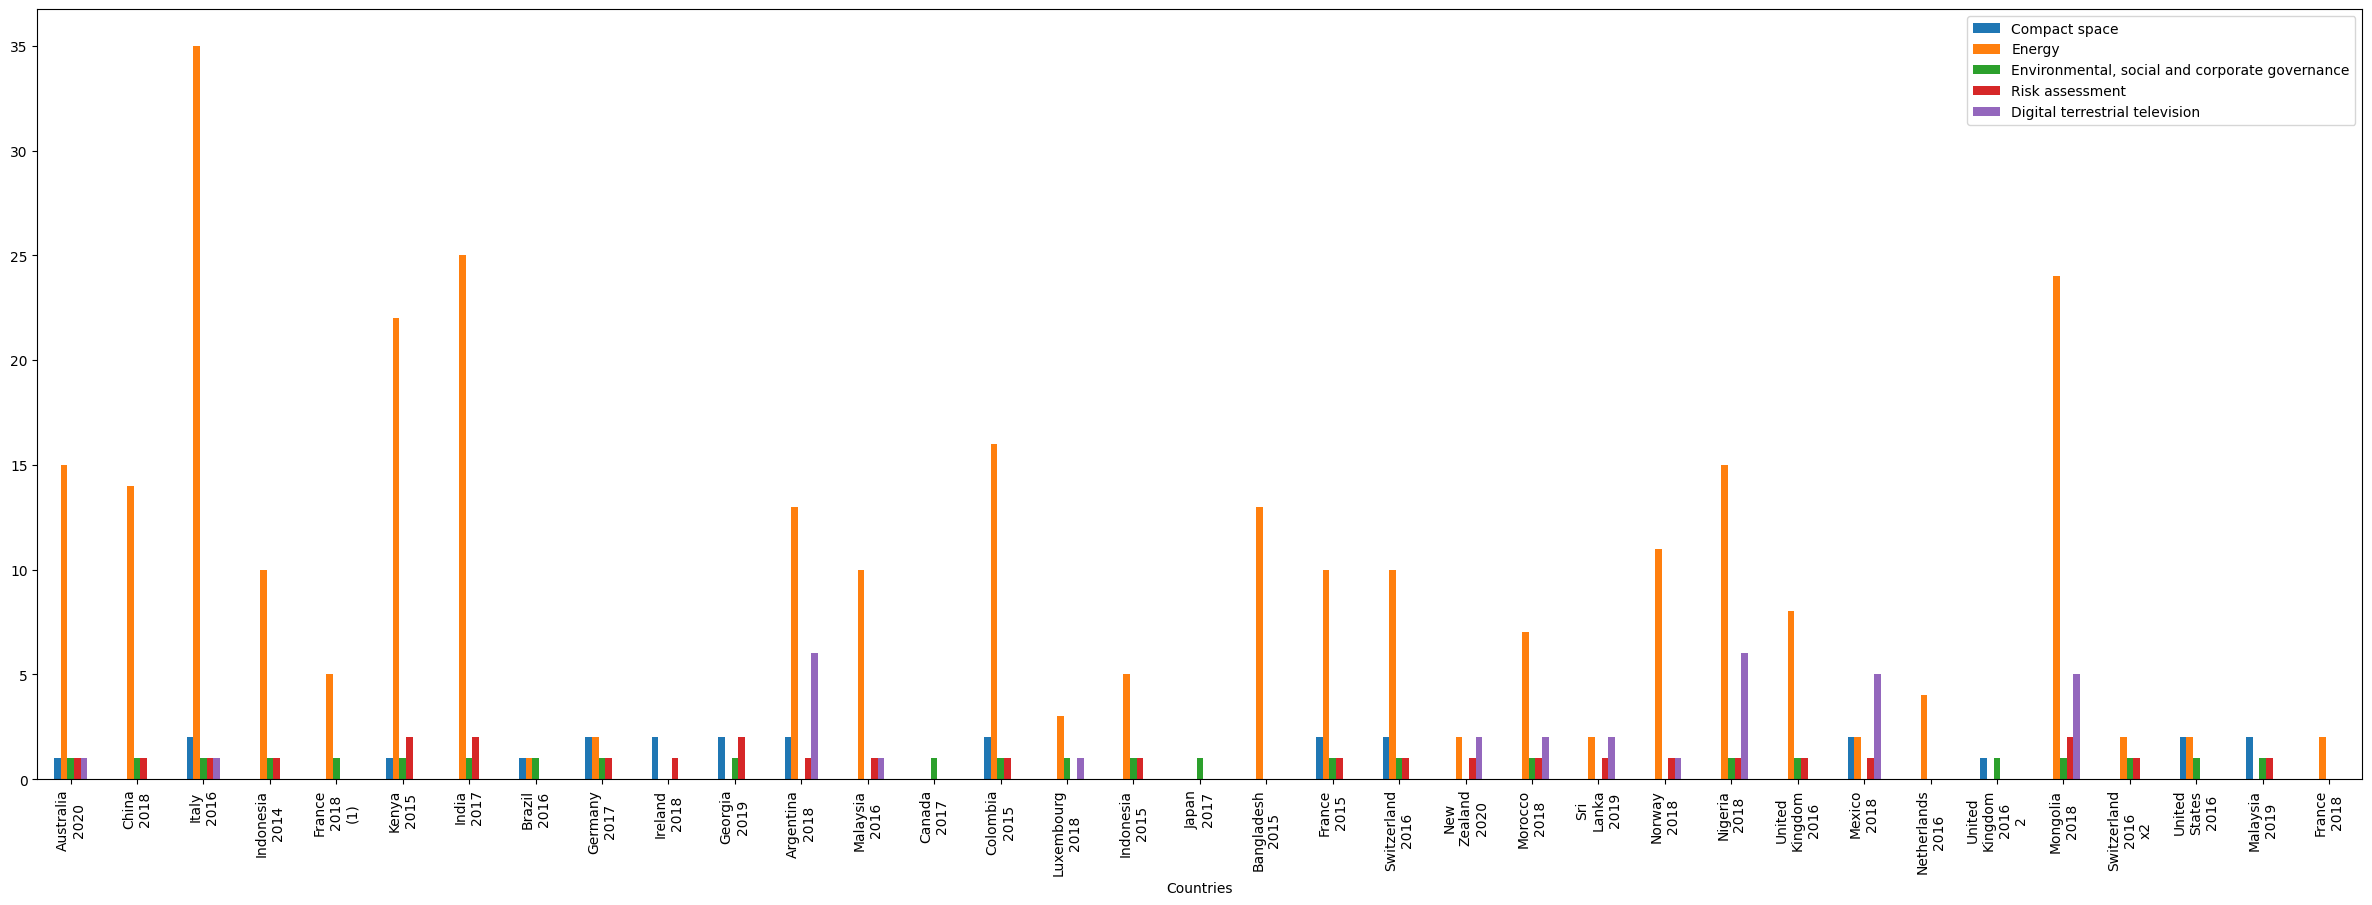

In [44]:
plot_taxonomy(cons_file_name, chunks, 7)

['Corporate governance', 'Private equity', 'Global warming', 'Asset management', 'Serfdom']


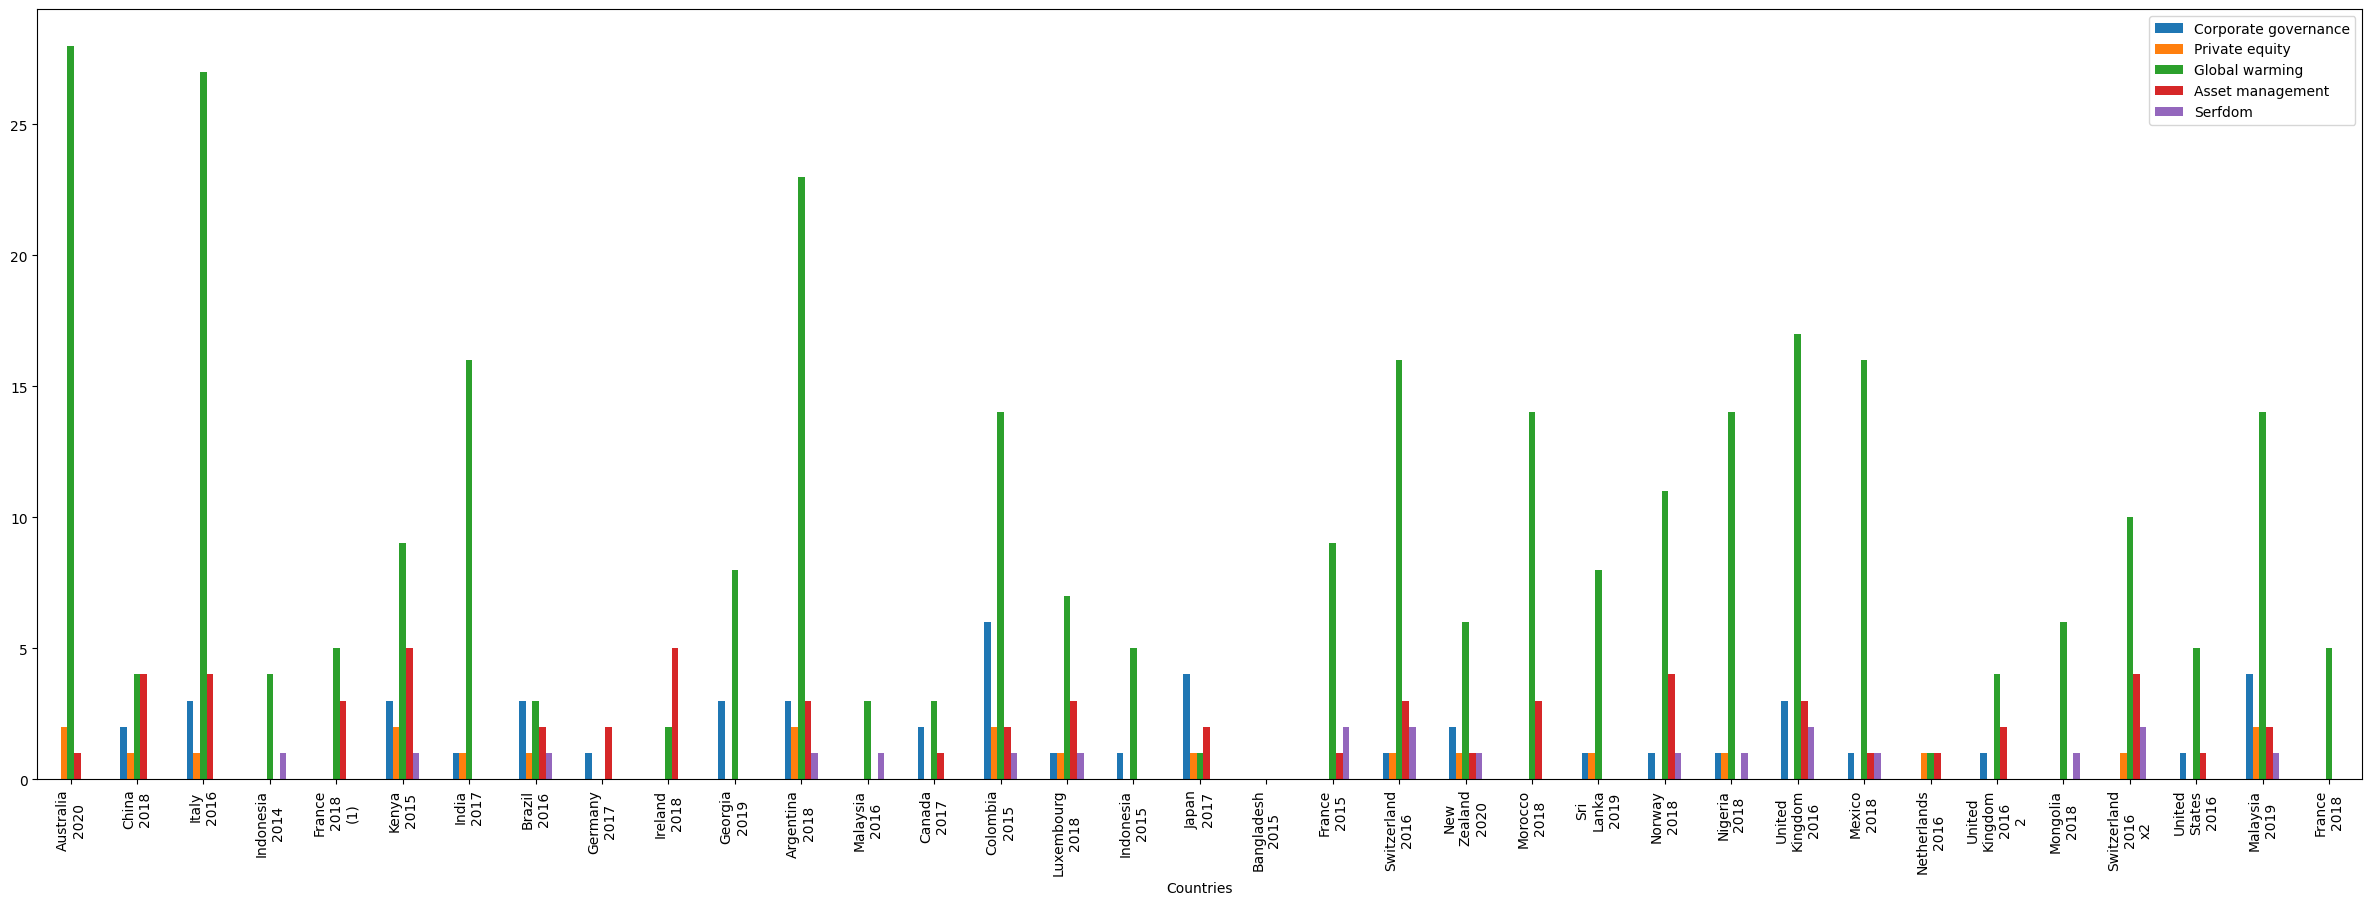

In [45]:
plot_taxonomy(cons_file_name, chunks, 8)

['Capital requirement', 'Nun', 'Taxonomy (biology)', 'Externality', 'Risk management']


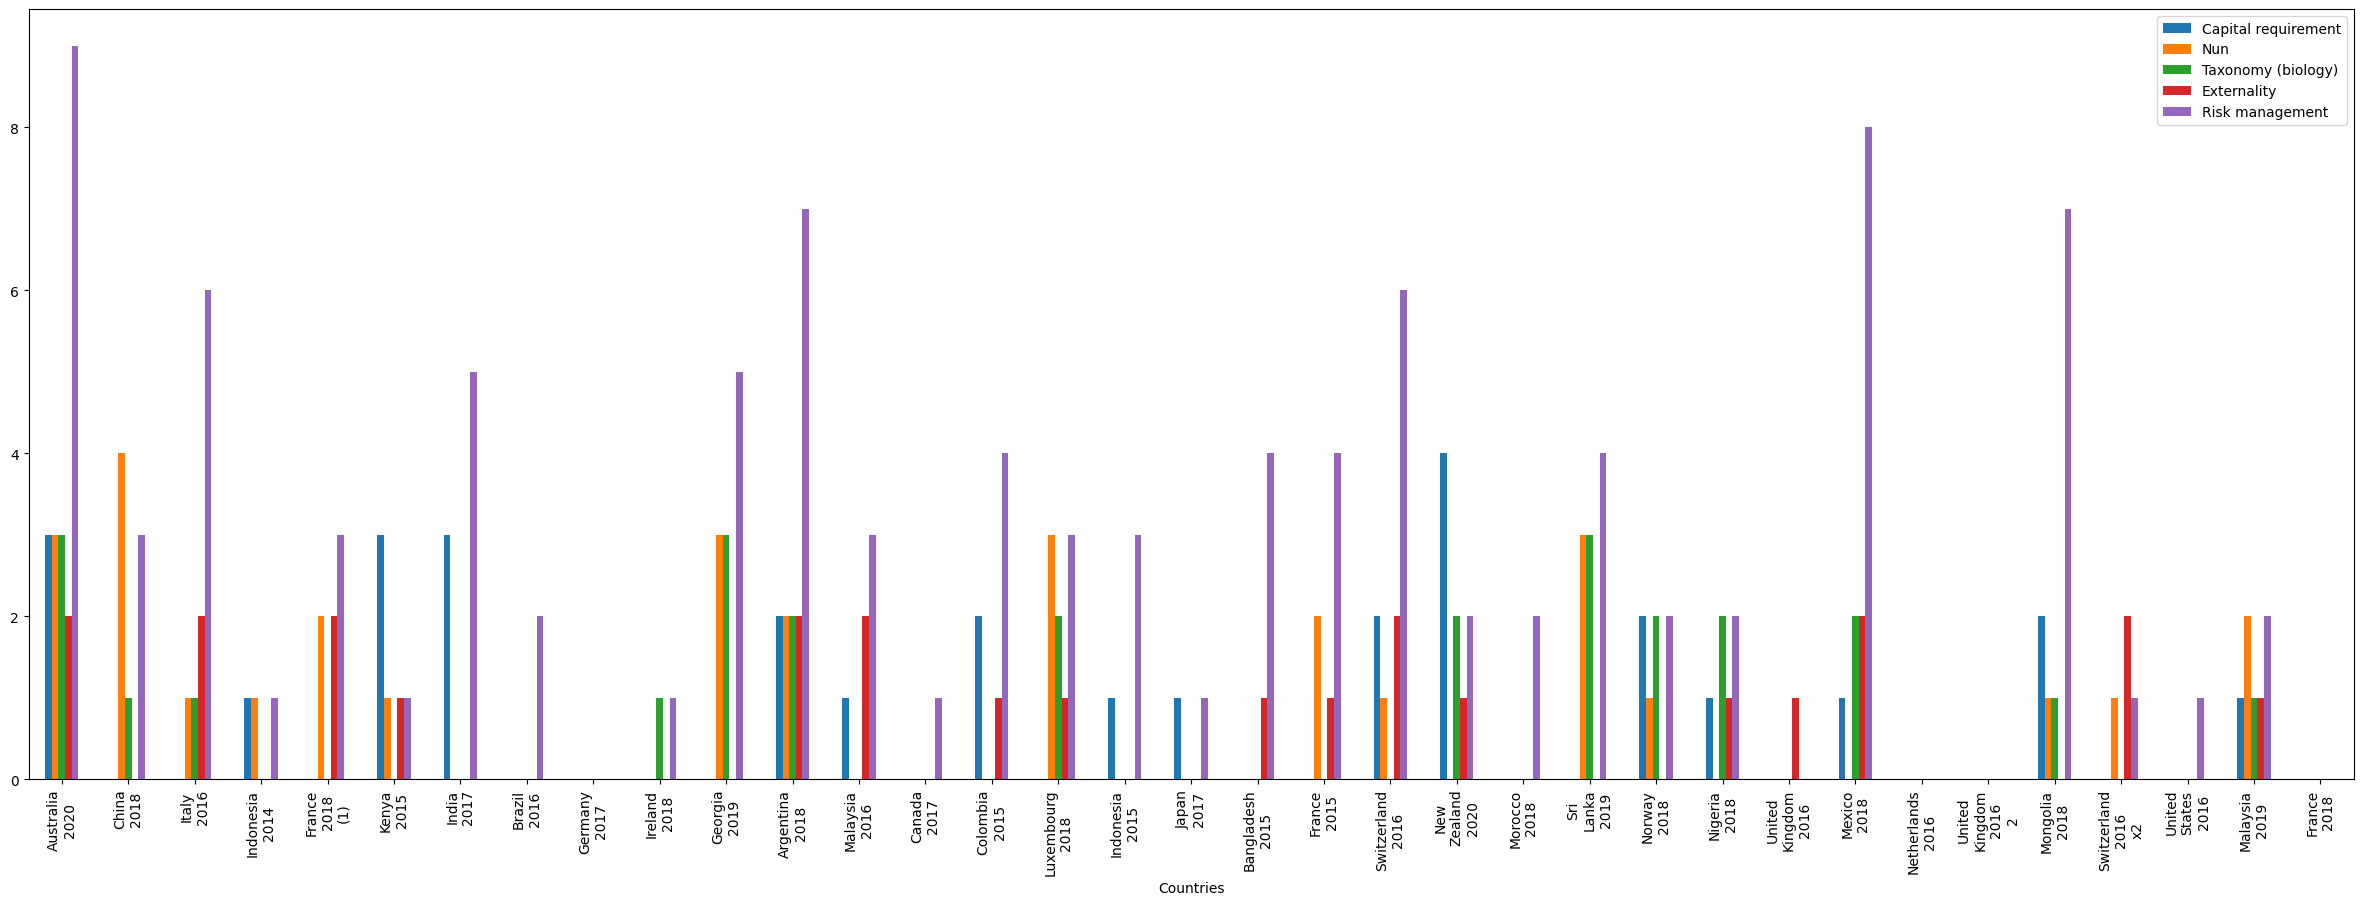

In [46]:
plot_taxonomy(cons_file_name, chunks, 9)

['Pounds per square inch', 'Equator', 'Accounting', 'Energy transition', 'United Nations']


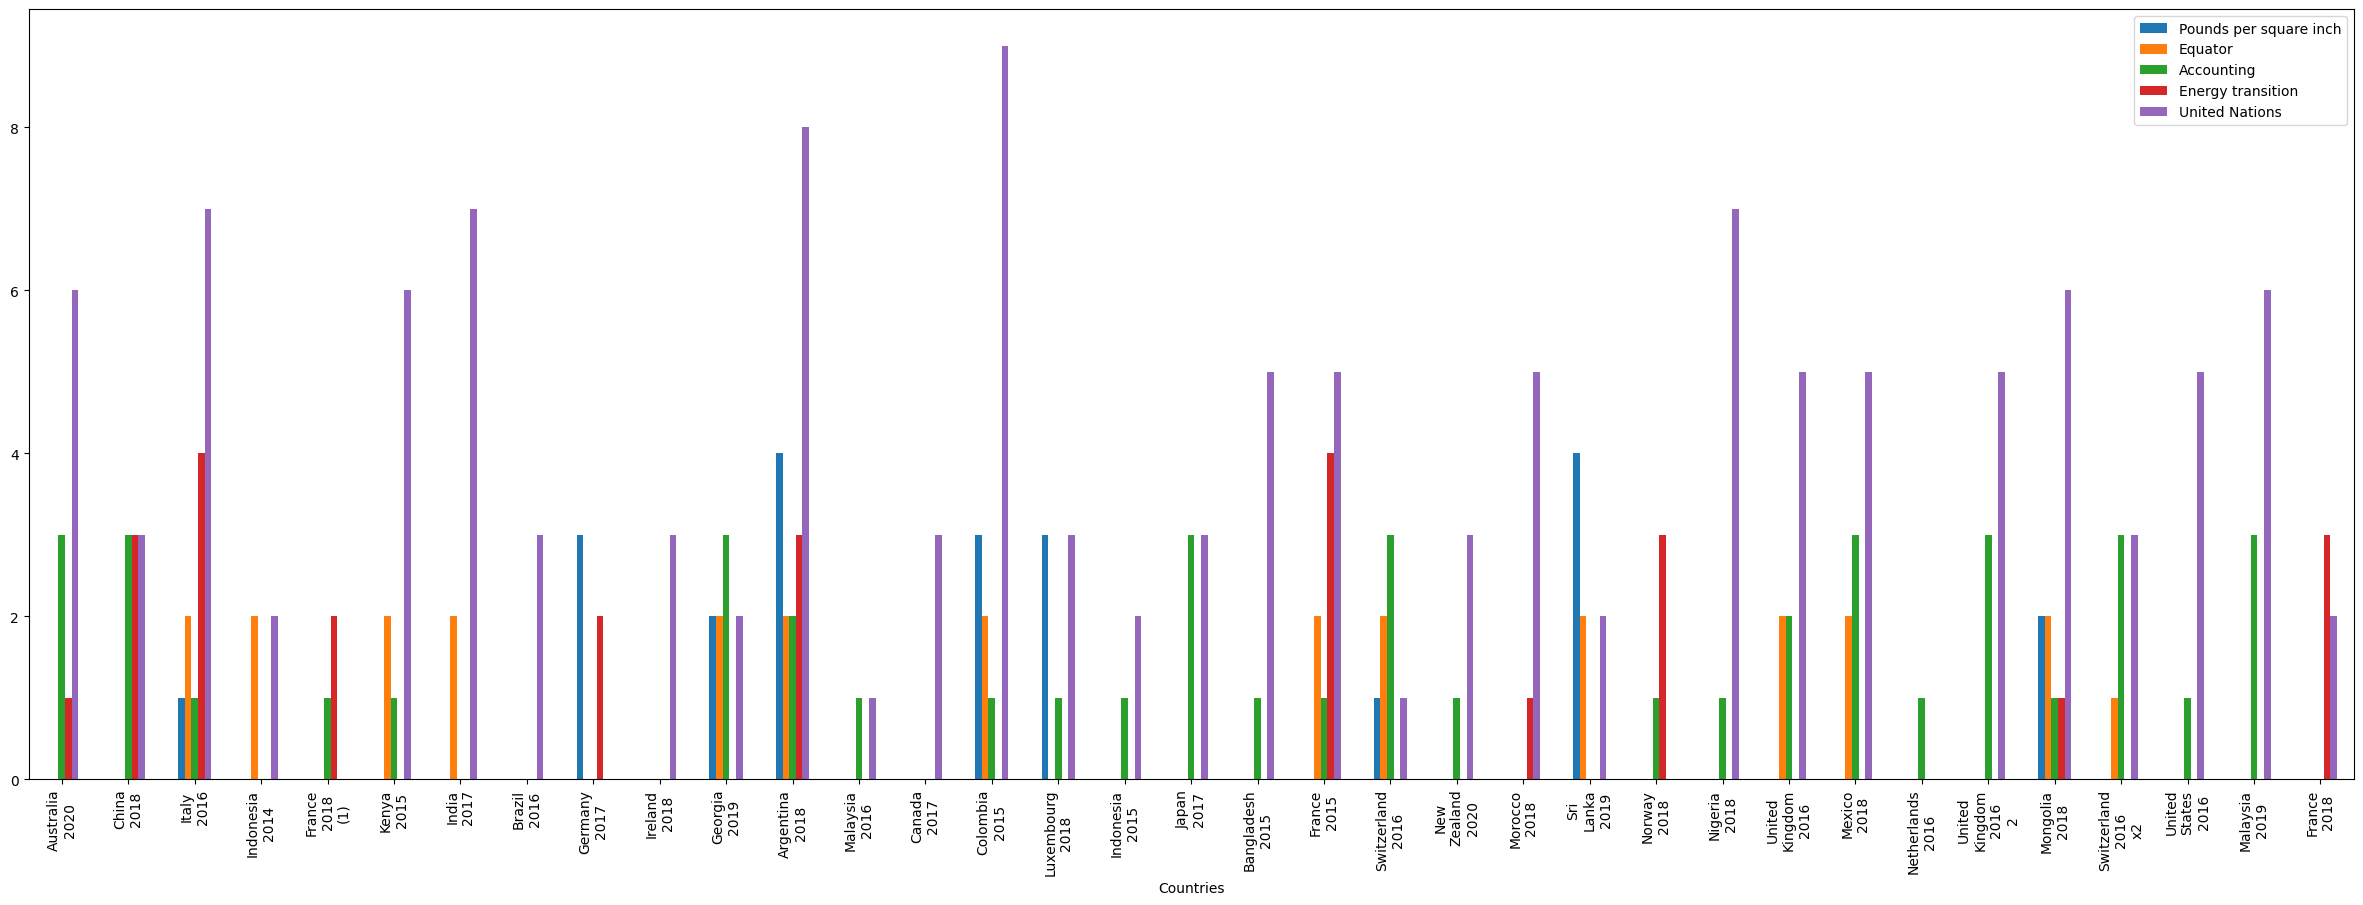

In [47]:
plot_taxonomy(cons_file_name, chunks, 10)

['Financial market', 'Civil society', 'Investment banking', 'Management', 'Market liquidity']


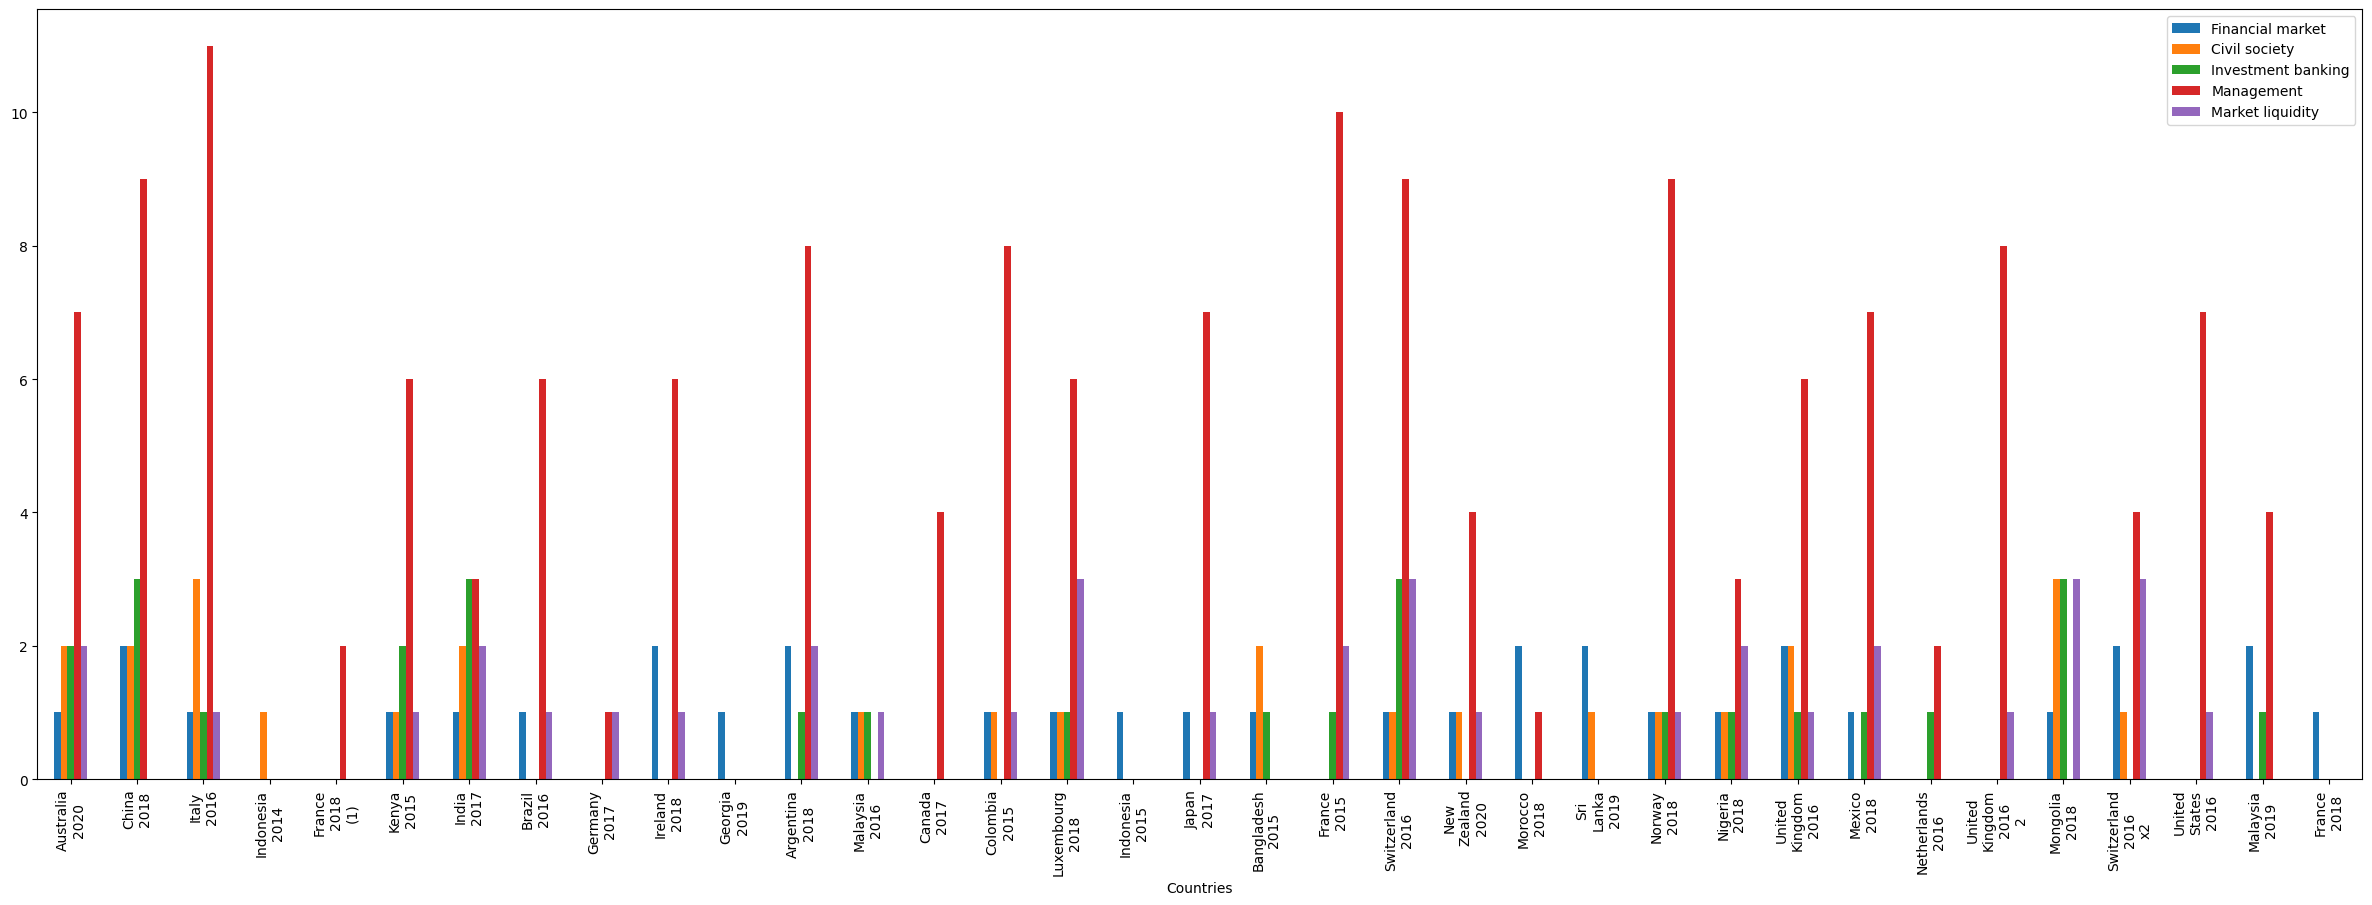

In [48]:
plot_taxonomy(cons_file_name, chunks, 11)

['Sustainable energy', 'Frontier', 'Momentum', 'Pension', 'Fiduciary']


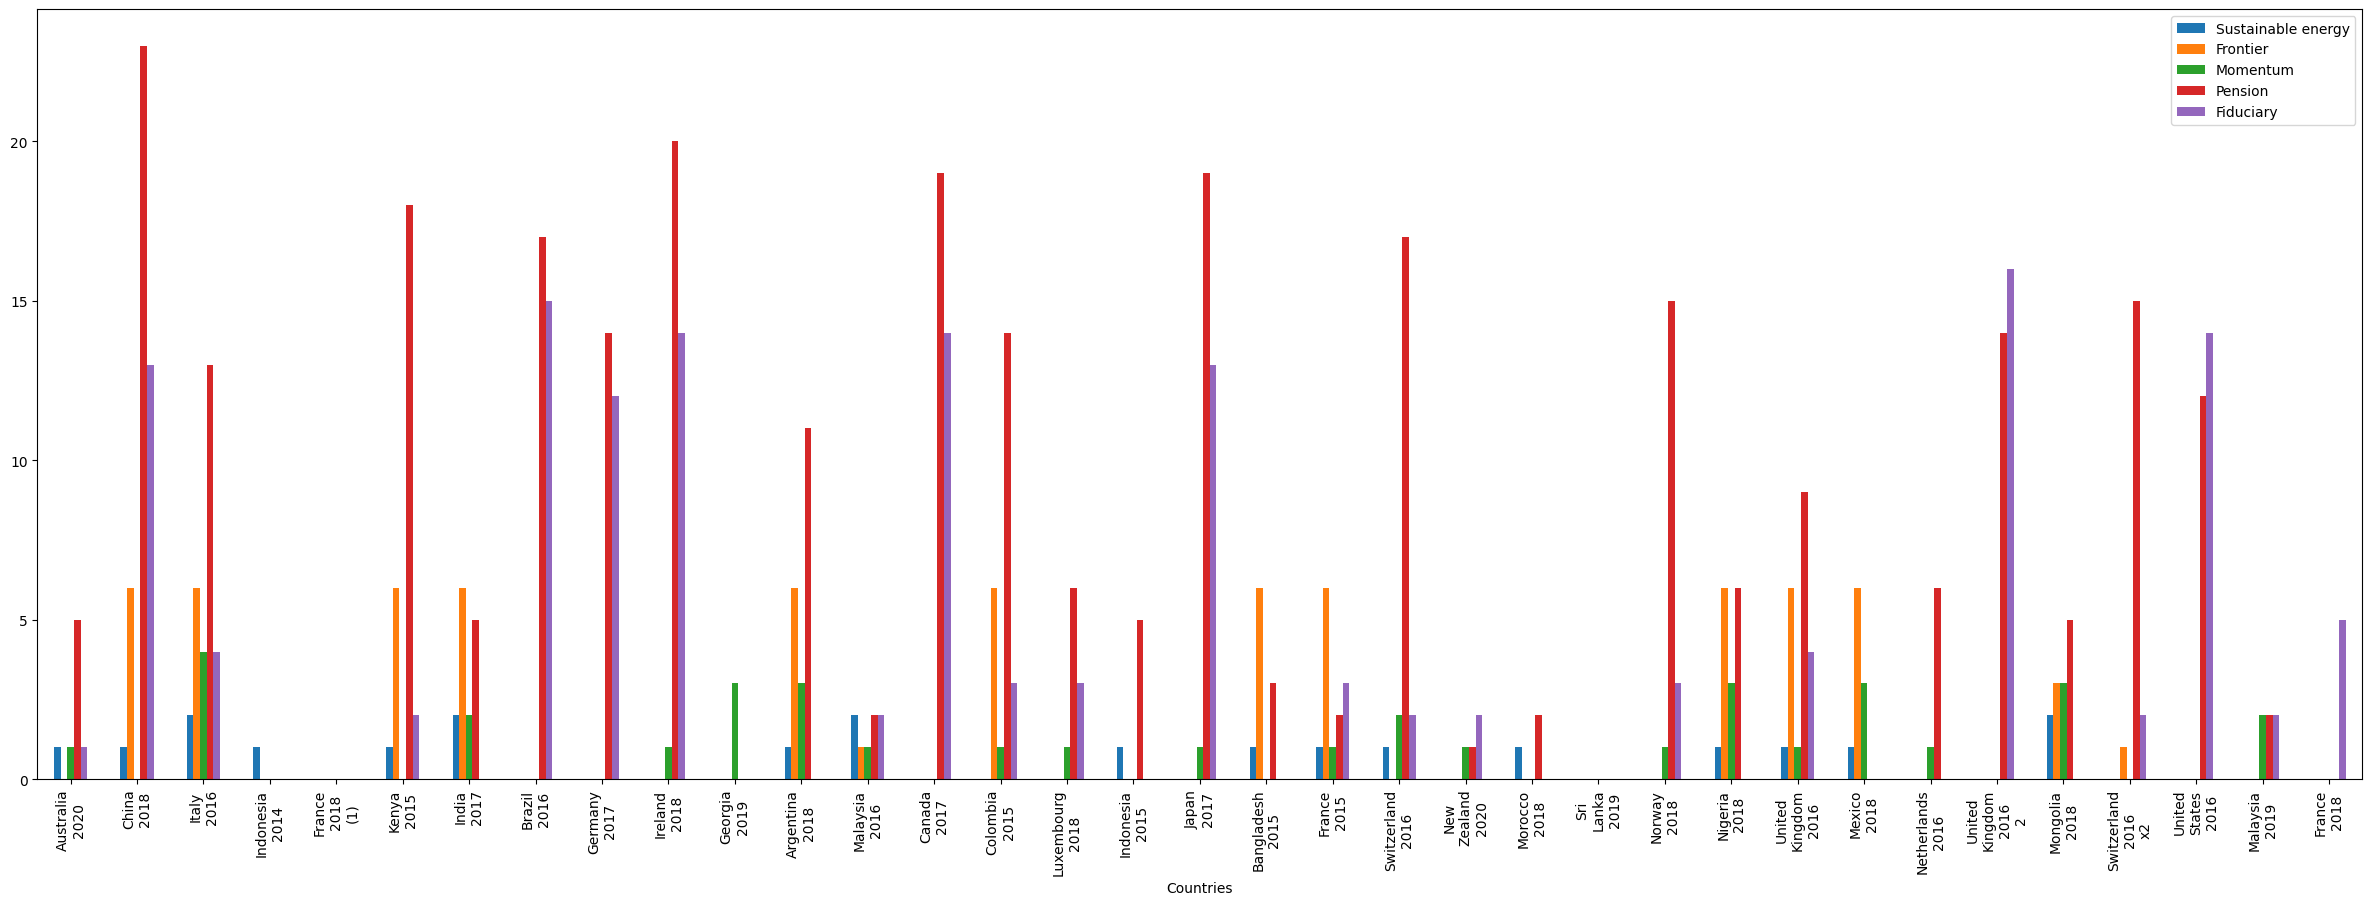

In [49]:
plot_taxonomy(cons_file_name, chunks, 12)

['Venture capital', 'Greenhouse', 'Agha (title)', 'Efficient energy use', 'Environmental governance']


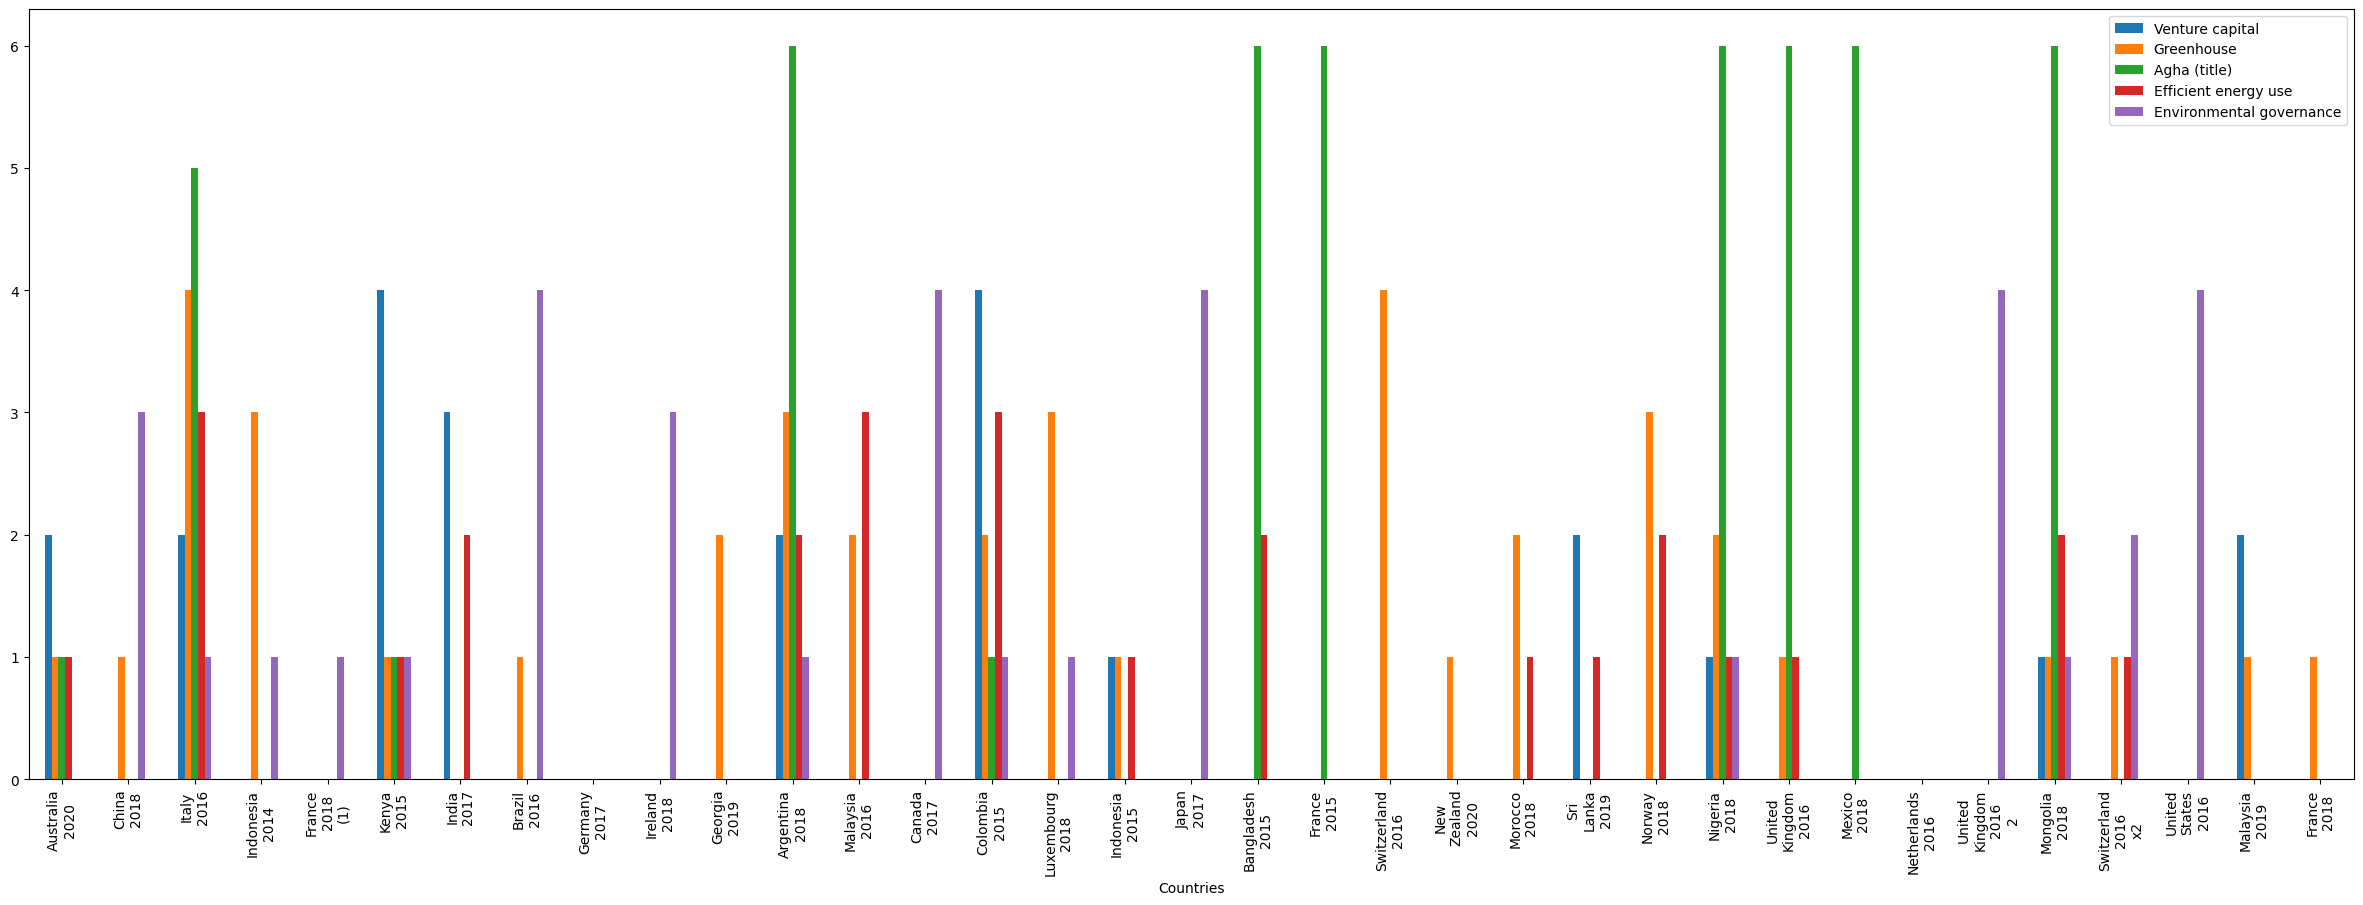

In [50]:
plot_taxonomy(cons_file_name, chunks, 13)

['Bond market', 'Social norm', 'Impact investing', 'Climate risk', 'Investment fund']


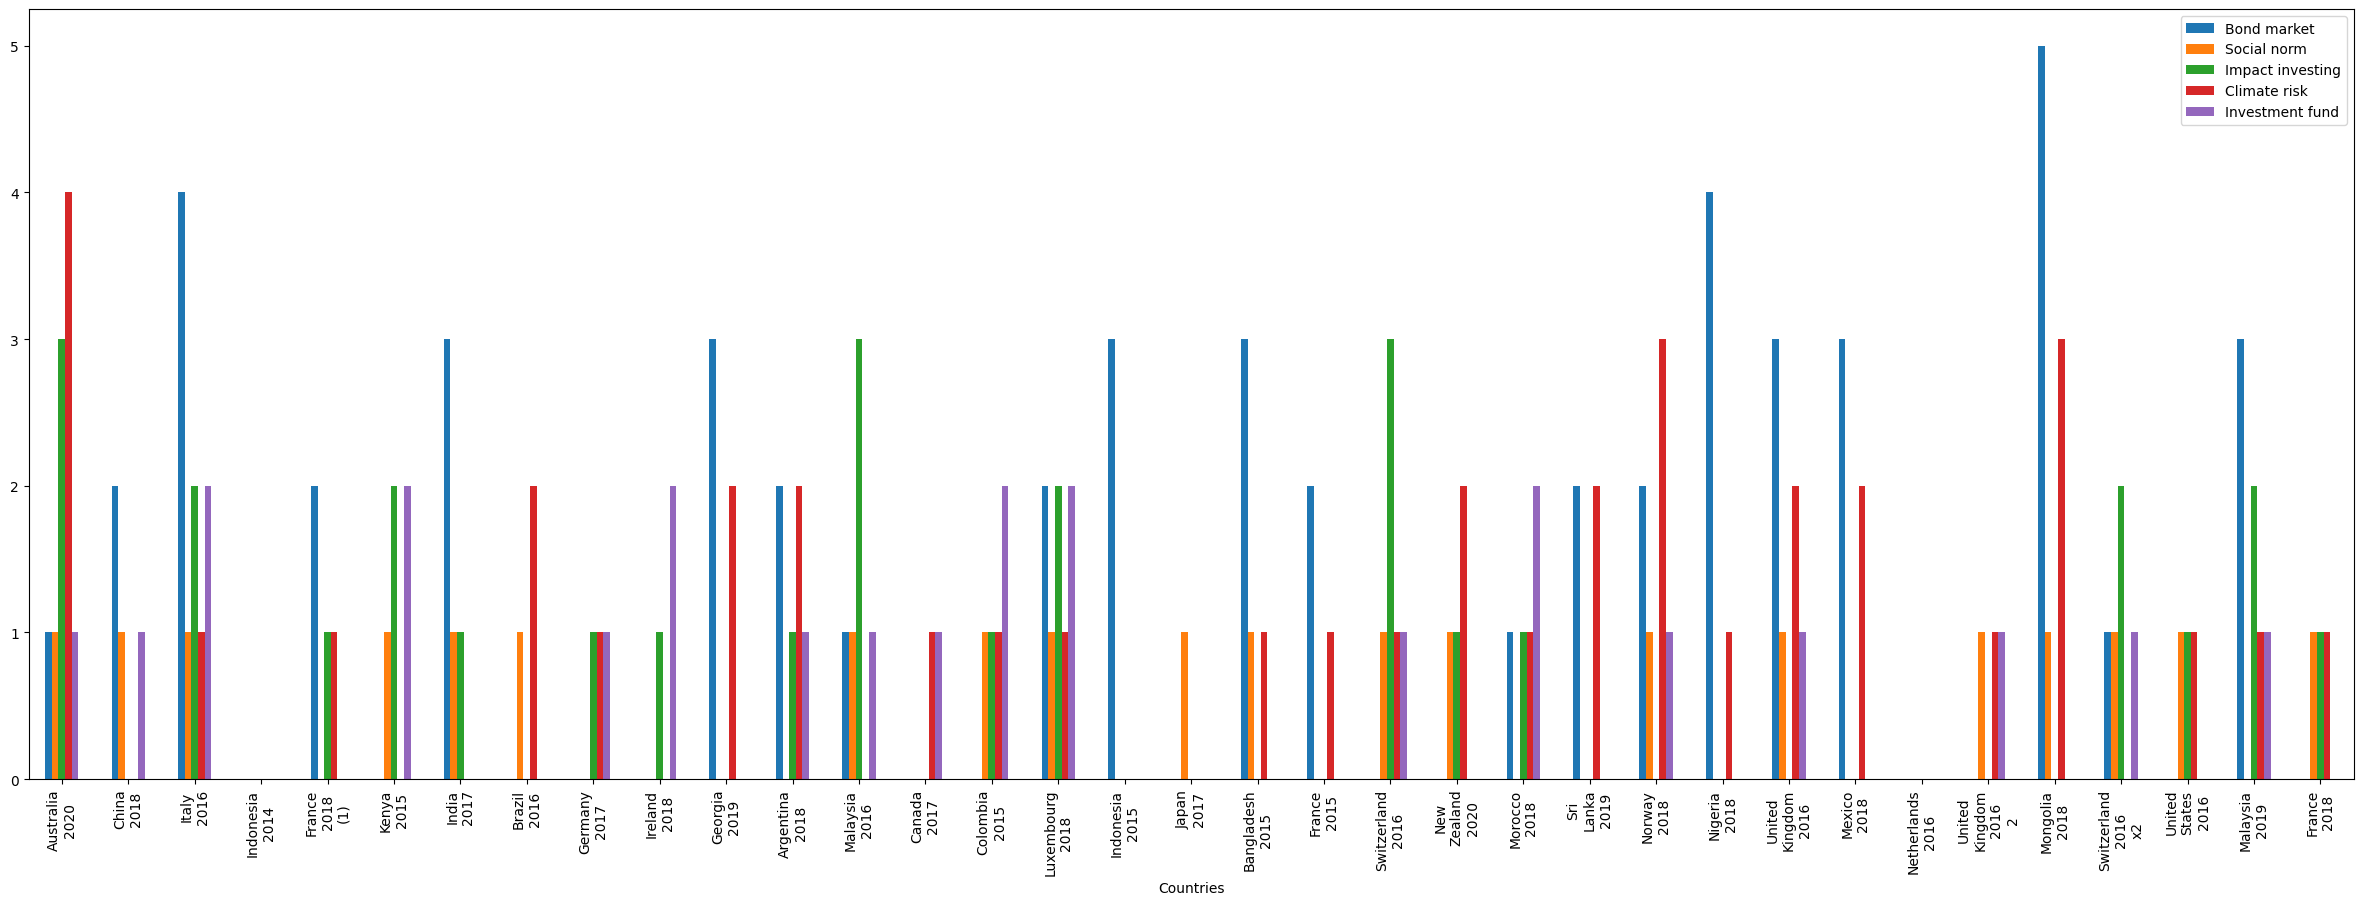

In [51]:
plot_taxonomy(cons_file_name, chunks, 14)

**3.6 Map of frequecies by country of randomly selected 10 entities**

In [52]:
display(df_documents[['Country', 'Year', 'Entities']])

all_entities = df_documents['Entities'].to_list()

freq = collections.defaultdict(int)  # 0 by default
for x in itertools.chain.from_iterable(dbpedia_outputs):
    freq[x] += 1

frequency_entities = dict(freq)

frequency_entities = sorted(frequency_entities.items(), key=operator.itemgetter(1), reverse=True)

frequency_entities = dict((x, y) for x, y in frequency_entities)

freq_list = list(frequency_entities.keys())
freq_list = freq_list[75:]

random_entitity = random.sample(freq_list, 10)

Country  Year                                           Entities
0        Australia  2020  [Renewable energy, Global warming, Global warm...
1            China  2018  [Frontier, Boundary delimitation, Frontier, Bo...
2            Italy  2016  [Management, Global warming, Insurance, United...
3        Indonesia  2014  [International Finance Corporation, Social ris...
4           France  2018  [Asset management, Risk management, Asset mana...
5            Kenya  2015  [Climate change adaptation, Carbon, Systemic r...
6            India  2017  [Sustainable development, Climate bond, Global...
7           Brazil  2016  [Capitalism, Capitalism, Capitalism, Managemen...
8          Germany  2017  [Company Business, Insurance, Pounds per squar...
9          Ireland  2018  [Asset management, Investment management, Pens...
10         Georgia  2019  [Capital market, Financial sector development,...
11       Argentina  2018  [Financial institution, Sustainable developmen...
12        Malaysia  2016  [Equity (finance), Credit risk, Fiduciary, Jun...
13          Canada  2017  [Corporate governance, Pension, Fiduciary, Pro...
14        Colombia  2015  [Financial institution, Sustainable developmen...
15      Luxembourg  2018  [Balance sheet, Market liquidity, Dollar, Diff...
16       Indonesia  2015  [Pension, Pension, Equity (finance), Climate b...
17           Japan  2017  [Market research, Corporate governance, Pensio...
18      Bangladesh  2015  [Fin, Balance sheet, Sustainable development, ...
19          France  2015  [Serfdom, Fin, Financial institution, Sustaina...
20     Switzerland  2016  [Global warming, Serfdom, Fin, Market liquidit...
21     New Zealand  2020  [Global warming, Management, Insurance, Digita...
22         Morocco  2018  [Dollar, Sustainable development, Junior, Seni...
23       Sri Lanka  2019  [Financial market, Acronym, Junior, Senior & B...
24          Norway  2018  [Climate bond, Global warming, Pension, Pensio...
25         Nigeria  2018  [Bond market, Global warming, Pension, Pension...
26  United Kingdom  2016  [Bond market, Financial market, Global warming...
27          Mexico  2018  [Bond market, Financial institution, Financial...
28     Netherlands  2016  [Fin, Diffusion, ING Group, Green Climate Fund...
29  United Kingdom  2016  [United Nations, Management, Market research, ...
30        Mongolia  2018  [United Nations, Bond market, Climate bond, Pe...
31     Switzerland  2016  [United Nations, Climate bond, Financial marke...
32   United States  2016  [United Nations, Proxy voting, Fiduciary, Perf...
33        Malaysia  2019  [Climate bond, Financial market, Management, T...
34          France  2018  [Proxy voting, Fiduciary, Energy transition, S...

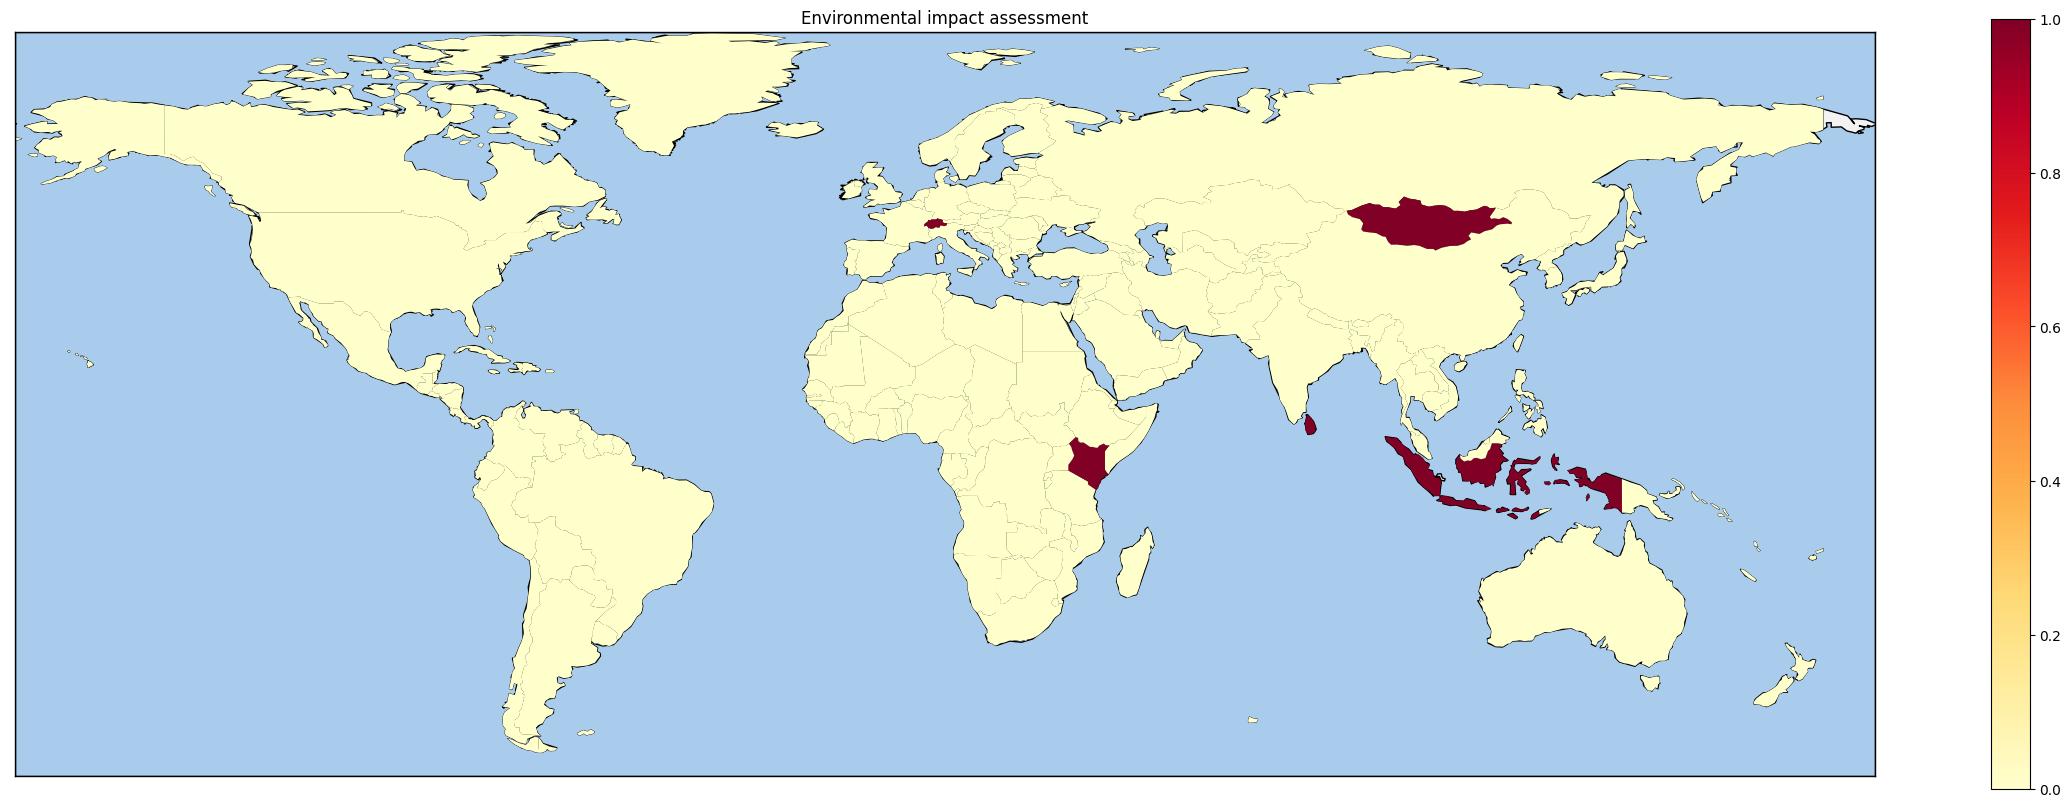

In [53]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[0])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[0])

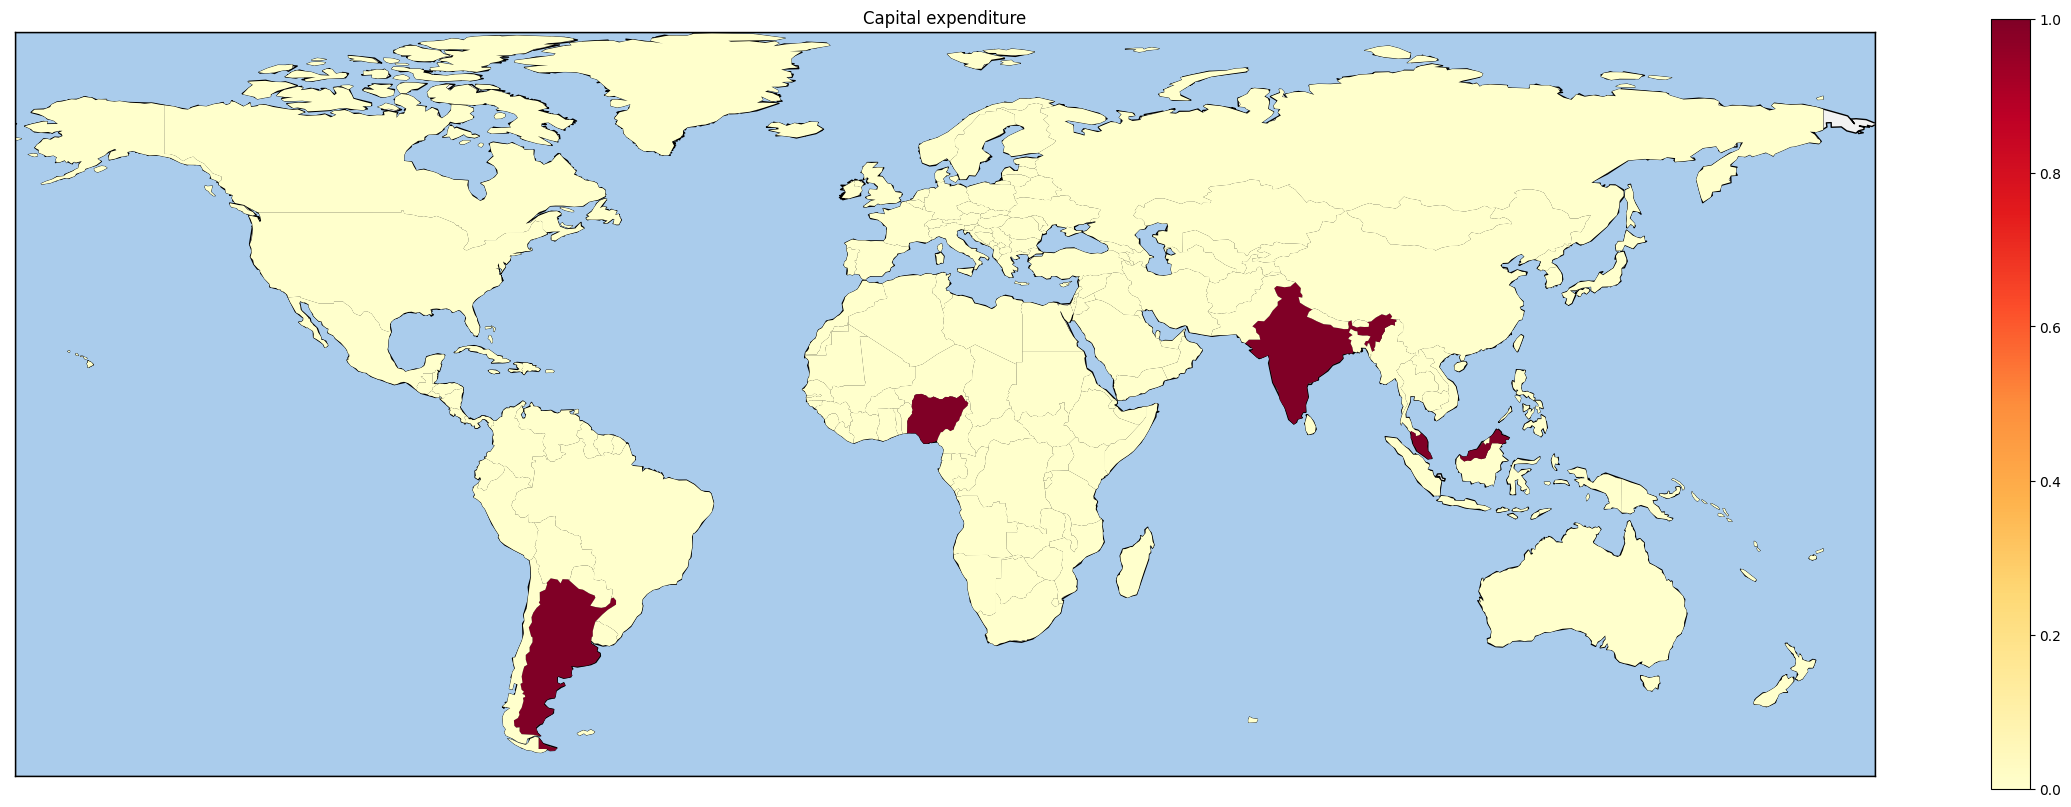

In [54]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[1])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[1])

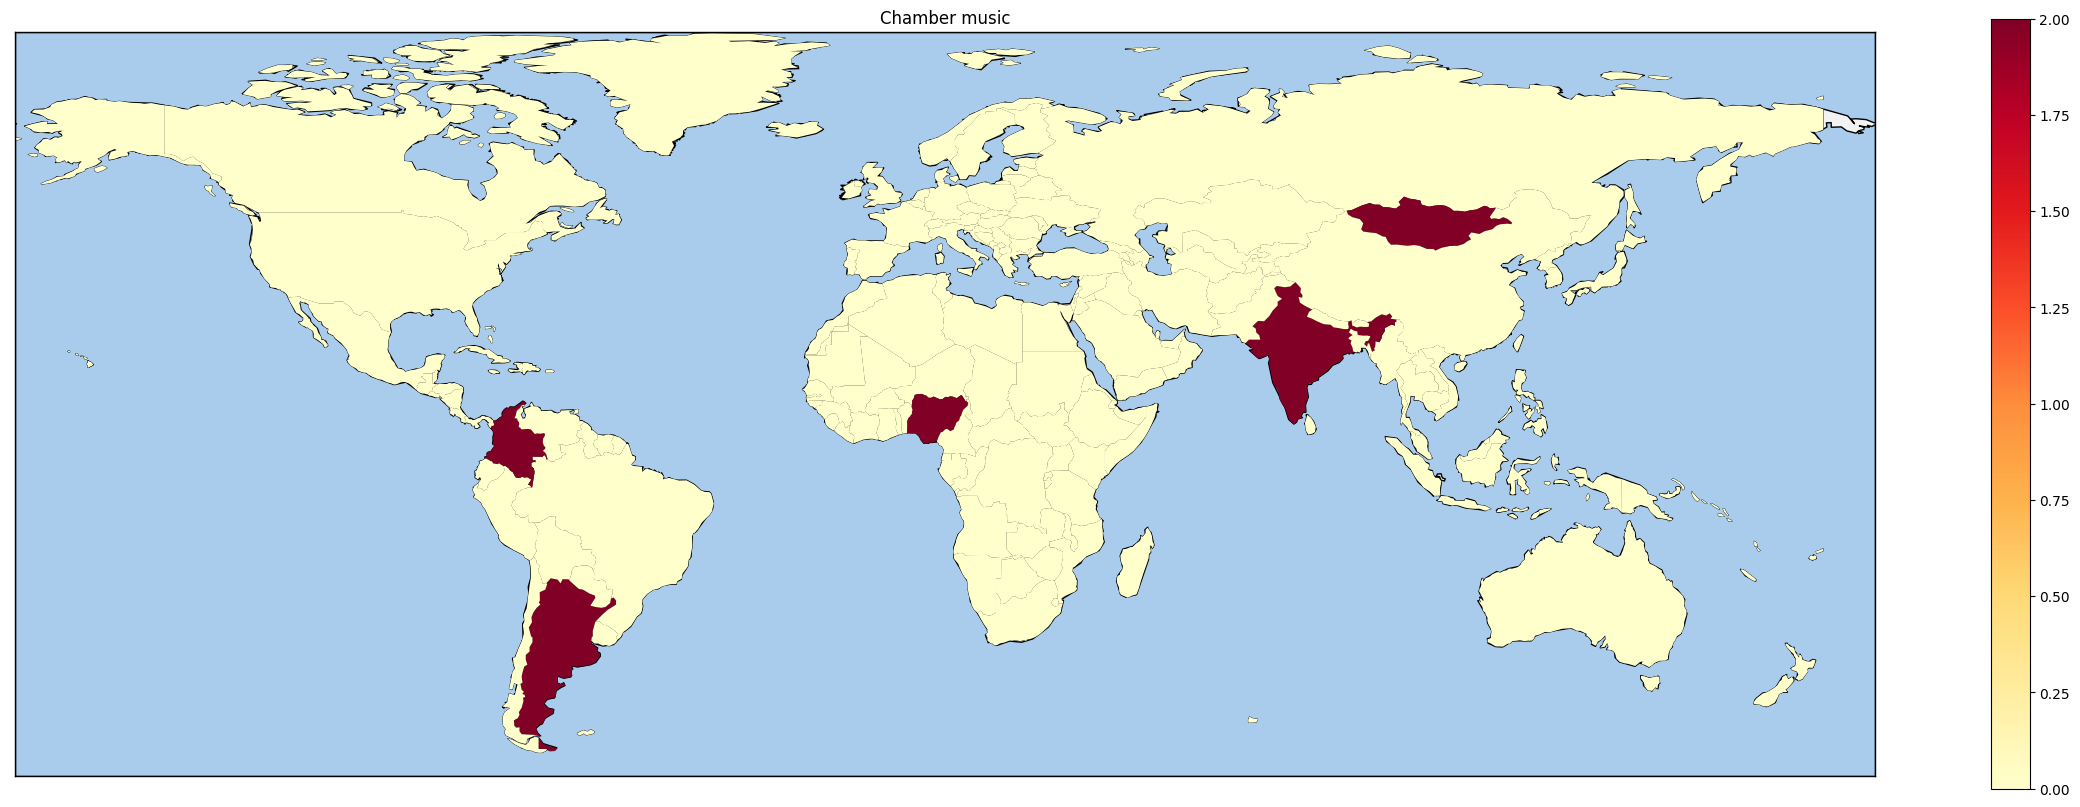

In [55]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[2])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[2])

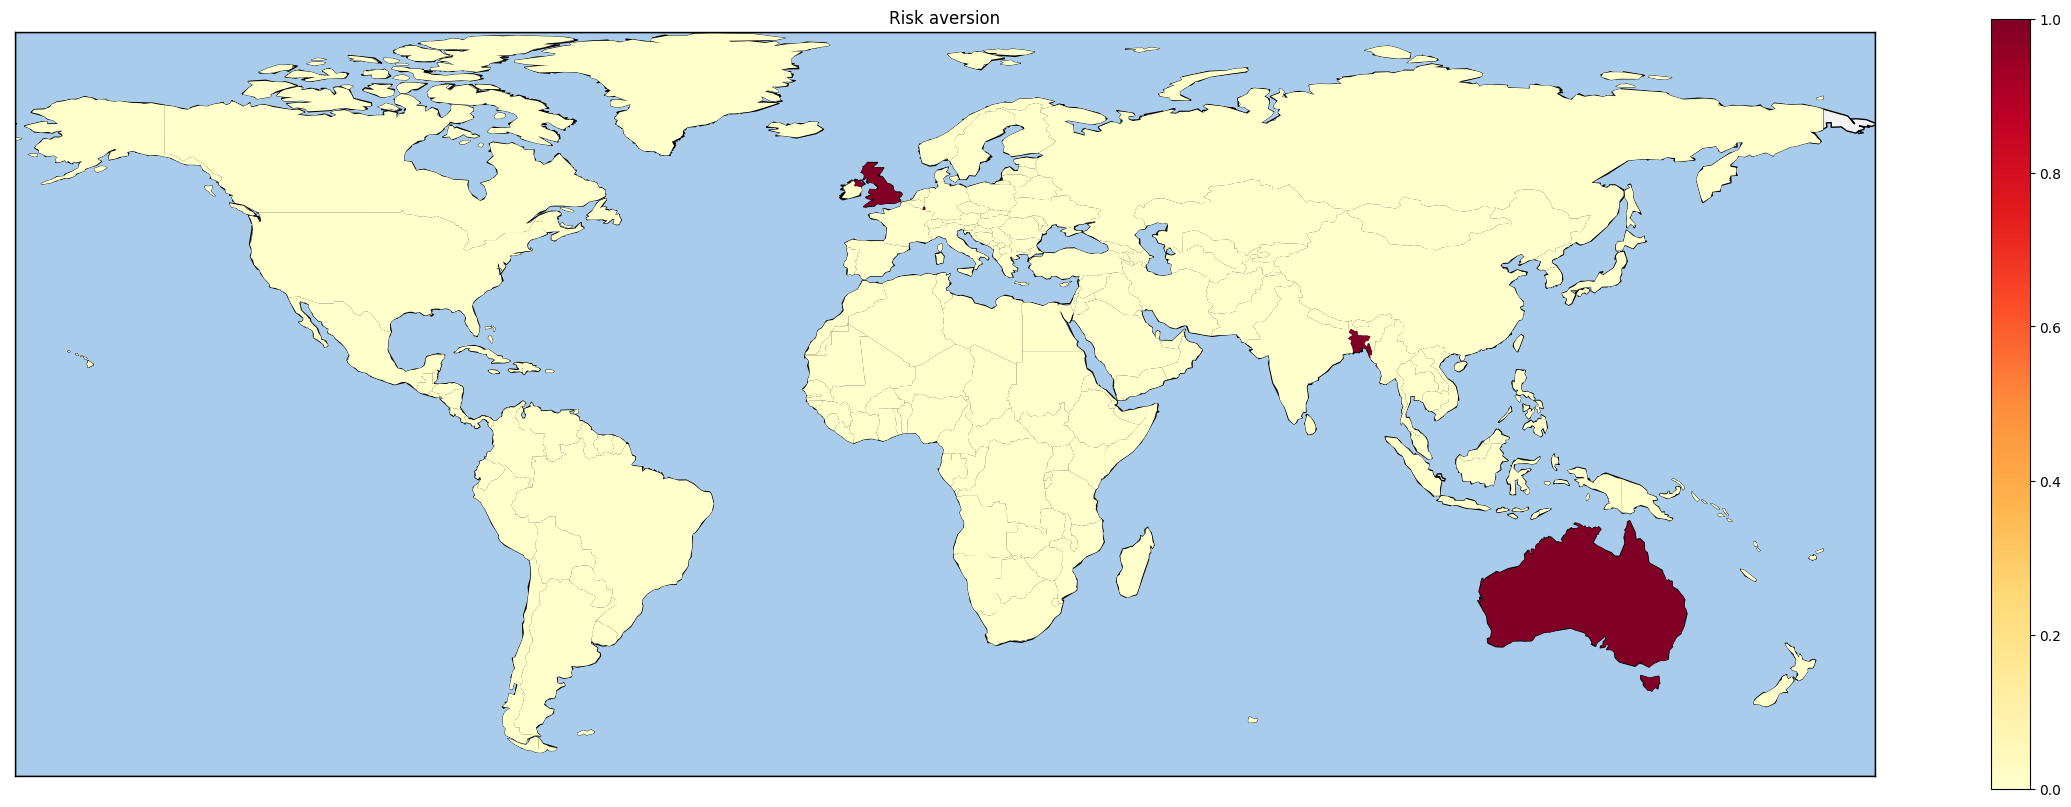

In [56]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[3])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[3])

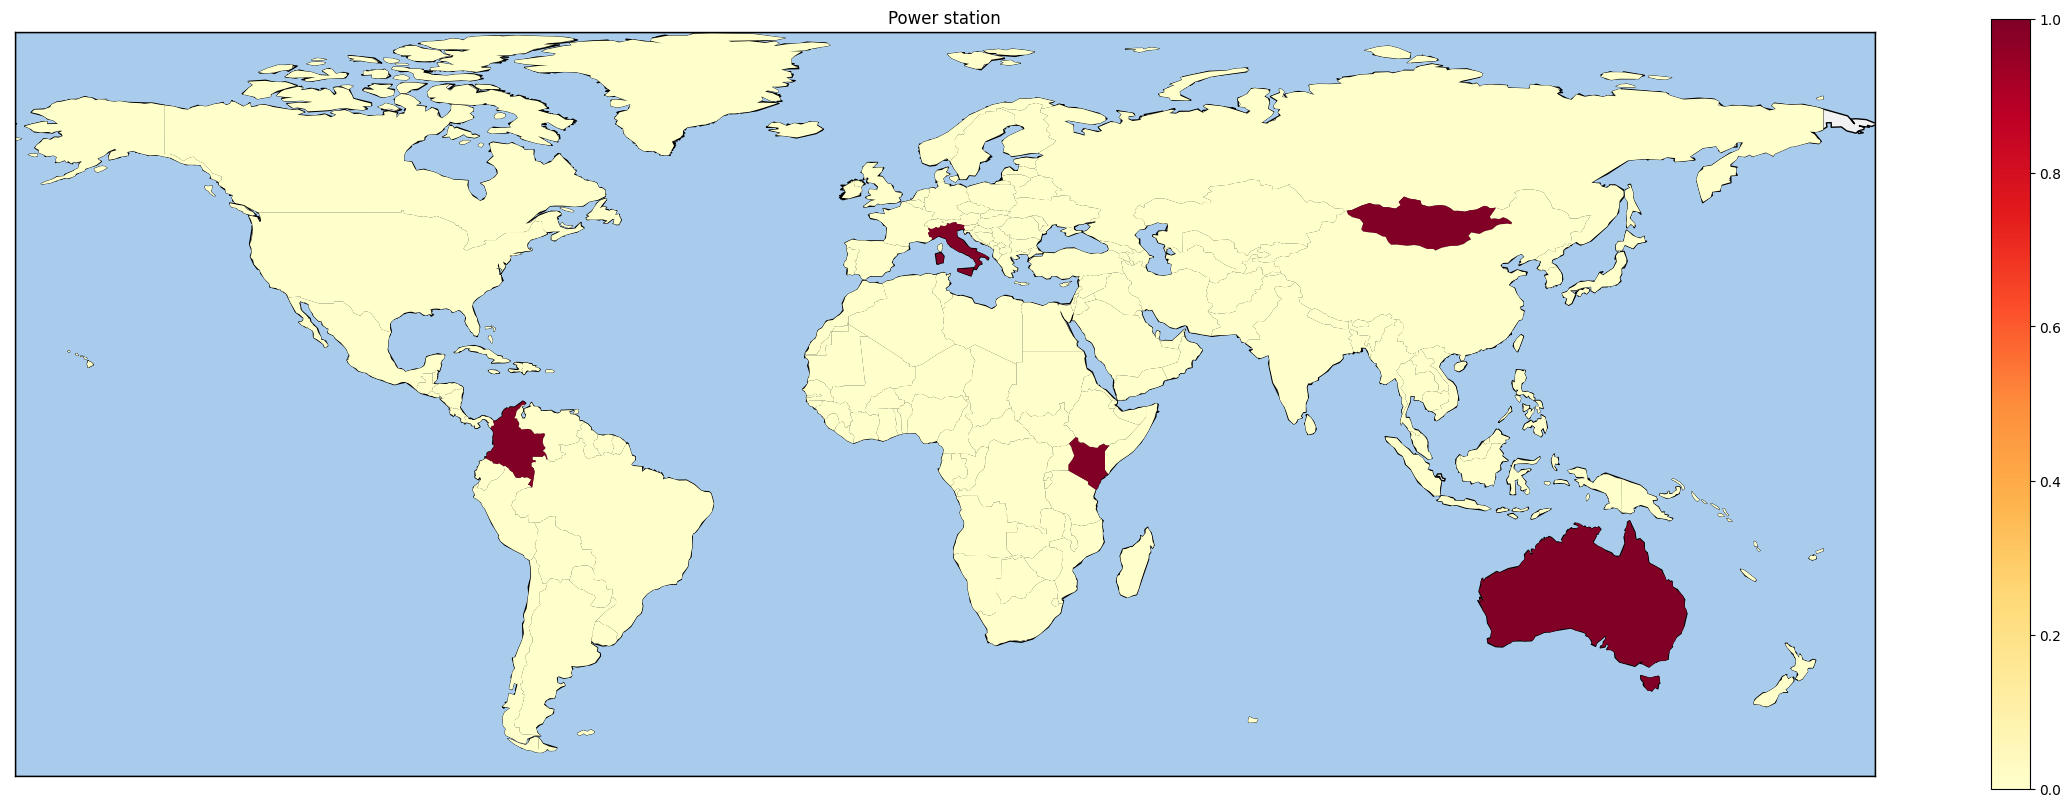

In [57]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[4])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[4])

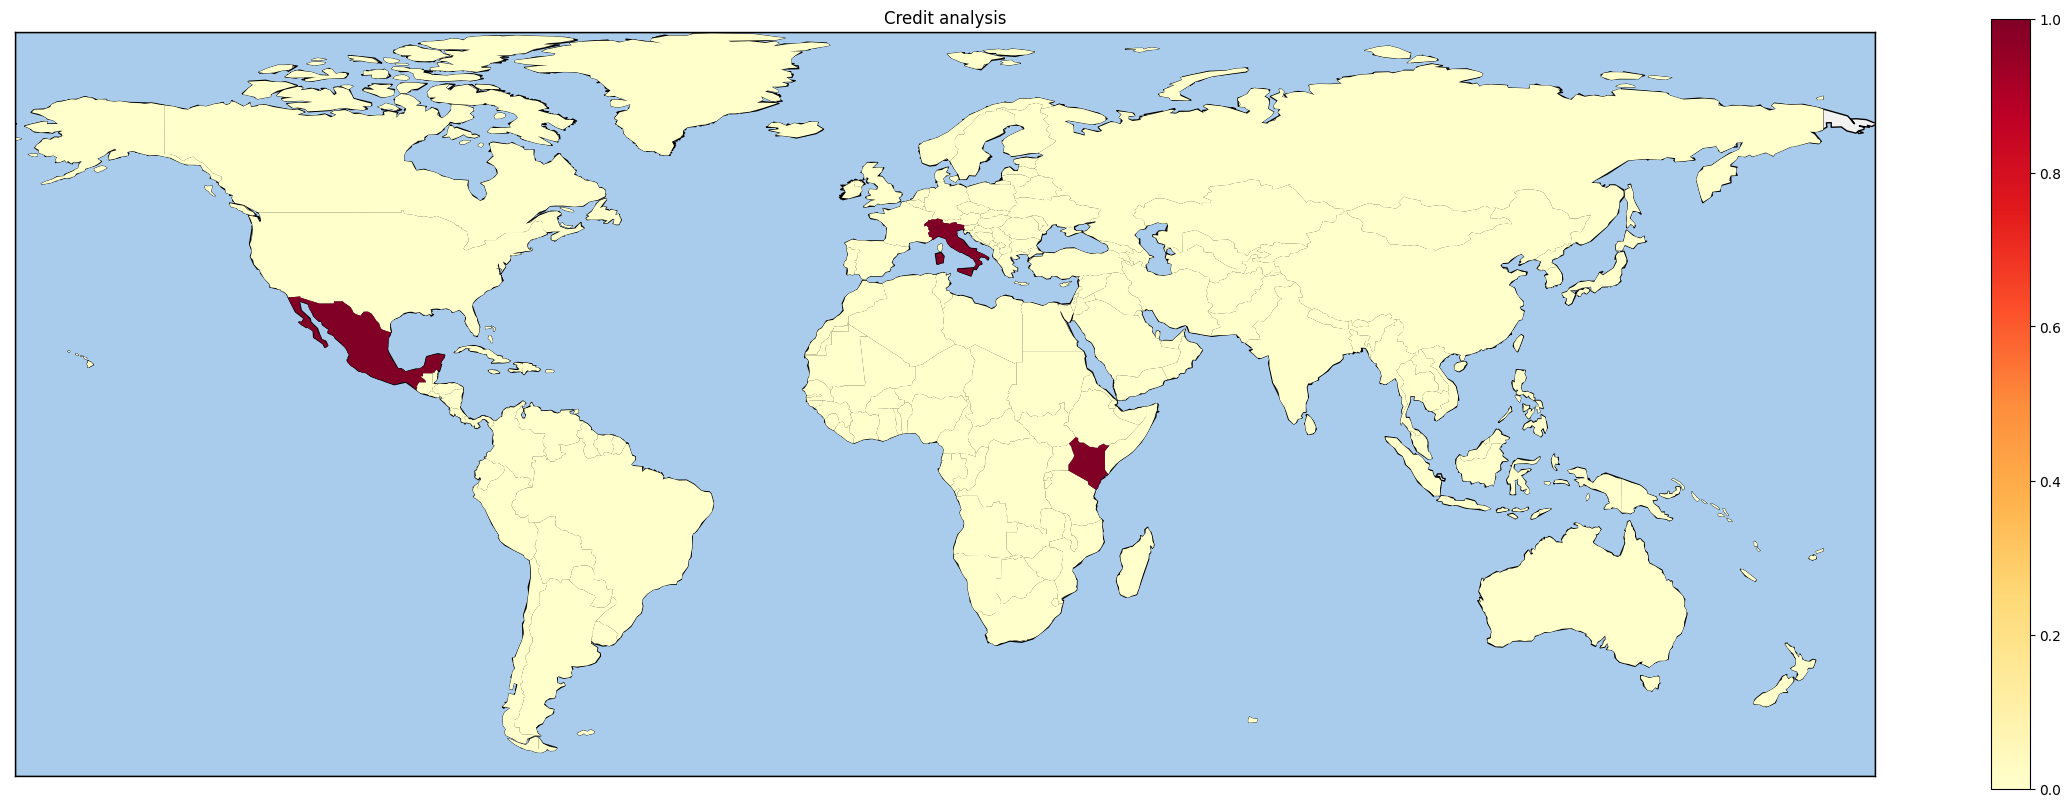

In [58]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[5])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[5])

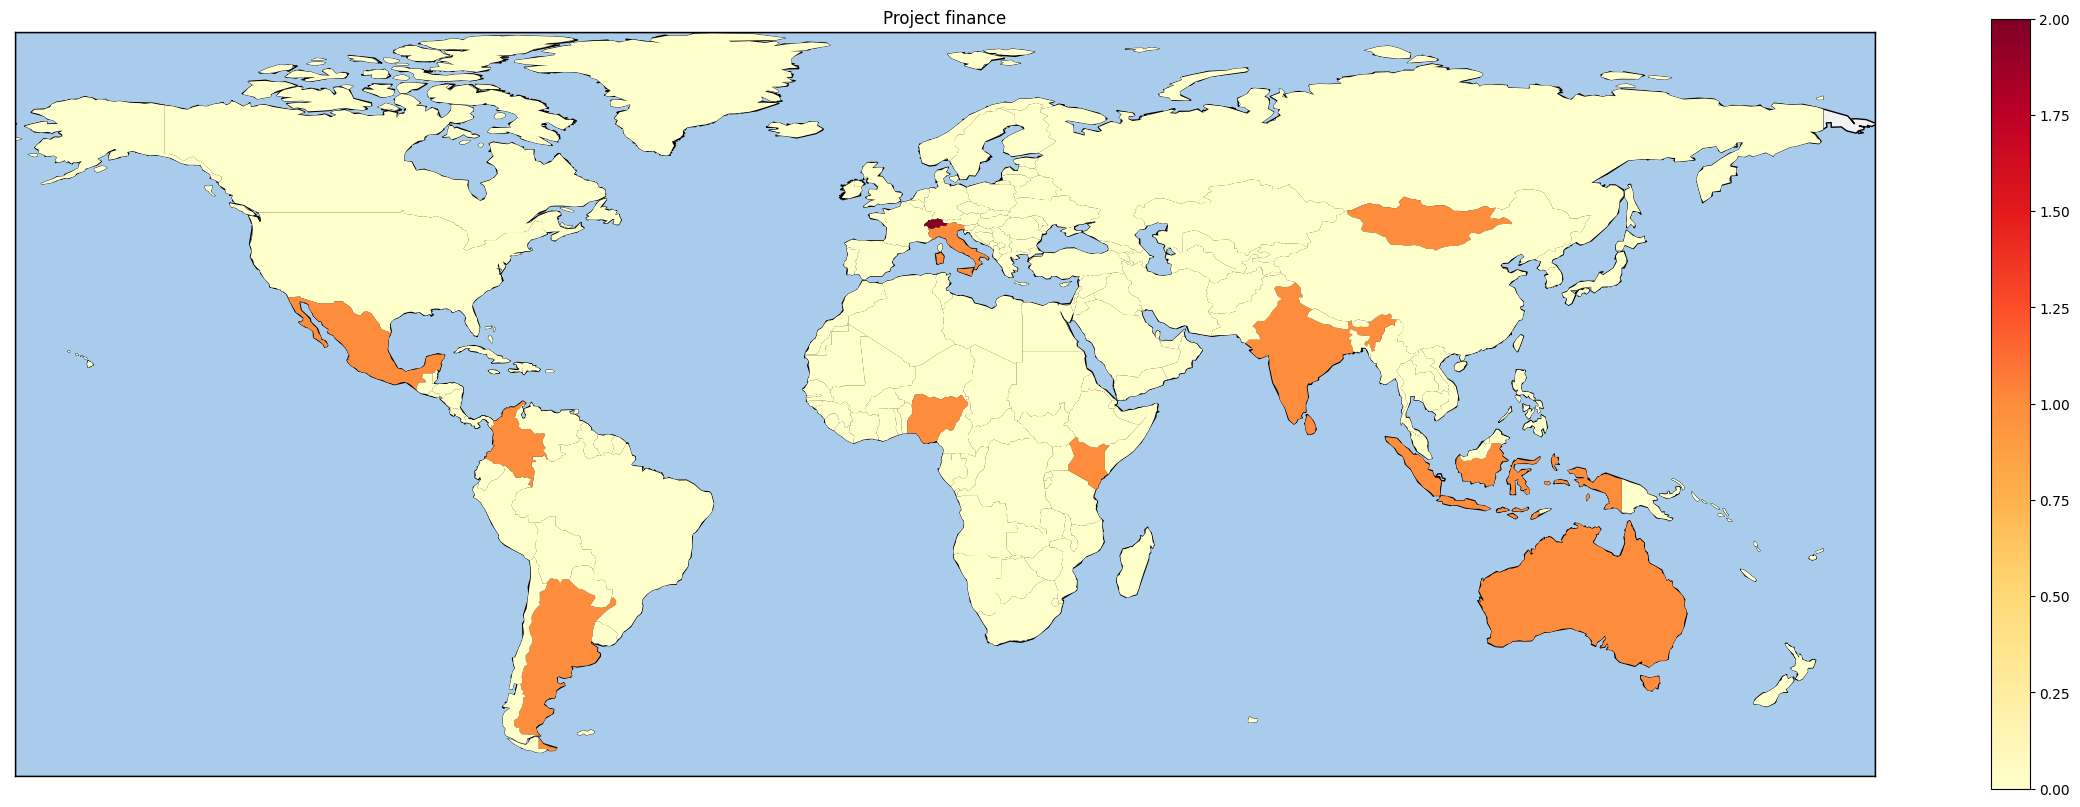

In [59]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[6])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[6])

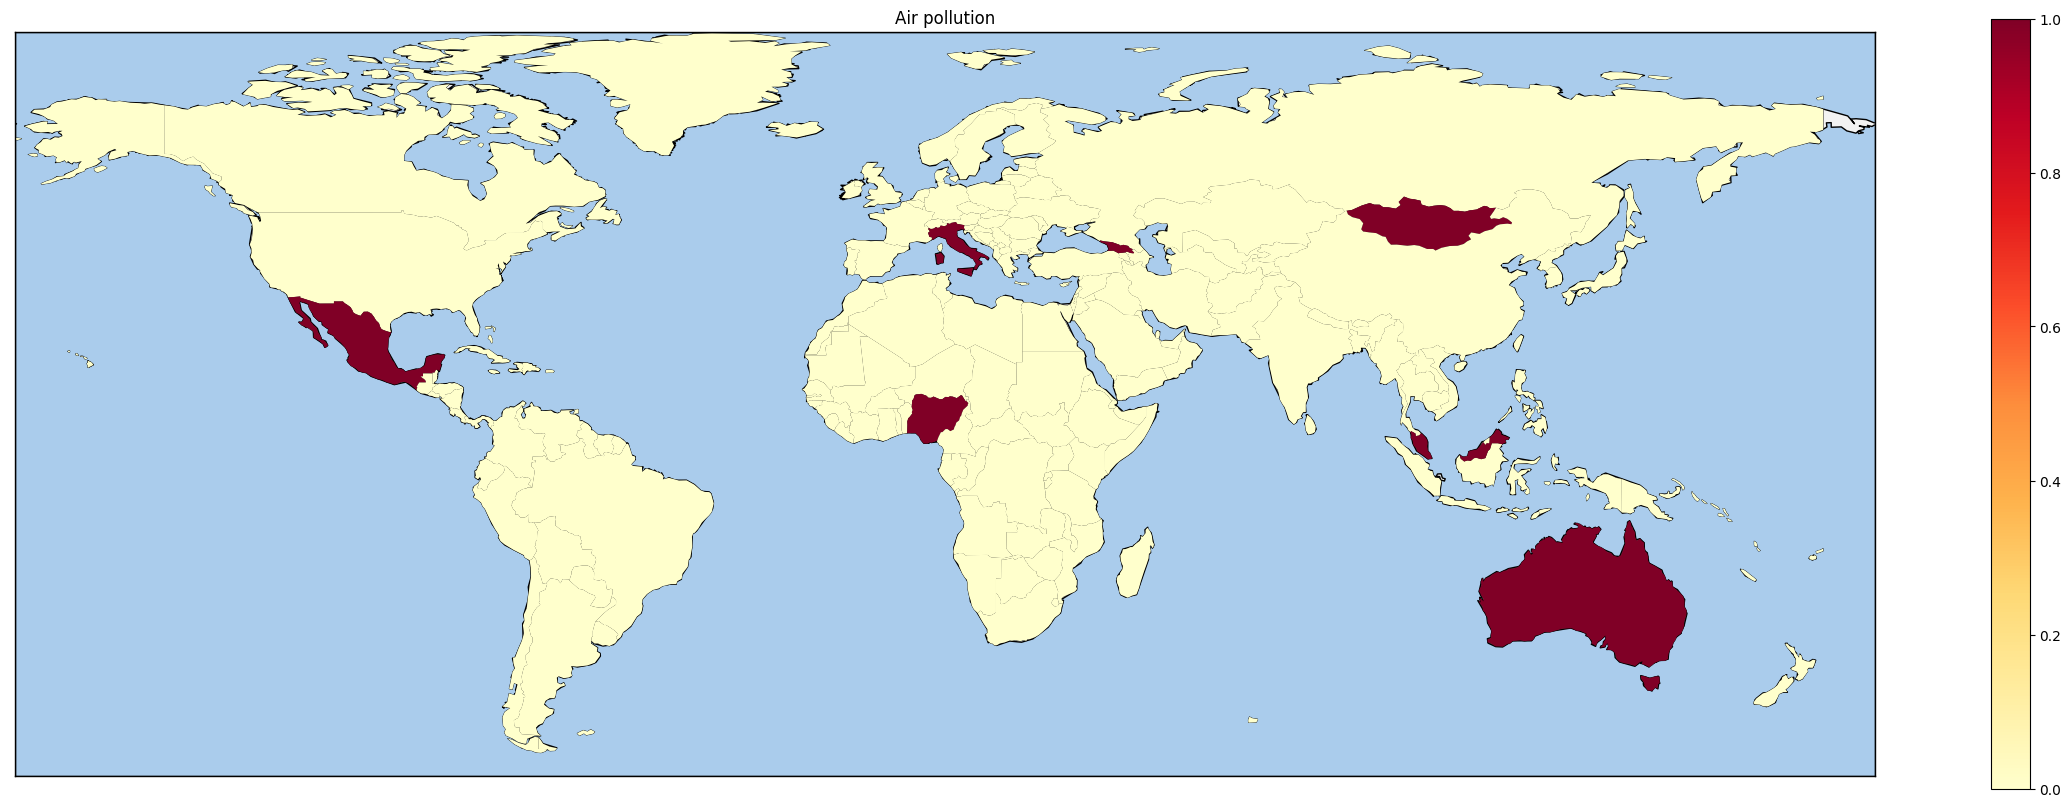

In [60]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[7])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[7])

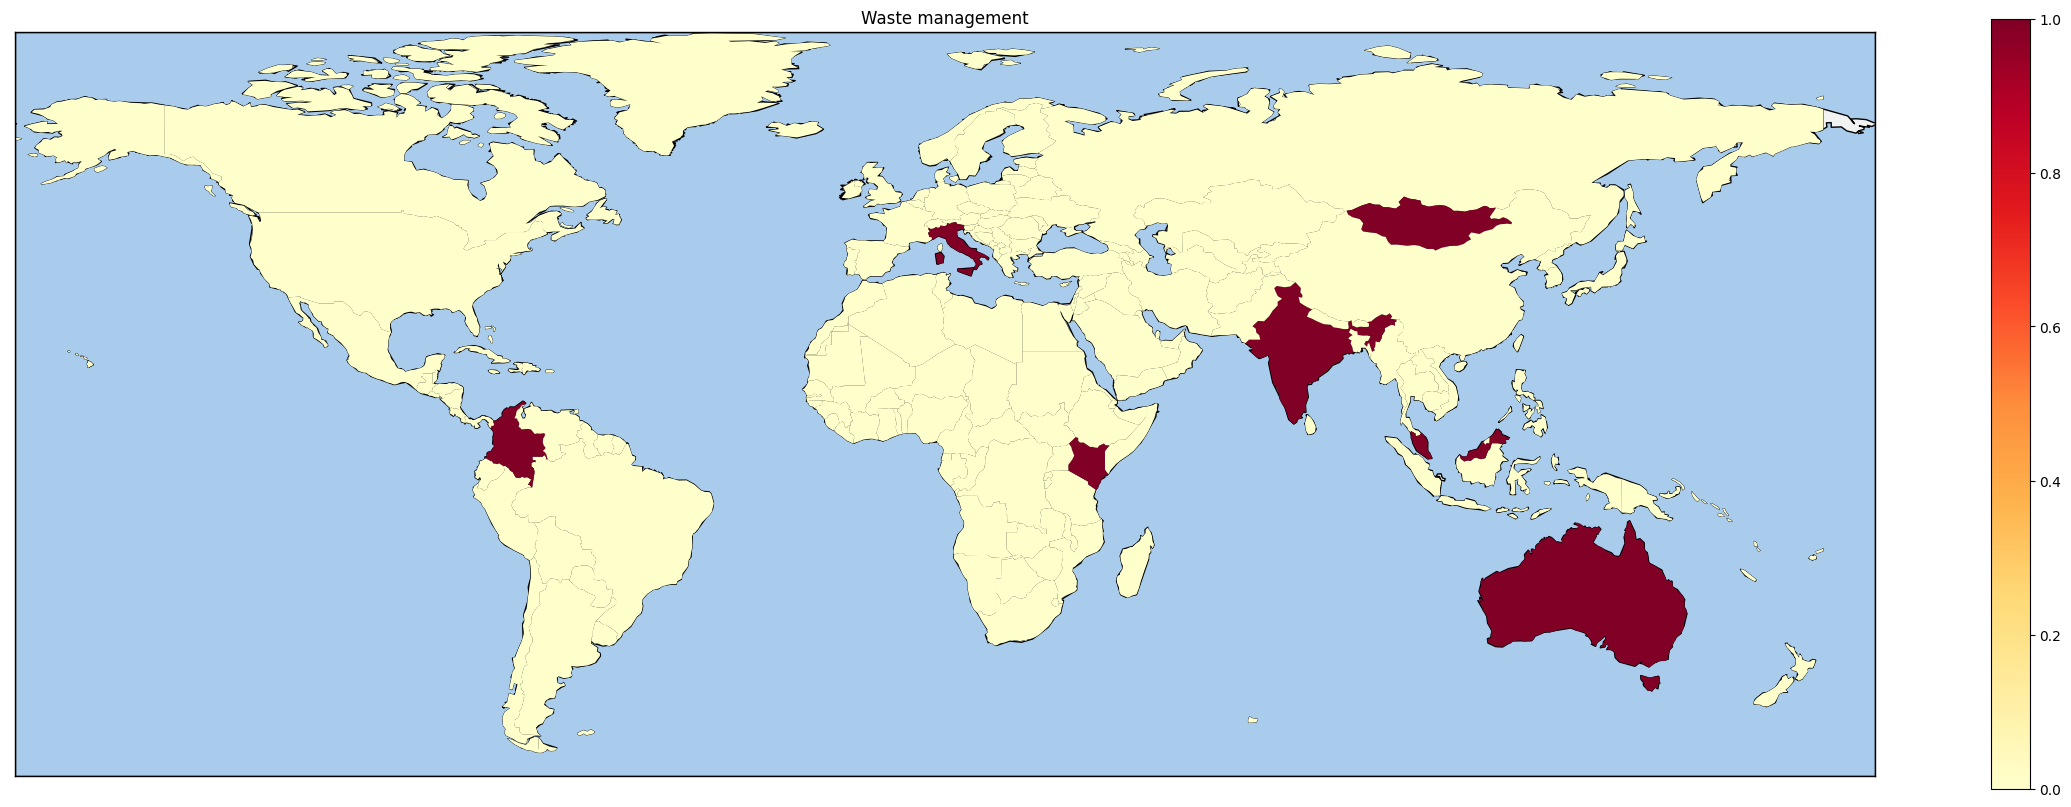

In [61]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[8])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[8])

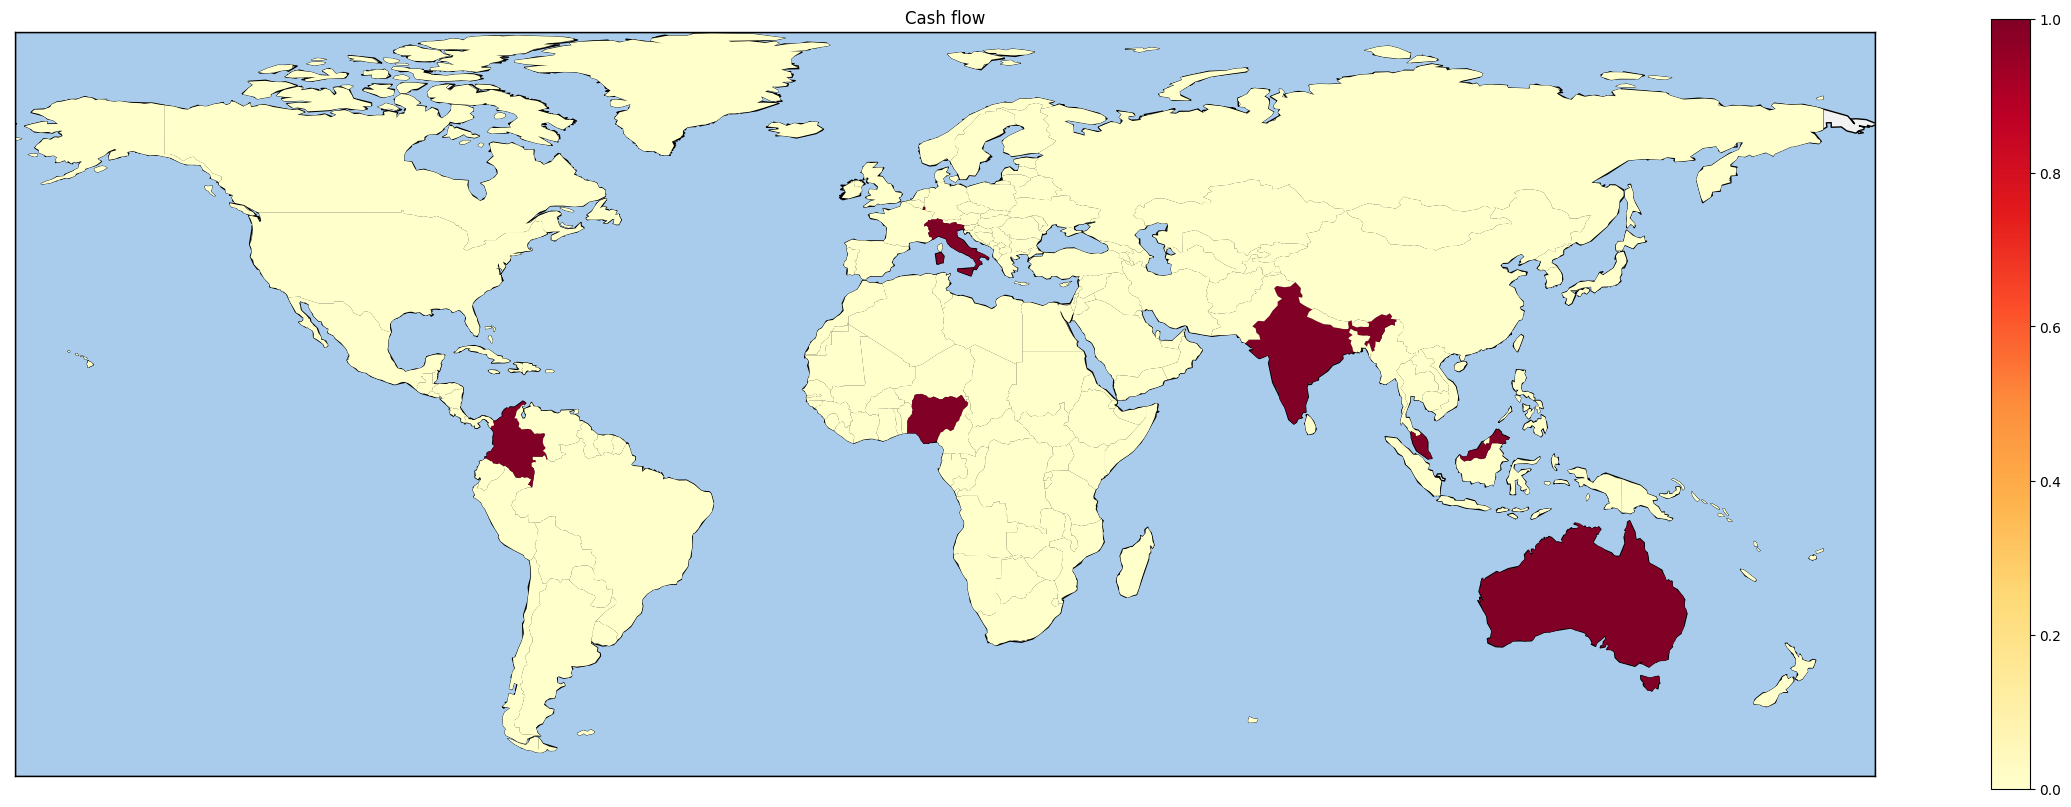

In [62]:
countries = list(set(df_documents['Country'].to_list()))

entity_freq = country_word_freq(df_documents, countries, random_entitity[9])
per_country_counts = pd.DataFrame({'Country': countries, 'count': entity_freq})

create_map(per_country_counts, random_entitity[9])

**3.7 Frequency of entities(after top 75) by continent**

['Action Action', 'Structured product', 'Financial Stability Board', 'Market research', 'Microsoft Outlook', 'Dollar', 'Renminbi', 'Credit enhancement', 'Diffusion', 'Kick start', 'Stress testing', 'Mineral', 'Integrated development environment', 'Informed Decision', 'Carbon Disclosure Project', 'Coal', 'Generation Investment Management', 'Defined contribution plan', 'Asset allocation', 'Unintended consequences', 'Coffee']


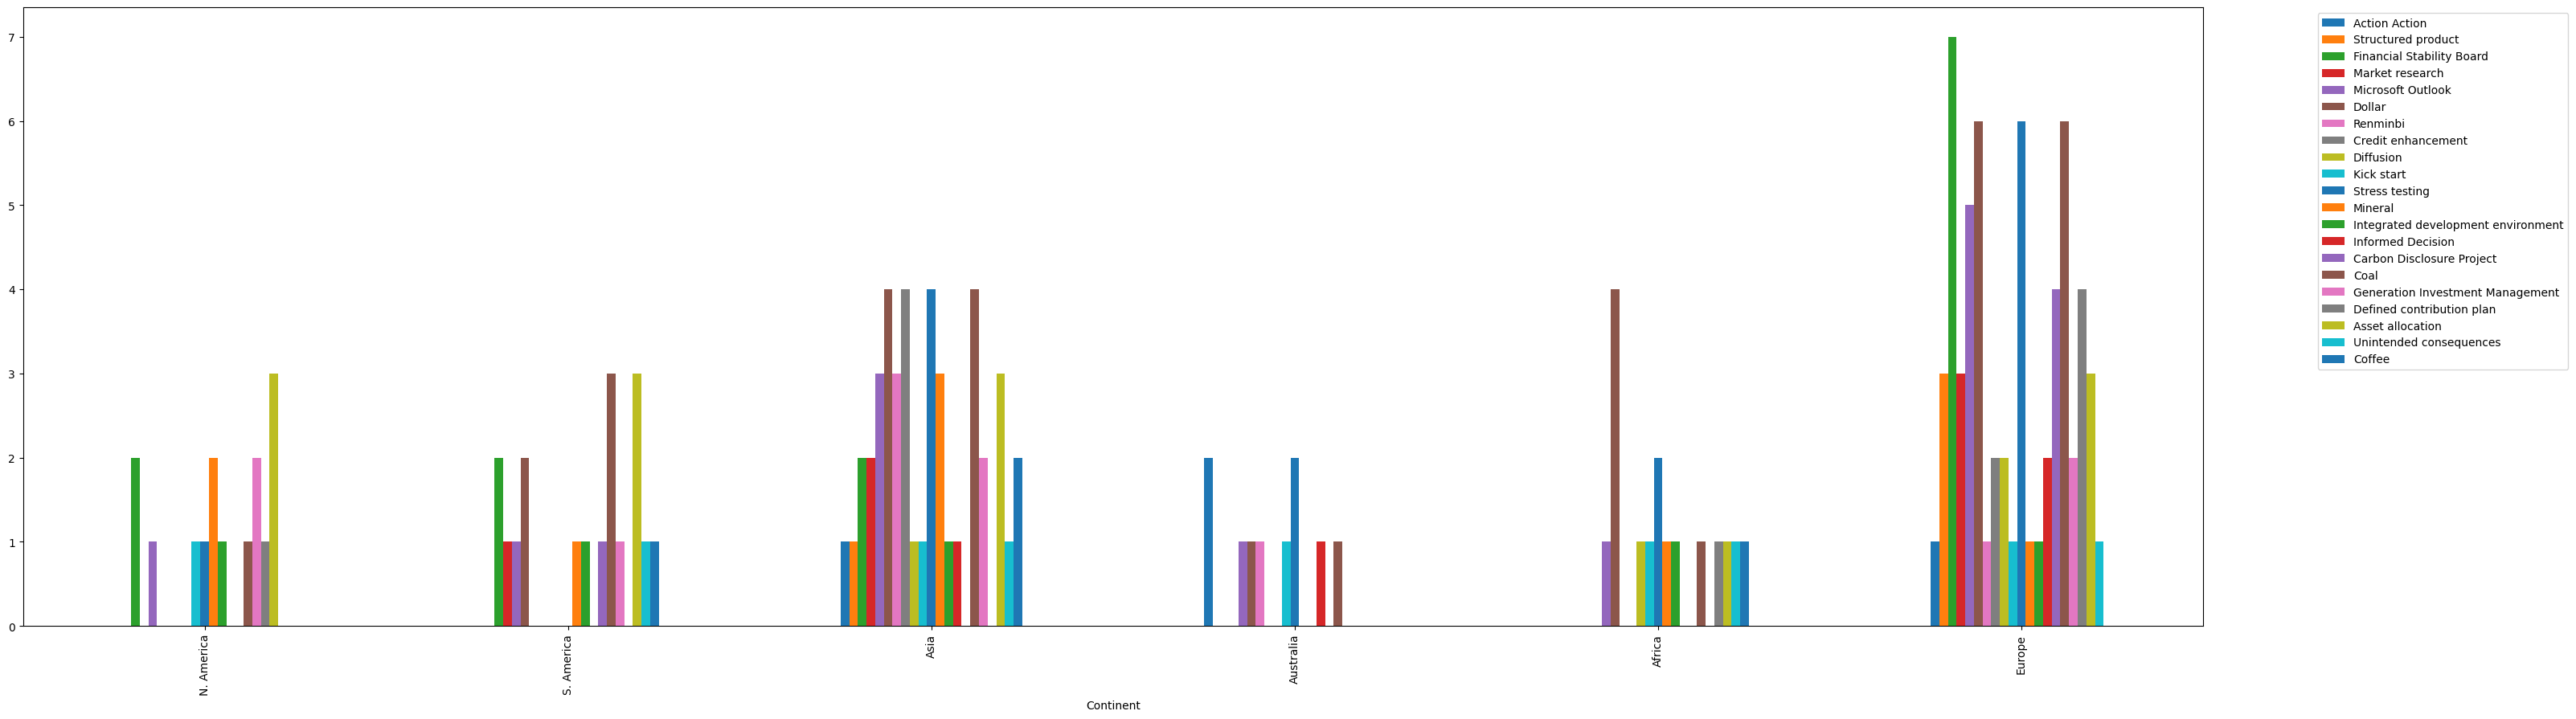

In [63]:
entities_by_continent = entities_by_continents(df_documents, list(continents.values()))

plot_taxonomy_by_continent(entities_by_continent, 0, continents, freq_list)

['Private bank', 'Geothermal gradient', 'Market risk', 'Financial innovation', 'Stock', 'Transaction cost', 'Global Challenge', 'Public policy', 'Climate finance', 'Climate change mitigation', 'Erosion', 'Financial sector development', 'Finance Commission', 'Ecosystem services', 'Geography', 'Unintended consequences', 'Coal', 'Dollar', 'Probability', 'Financial technology', 'Paradigm shift']


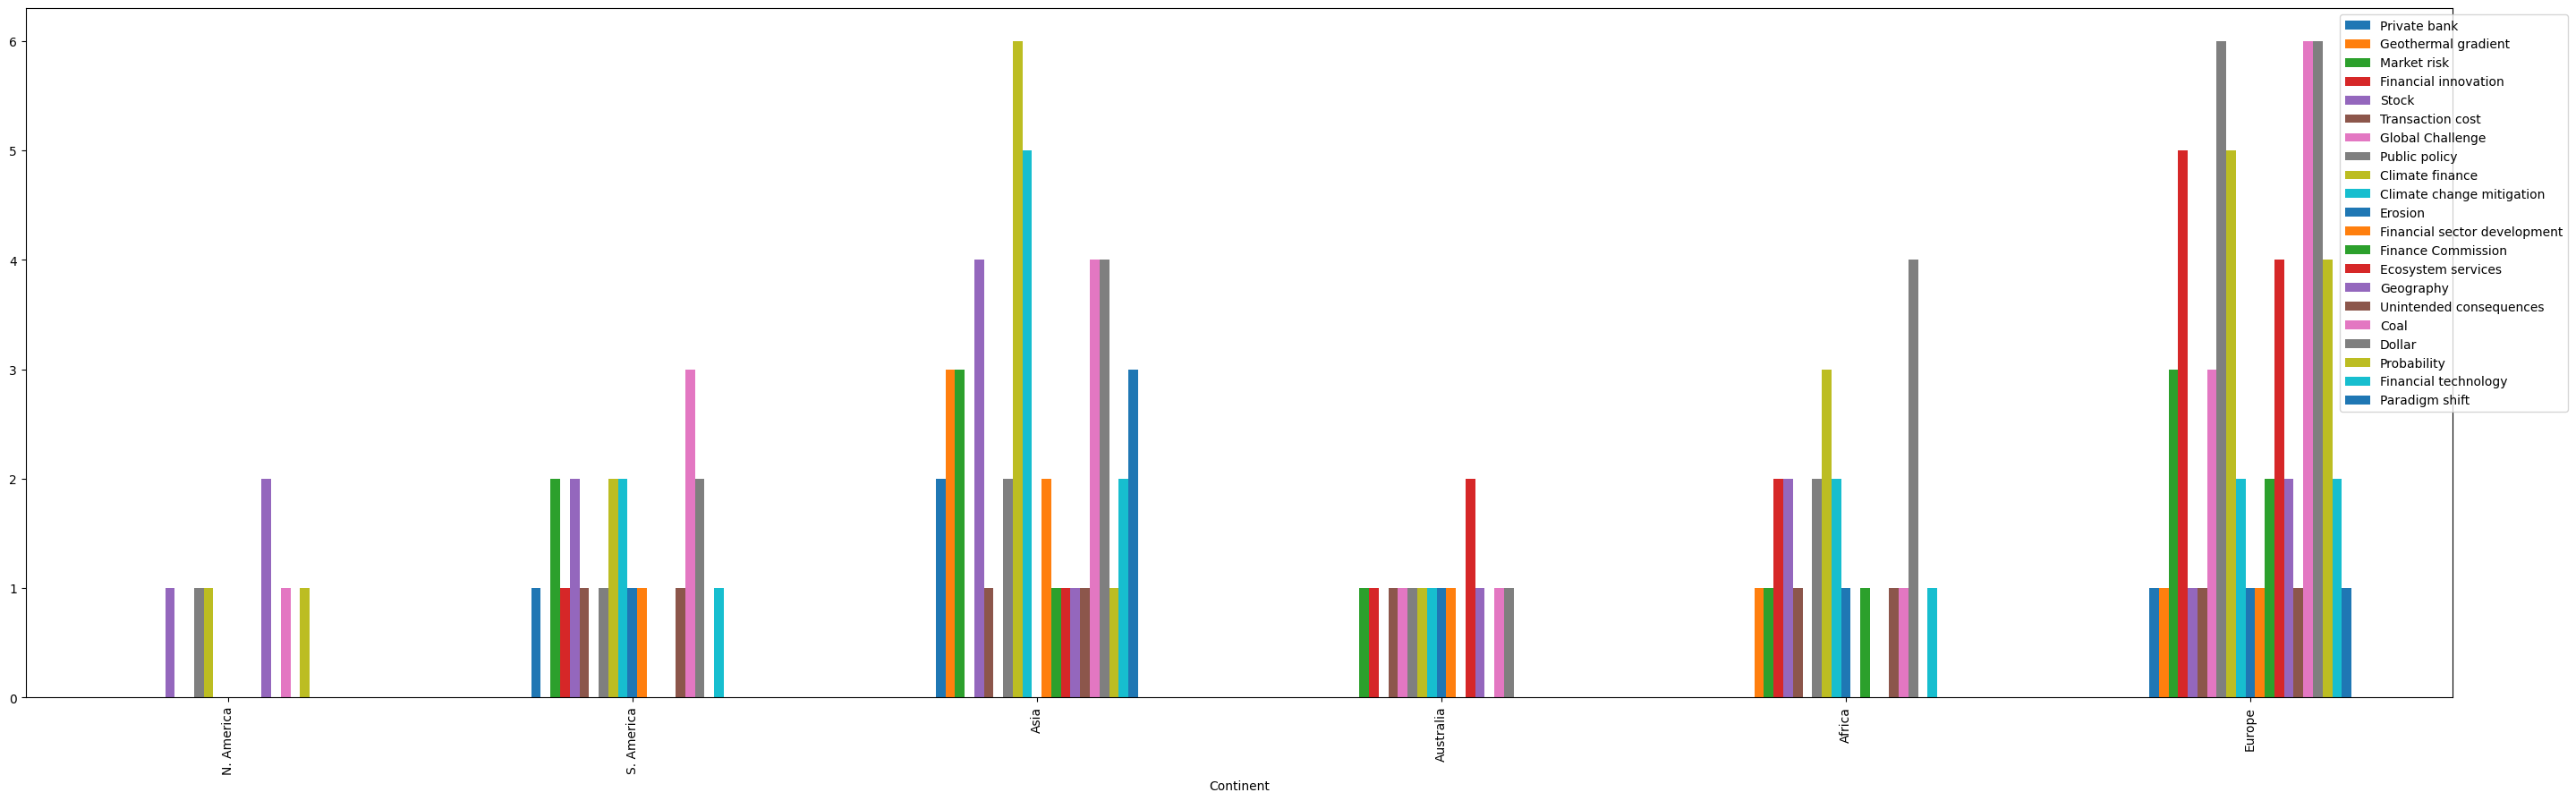

In [64]:
entities_by_continent = entities_by_continents(df_documents, list(continents.values()))

plot_taxonomy_by_continent(entities_by_continent, 1, continents, freq_list)

['Food security', 'Geography', 'Wood', 'Forestry', 'Country Energy', 'Stress testing', 'Market mechanism', 'Environmental health', 'Municipalities of Switzerland', 'Prospectus (finance)', 'Market risk', 'Factor market', 'International development', 'Environmental factor', 'Derivative', 'Climate change adaptation', 'Global Challenge', 'Sustainable agriculture', 'Financial transaction', 'Natural disaster', 'Dollar']


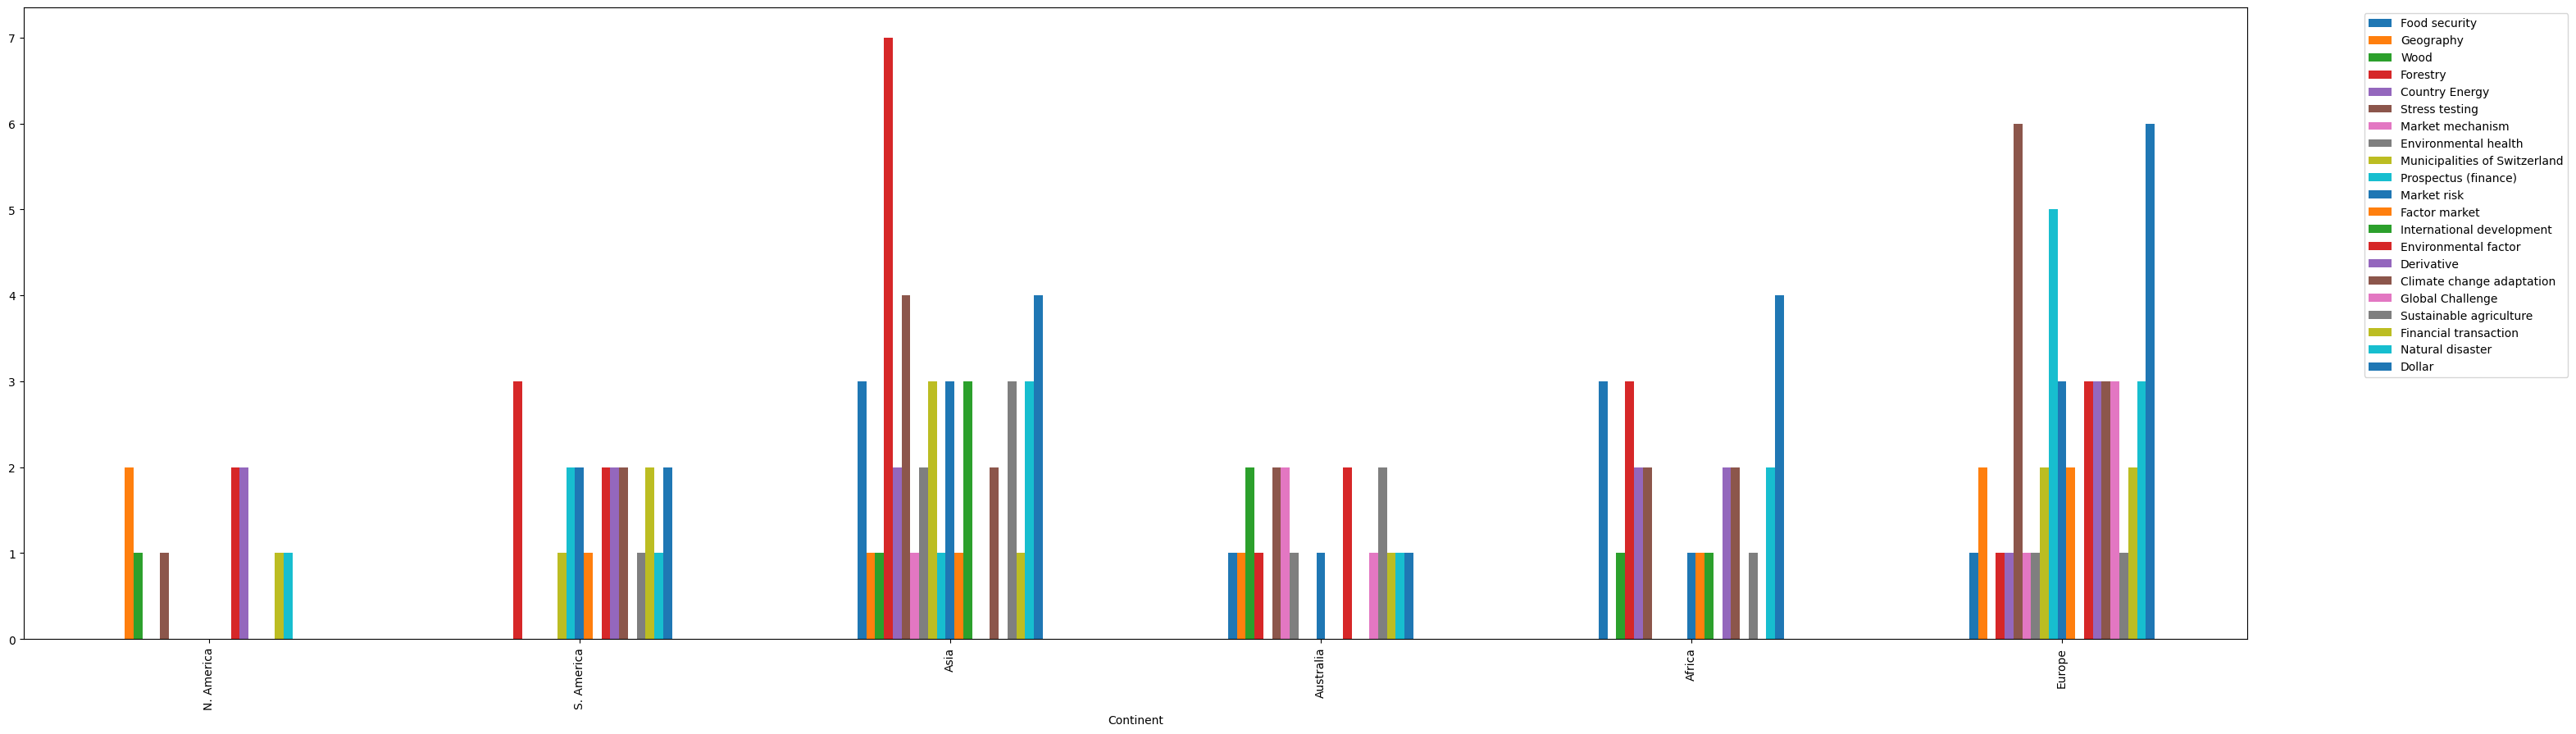

In [65]:
entities_by_continent = entities_by_continents(df_documents, list(continents.values()))

plot_taxonomy_by_continent(entities_by_continent, 2, continents, freq_list)